This is my amazing script

In [1]:
import xarray as xr     
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.cm as cm

/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [3]:
ds = xr.open_mfdataset('/g/data/nf33/hk25_DOCmeso/temp_data/observations/IMERG/doc_metrics/mean_area/IMERG/mean_area_IMERG_hrly_100-149_-13-13_3600x1800_2020-04_2021-03/mean_area_IMERG_hrly_100-149_-13-13_3600x1800_2020-04_2021-03_var_2020_4_1.nc')

In [4]:
ds

<xarray.Dataset> Size: 12MB
Dimensions:  (lat: 260, time: 24, lon: 490)
Coordinates:
  * lat      (lat) float32 1kB -12.95 -12.85 -12.75 -12.65 ... 12.75 12.85 12.95
  * time     (time) datetime64[ns] 192B 2020-04-01 ... 2020-04-01T23:00:00
  * lon      (lon) float32 2kB 100.0 100.1 100.2 100.4 ... 148.8 148.8 149.0
Data variables:
    var      (time, lat, lon) float32 12MB dask.array<chunksize=(24, 260, 490), meta=np.ndarray>

In [5]:
x = ds.lat
y = ds.lon
#imerge = ds.var

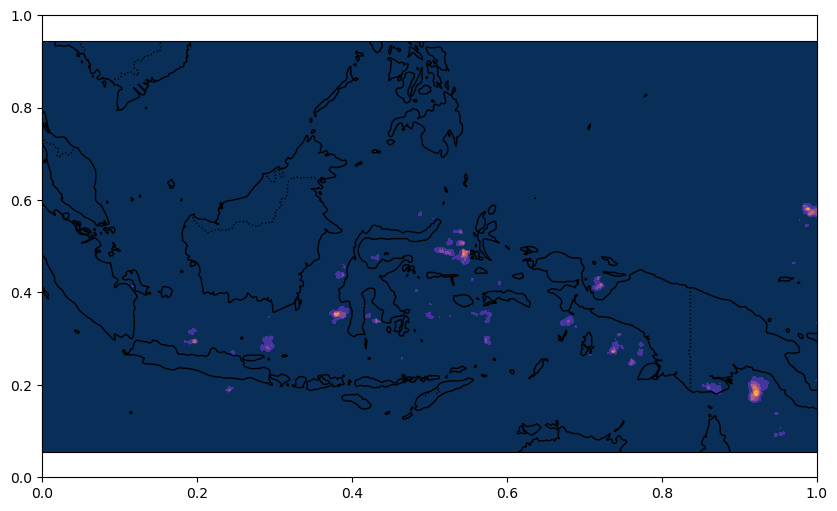

In [6]:
fig,ax=plt.subplots(1,1,figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
colormap = cmo.thermal
da_fin=ds['var']
#cp = ax.contourf(y,x,da_fin[1,:,:],transform=ccrs.PlateCarree(),cmap=colormap)
cp = ax.contourf(y,x,da_fin[1,:,:],cmap=colormap)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
#ax.gridlines(draw_labels=True)

plt.show()


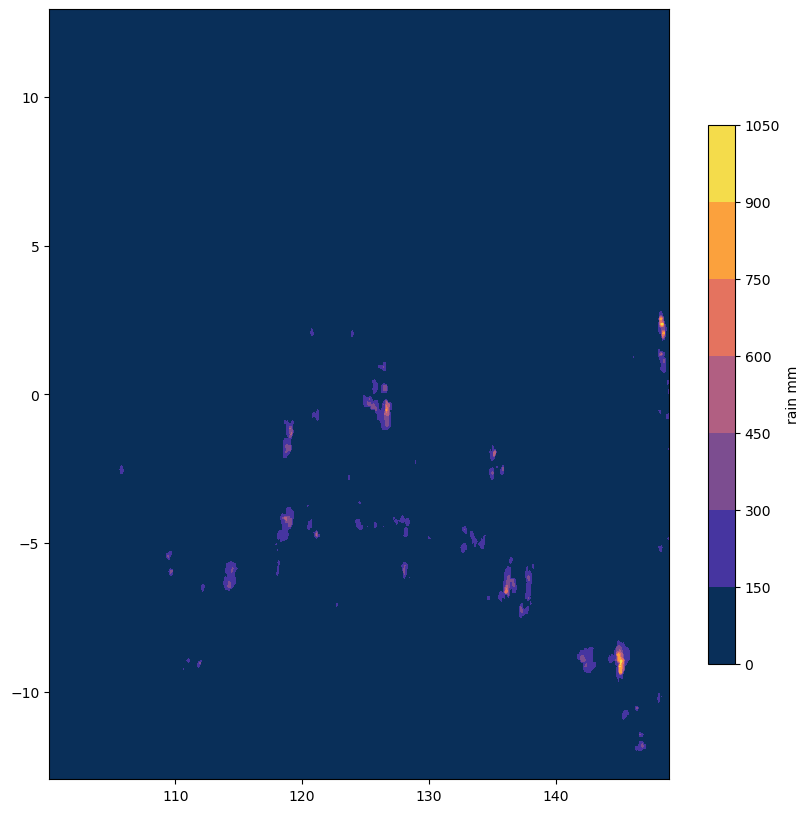

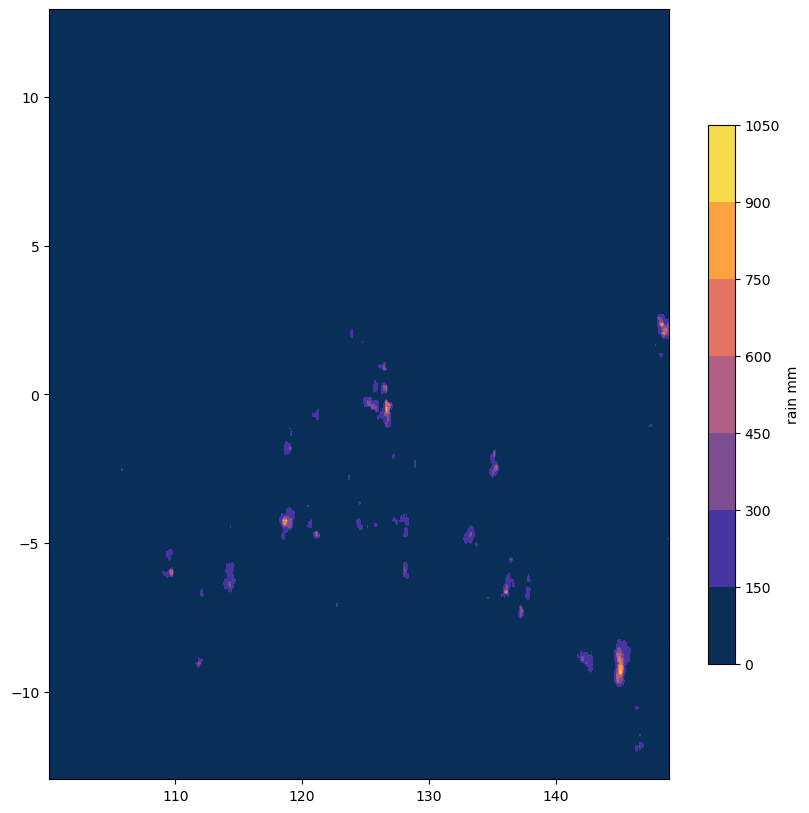

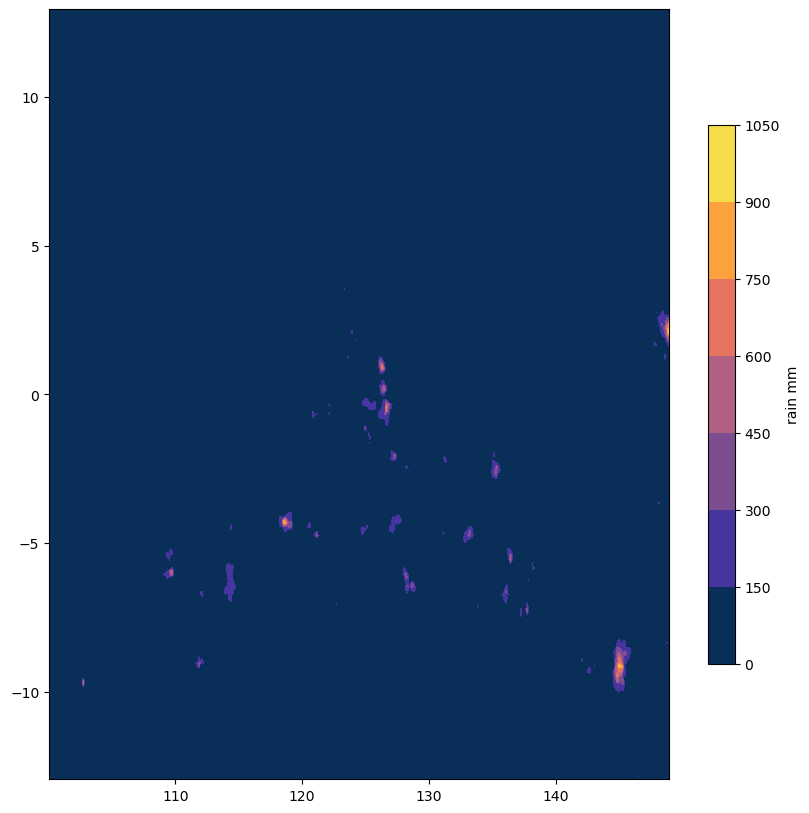

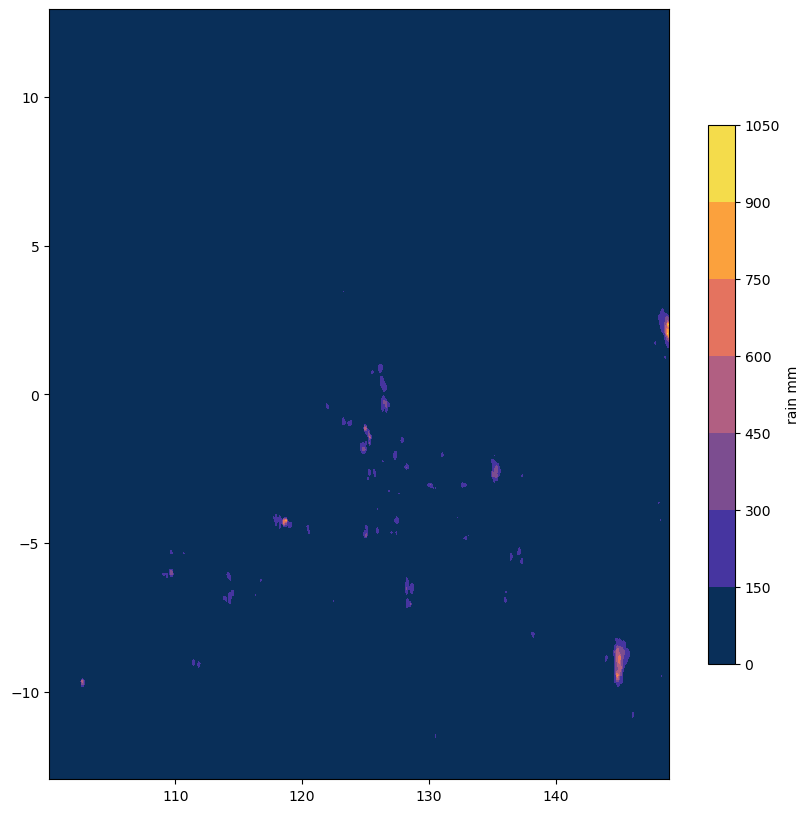

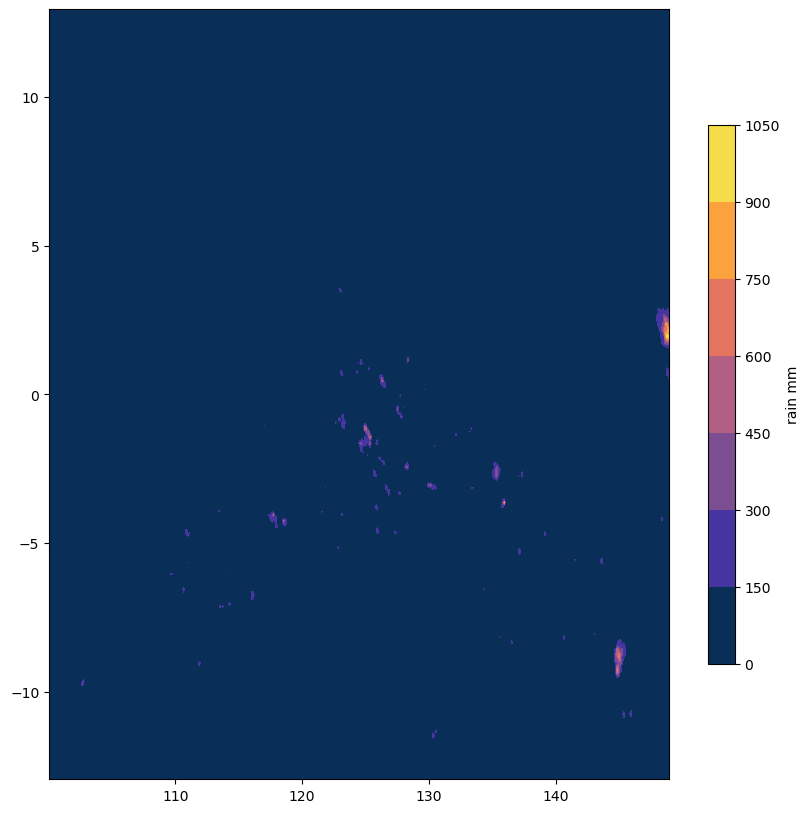

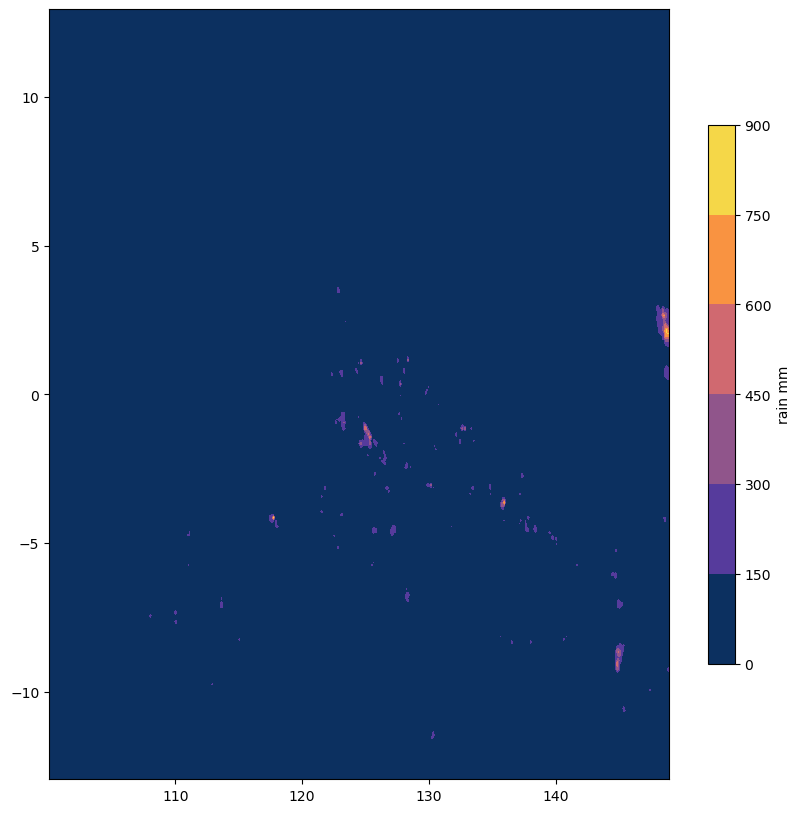

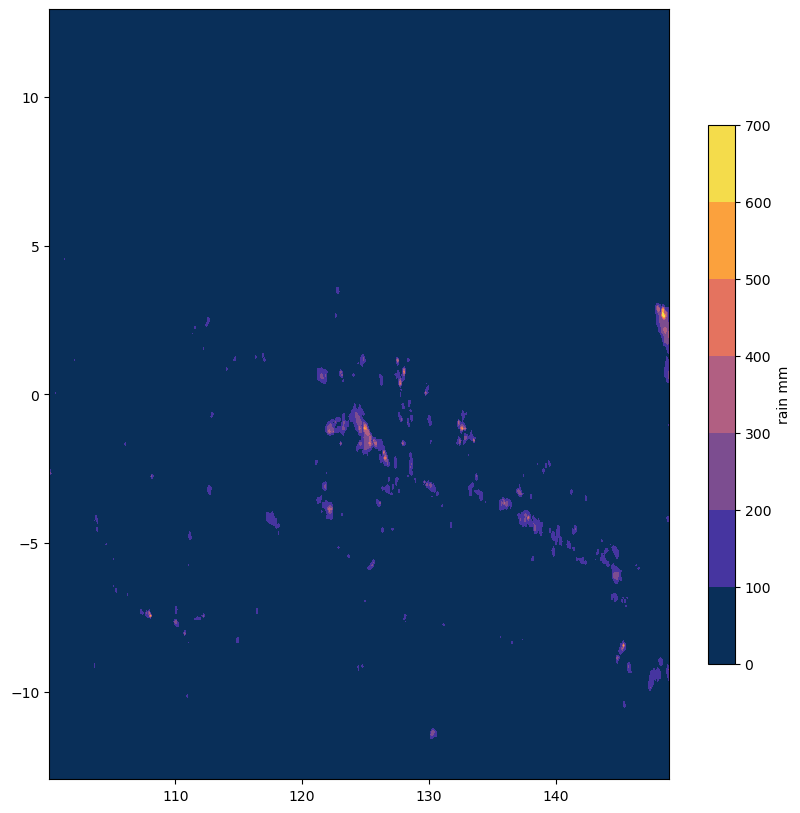

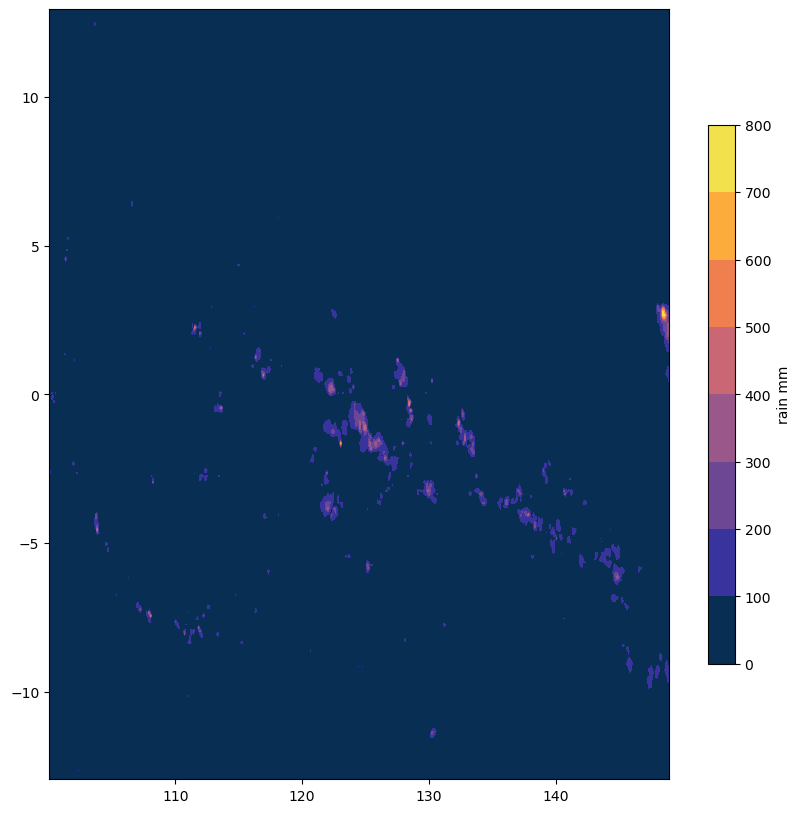

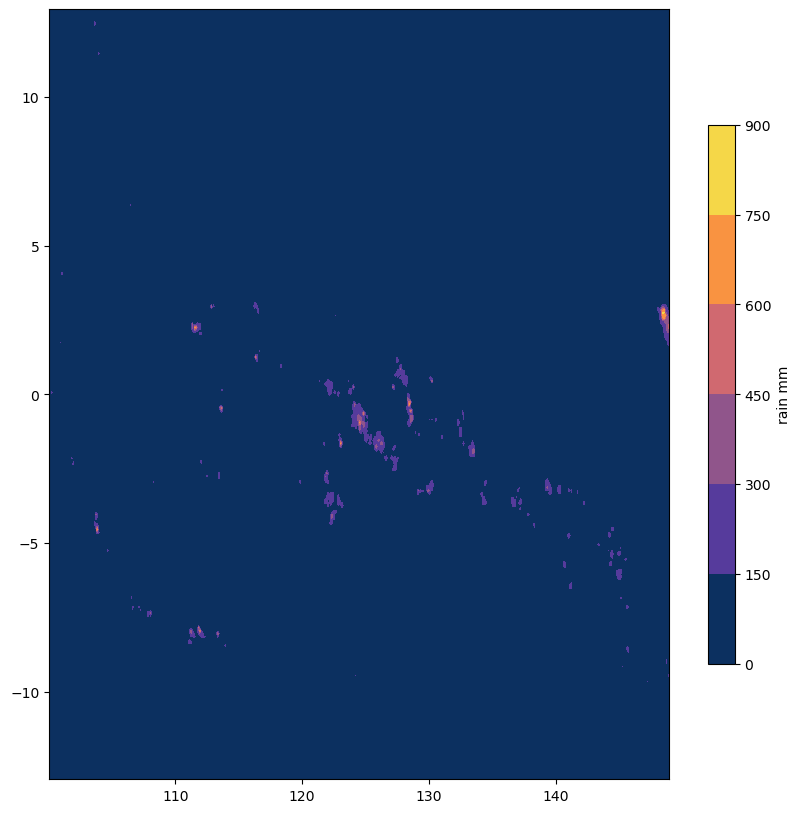

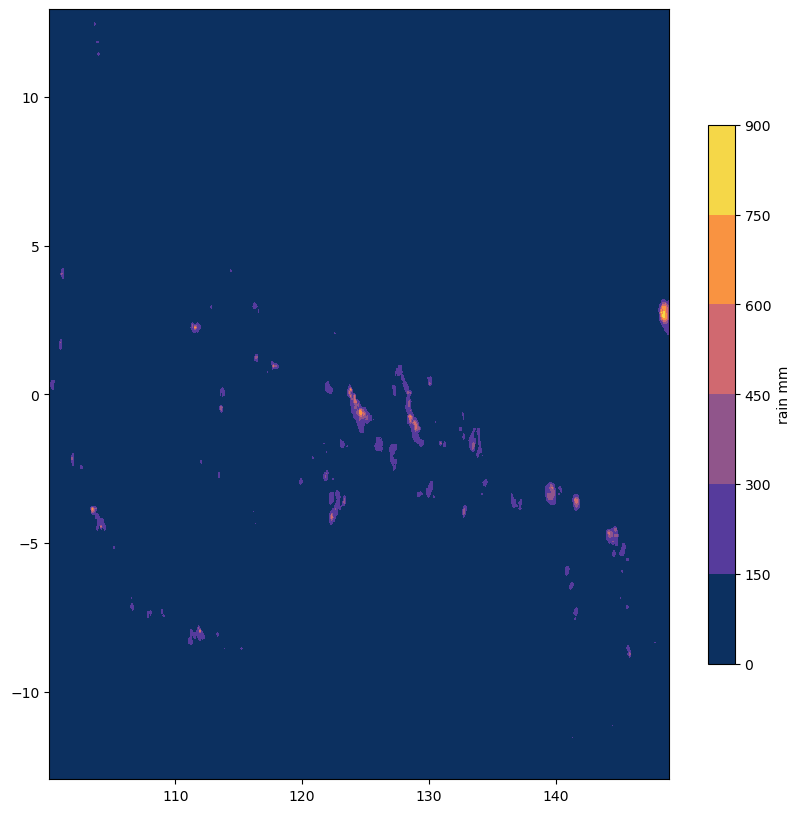

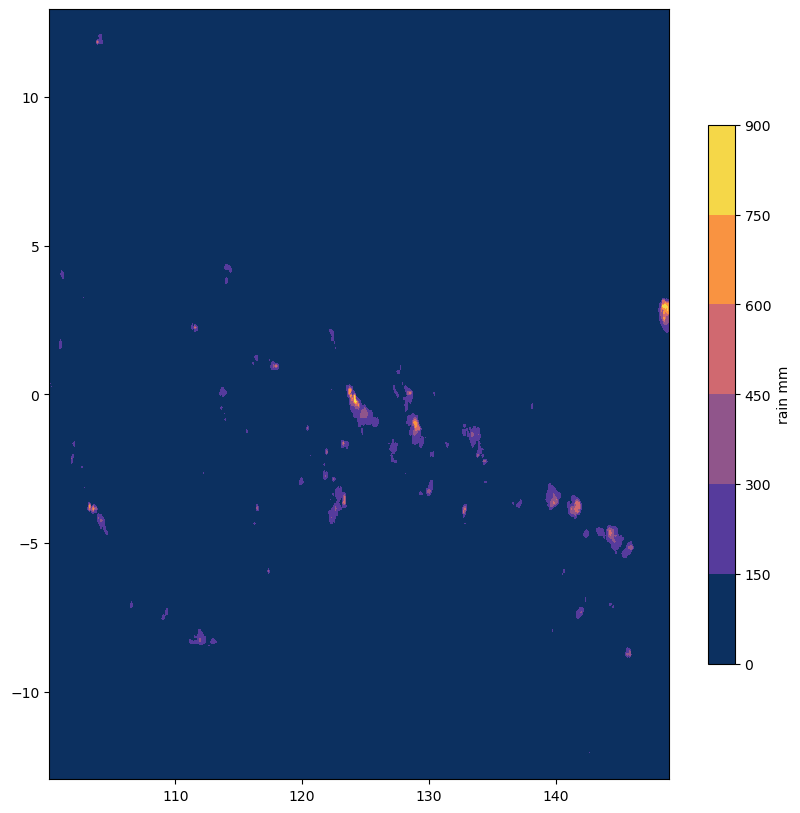

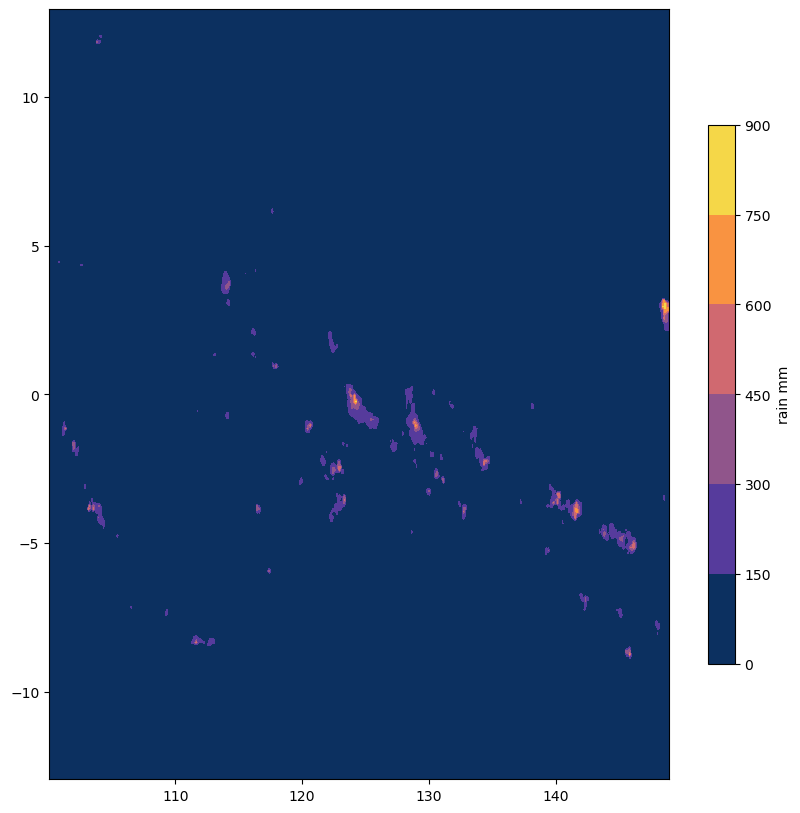

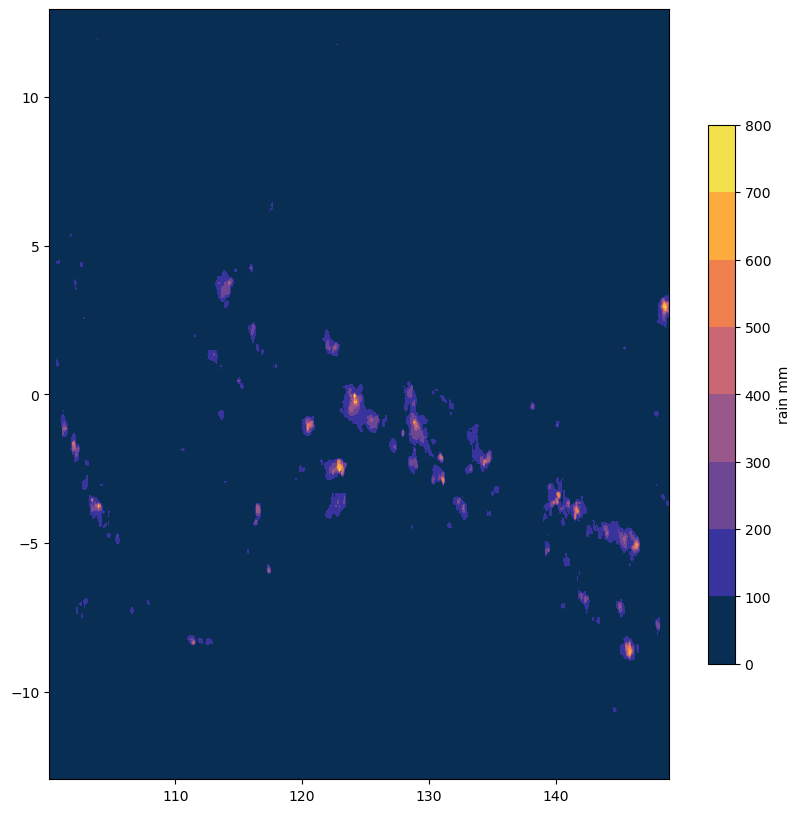

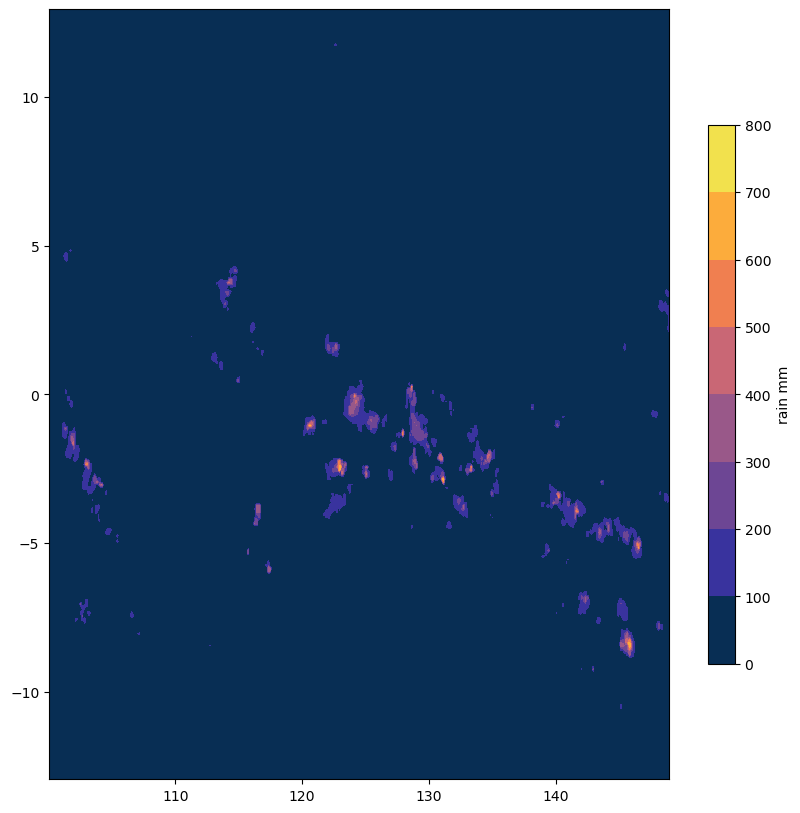

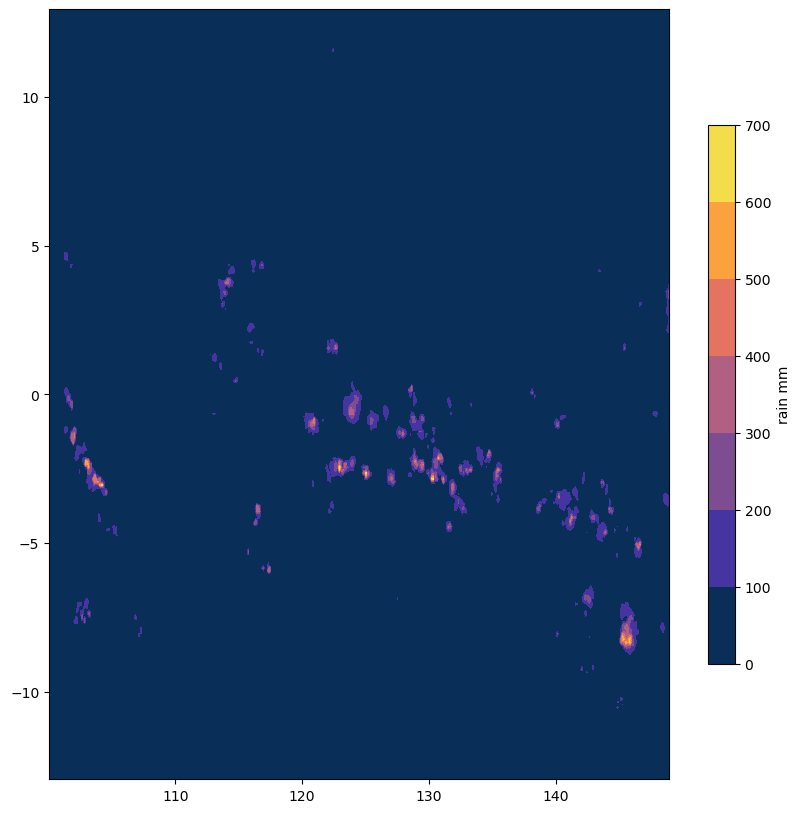

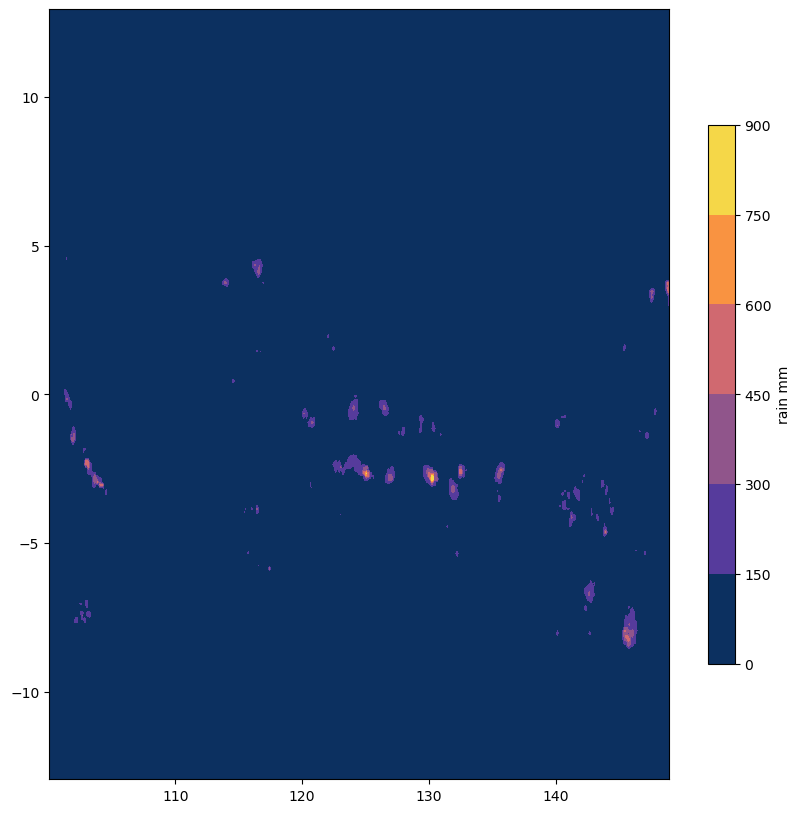

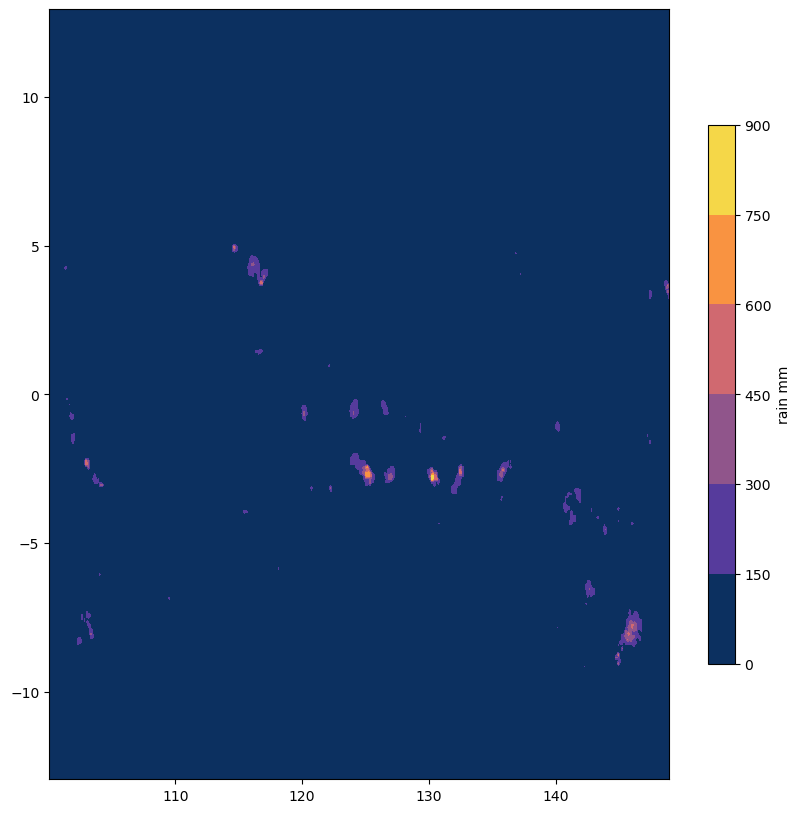

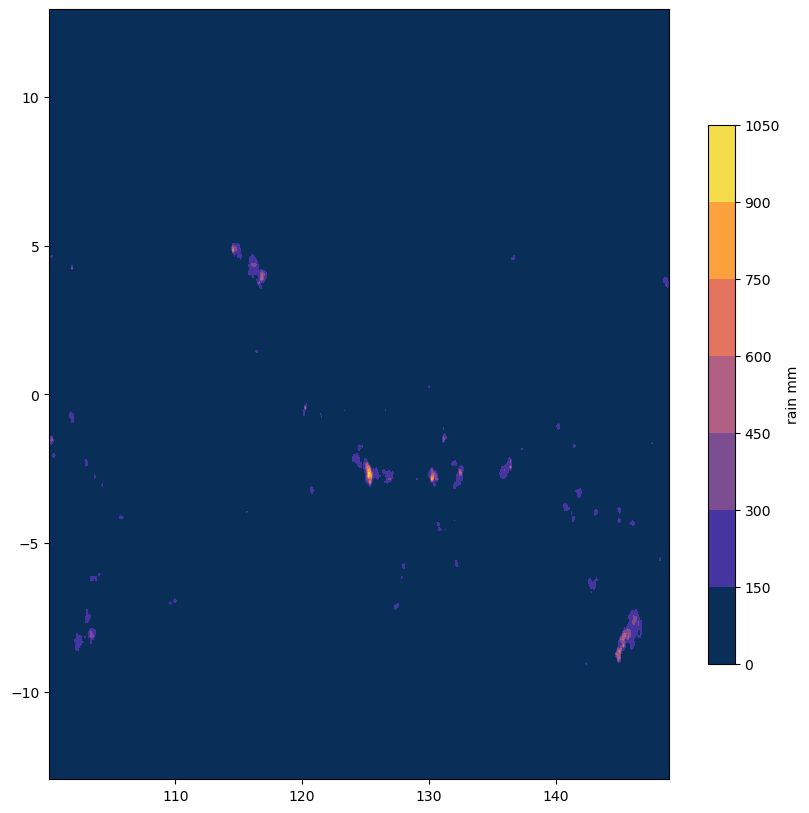

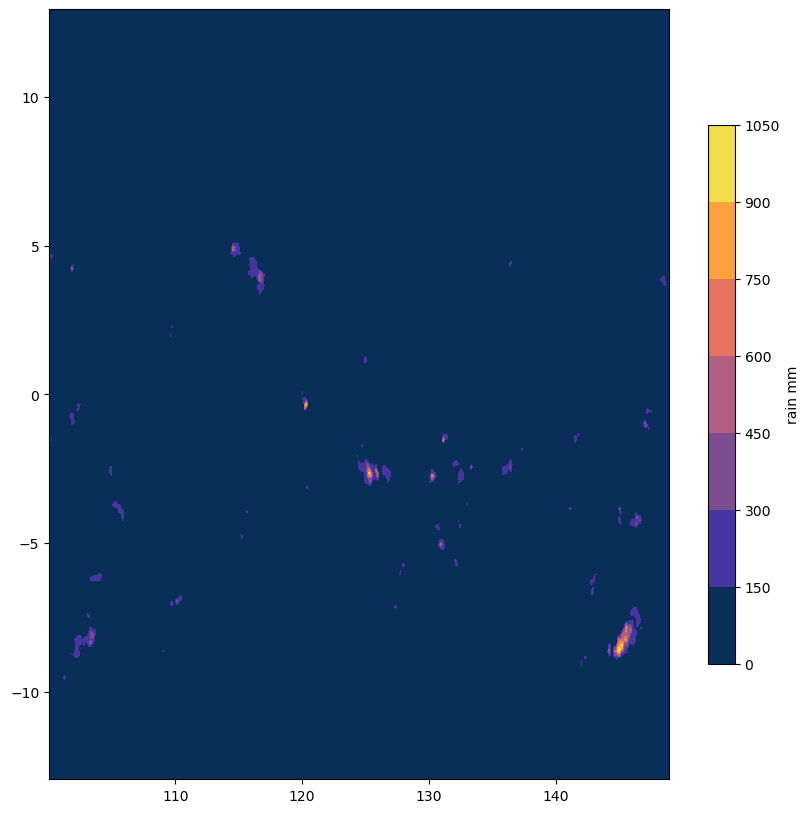

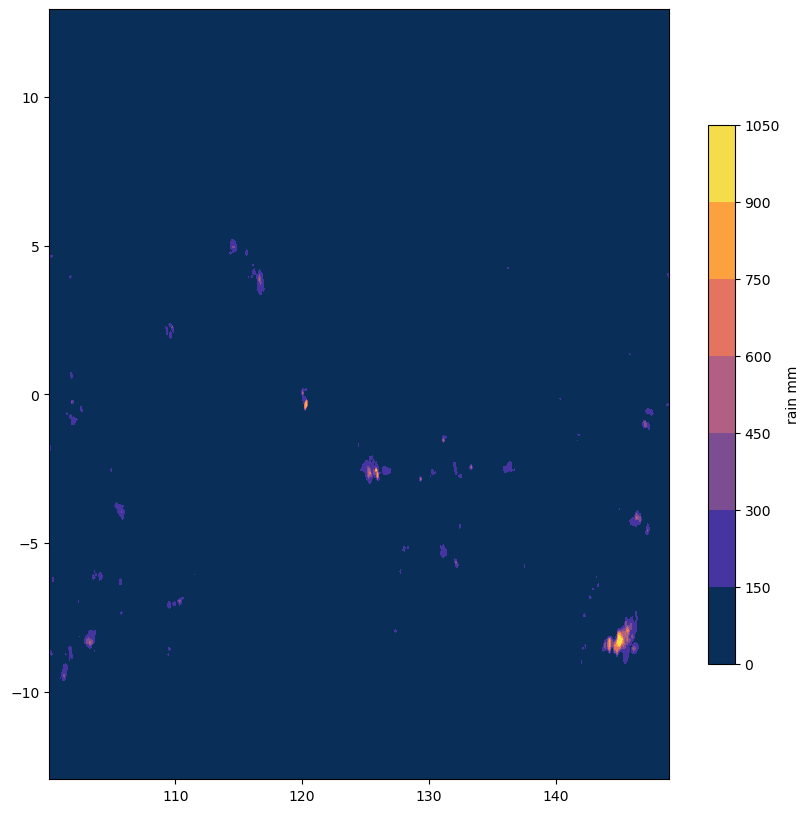

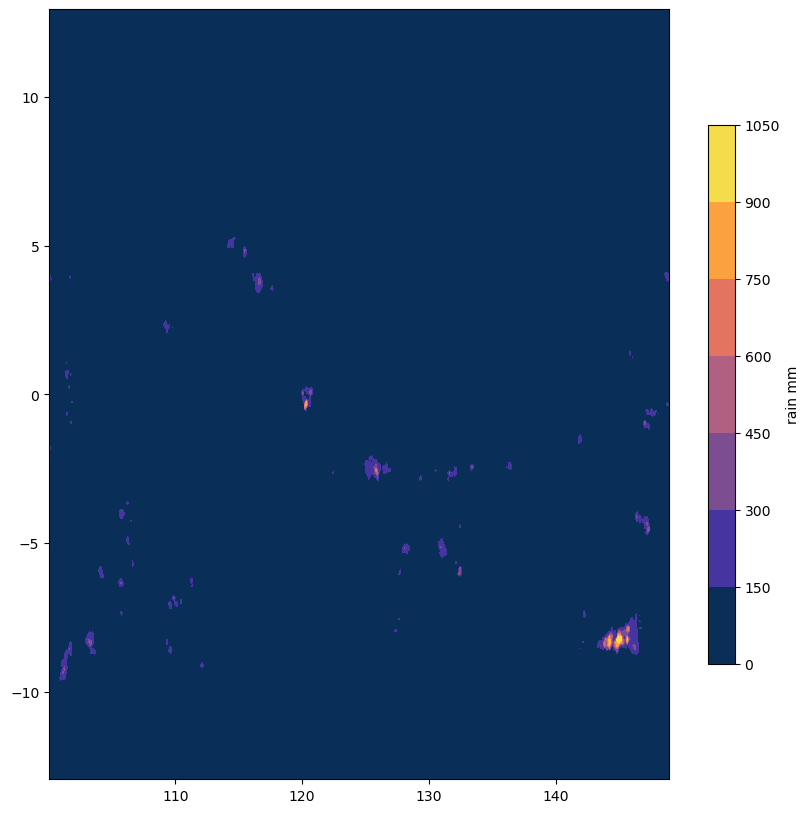

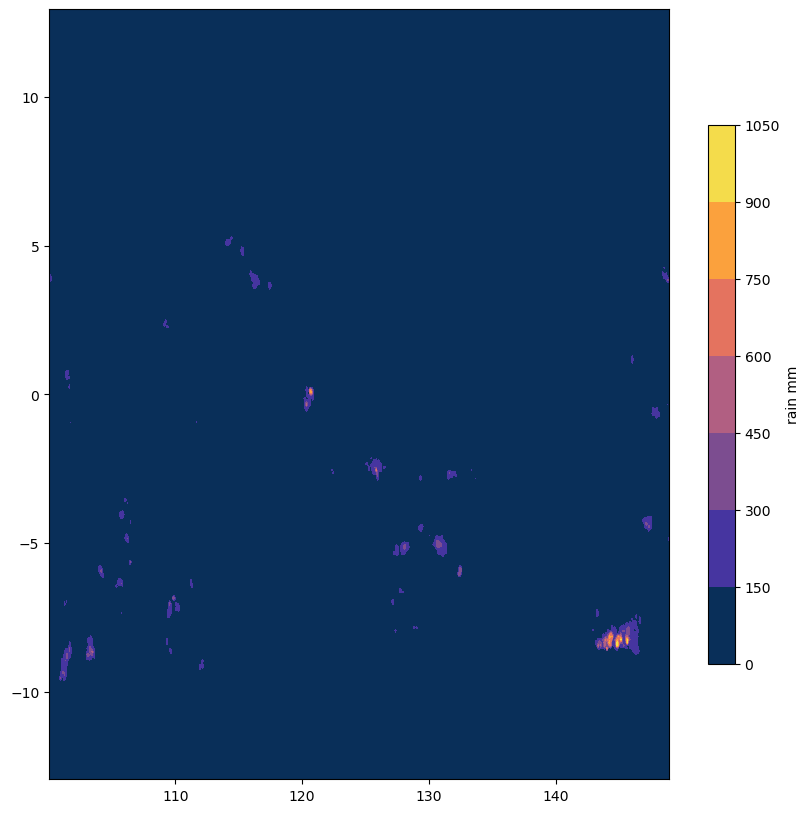

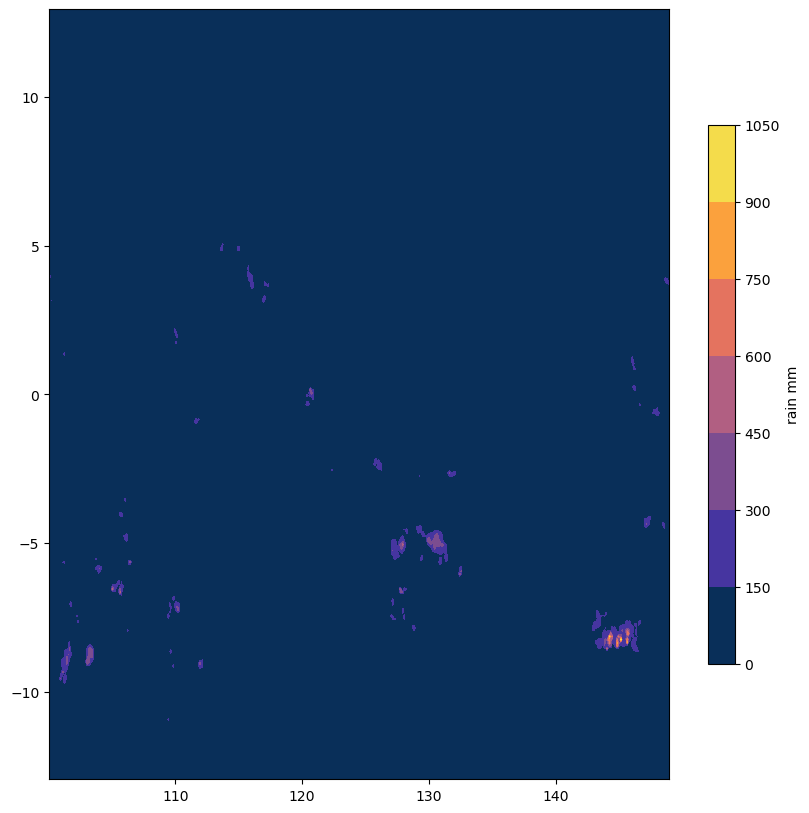

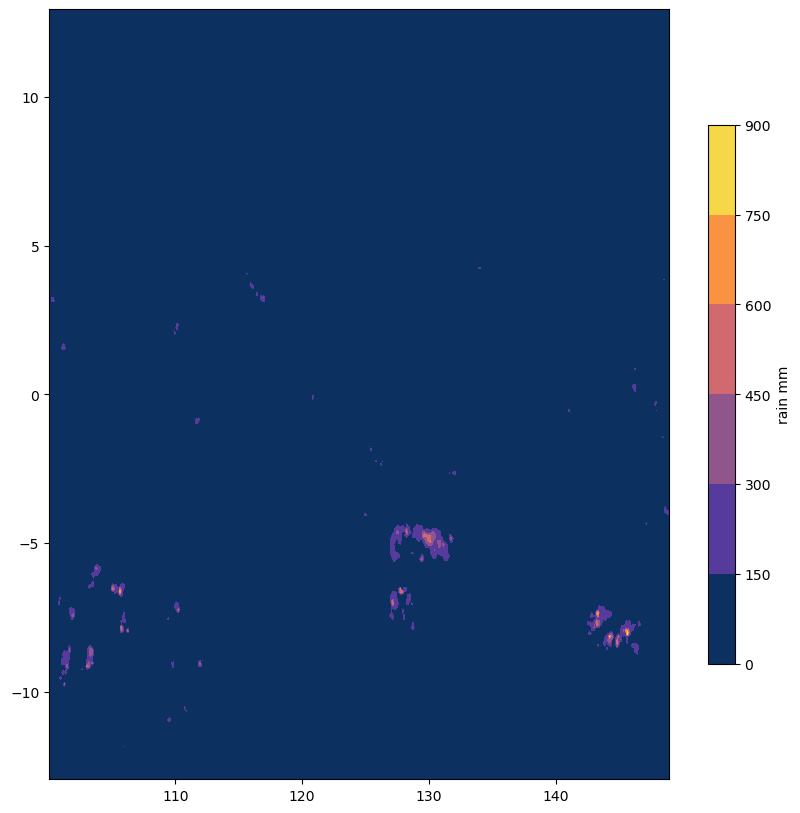

In [7]:
for ii in range(0,24):
    fig,ax=plt.subplots(1,1,figsize=(10,10))
    colormap = cmo.thermal
    da_fin=ds['var']
    cp = ax.contourf(y,x,da_fin[ii,:,:],cmap=colormap)
    cbar = fig.colorbar(cp, label= 'rain mm', location='right', shrink=0.7)
    plt.savefig('/home/563/cc6171/imerge_'+str(ii+1)+'.png',transparent=None,format='png',bbox_inches='tight',pad_inches=0.1)
    plt.show()


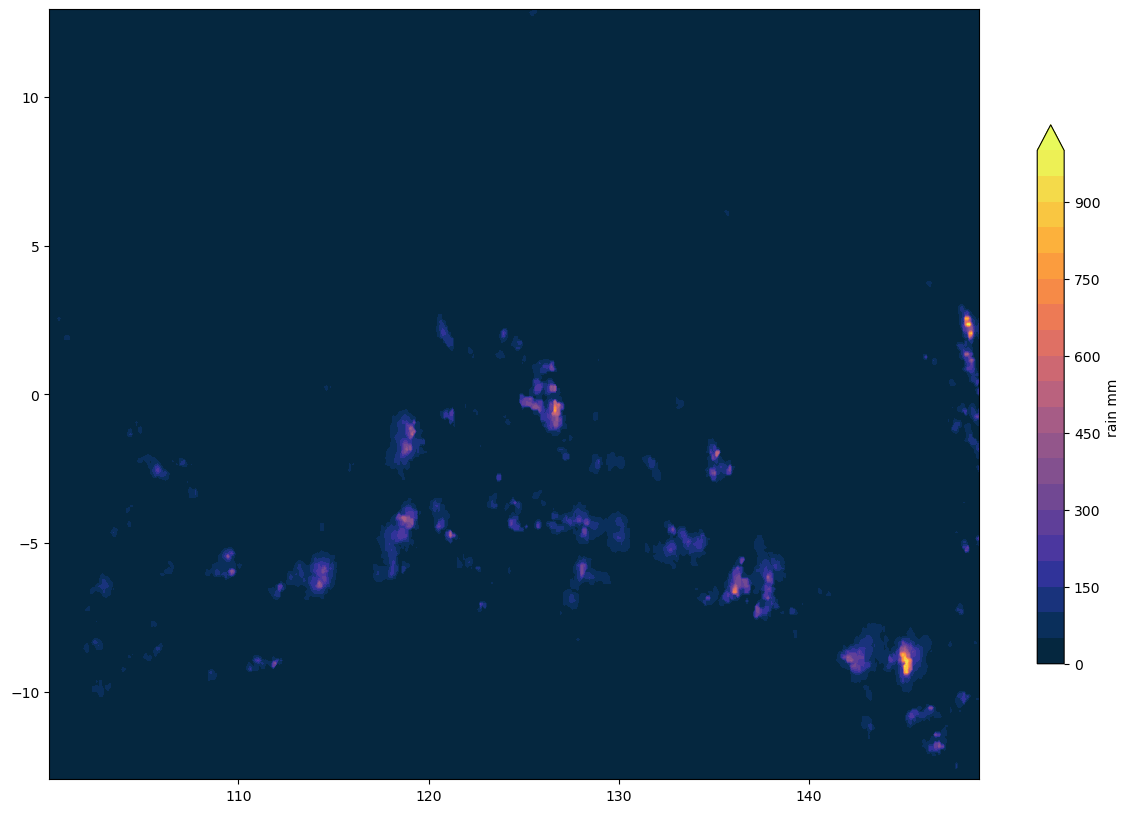

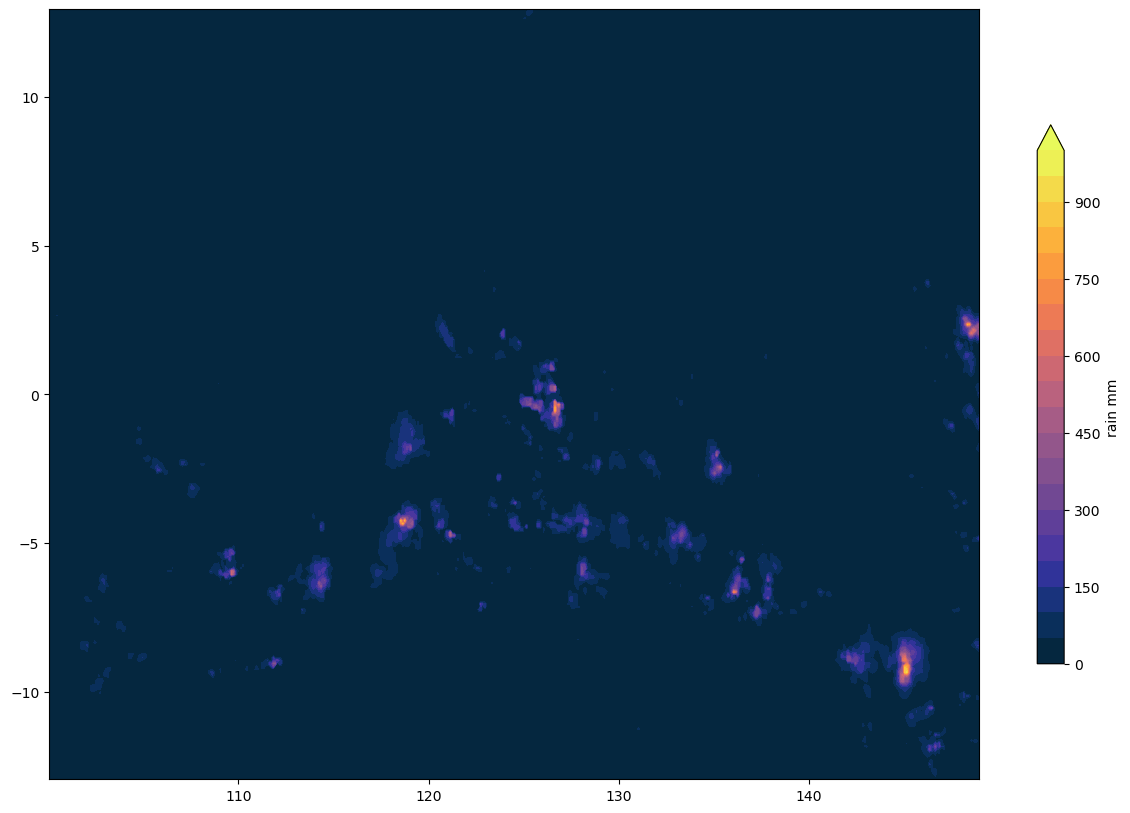

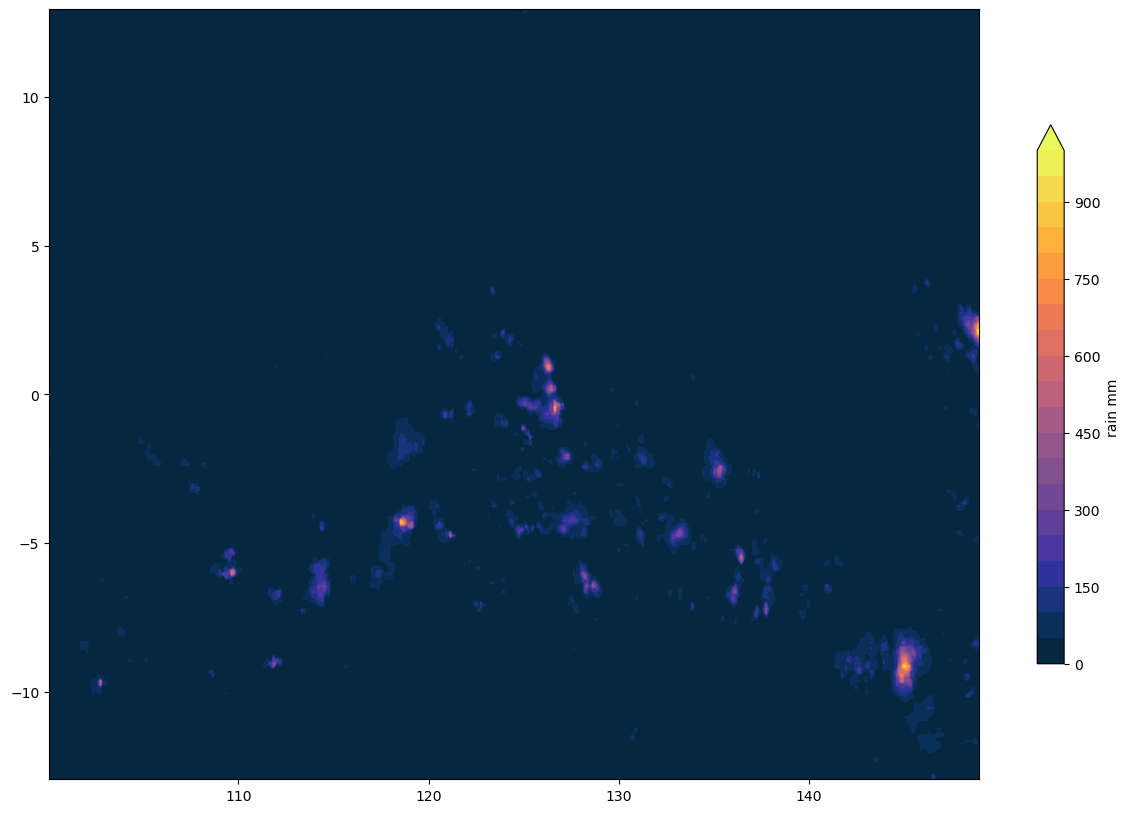

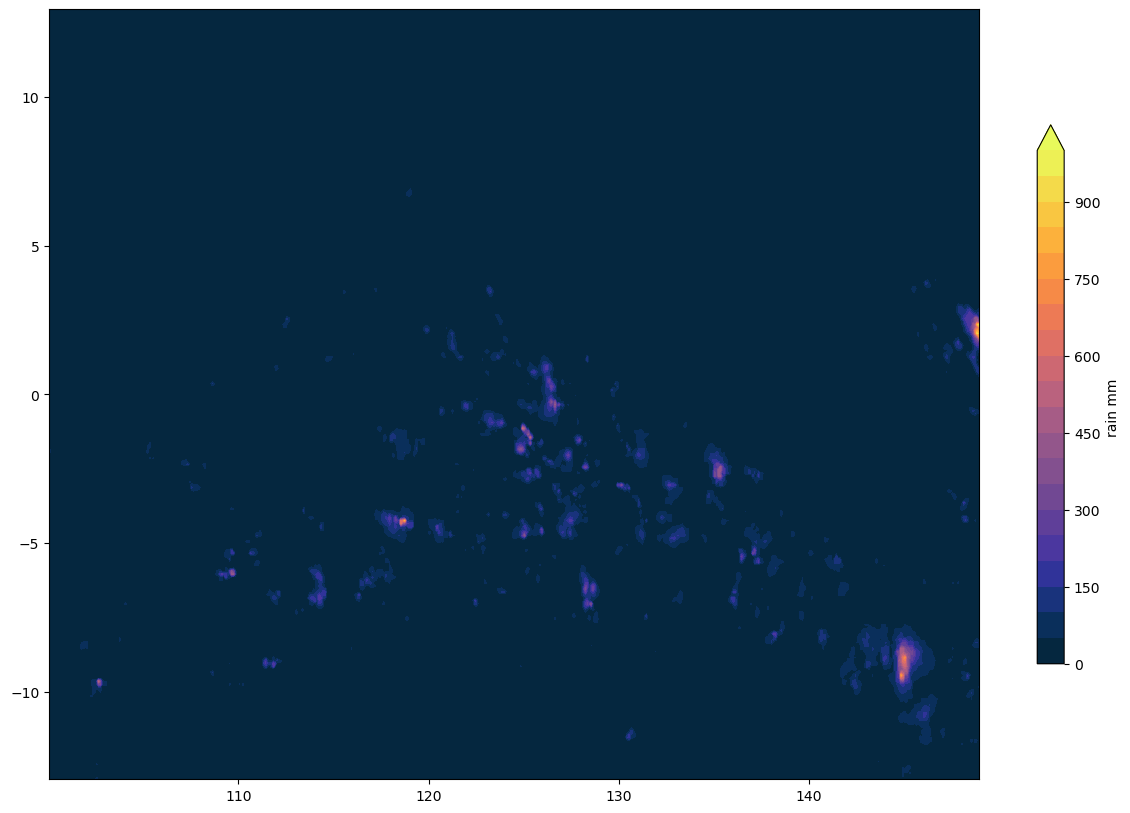

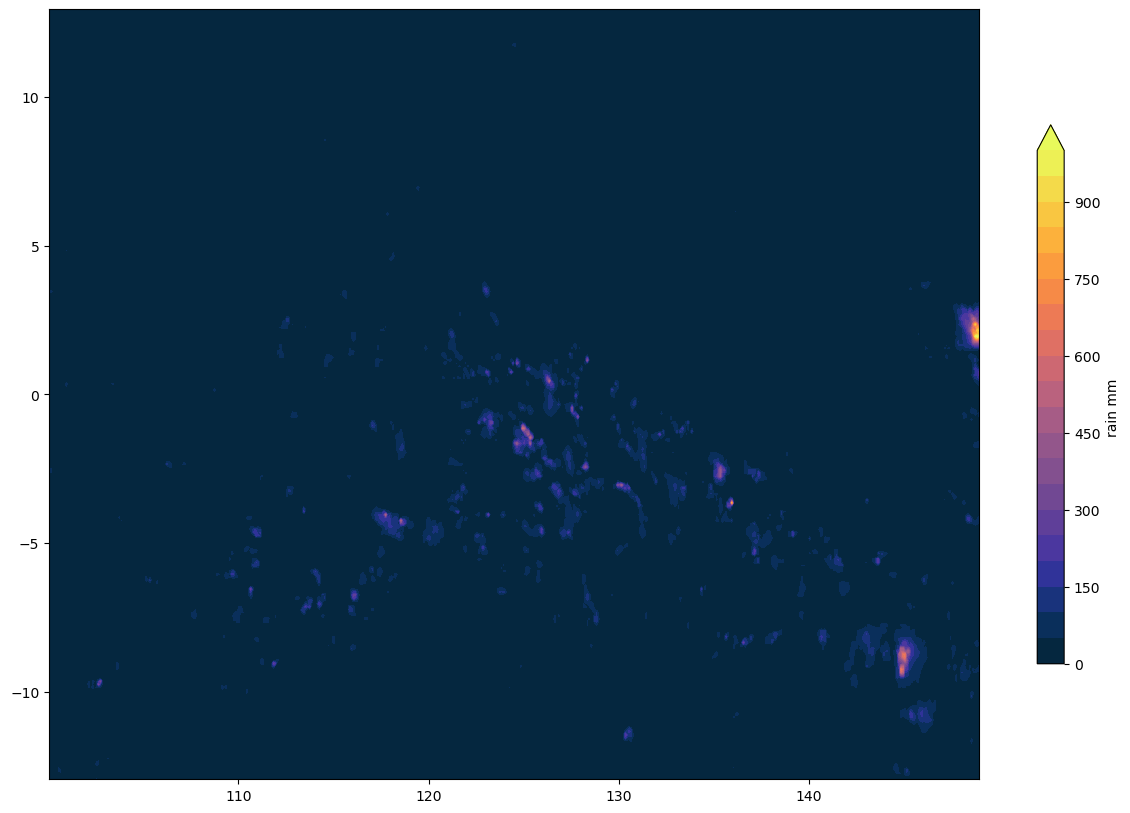

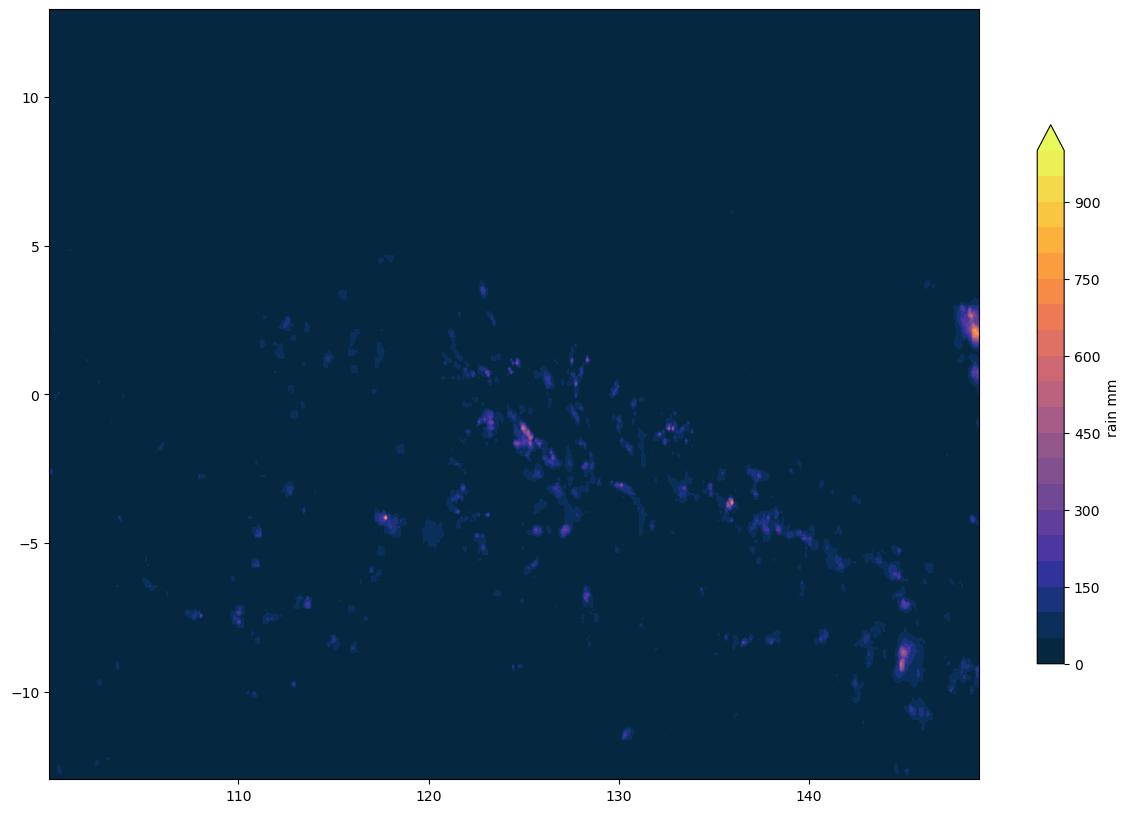

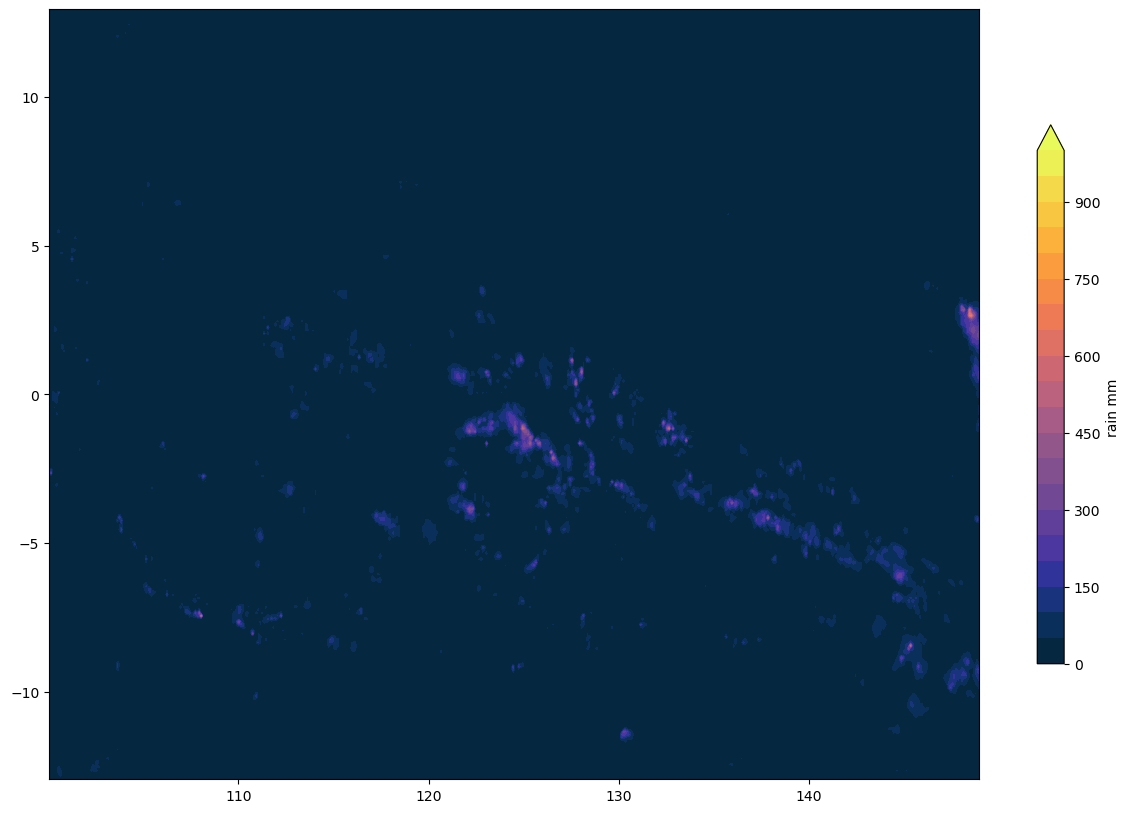

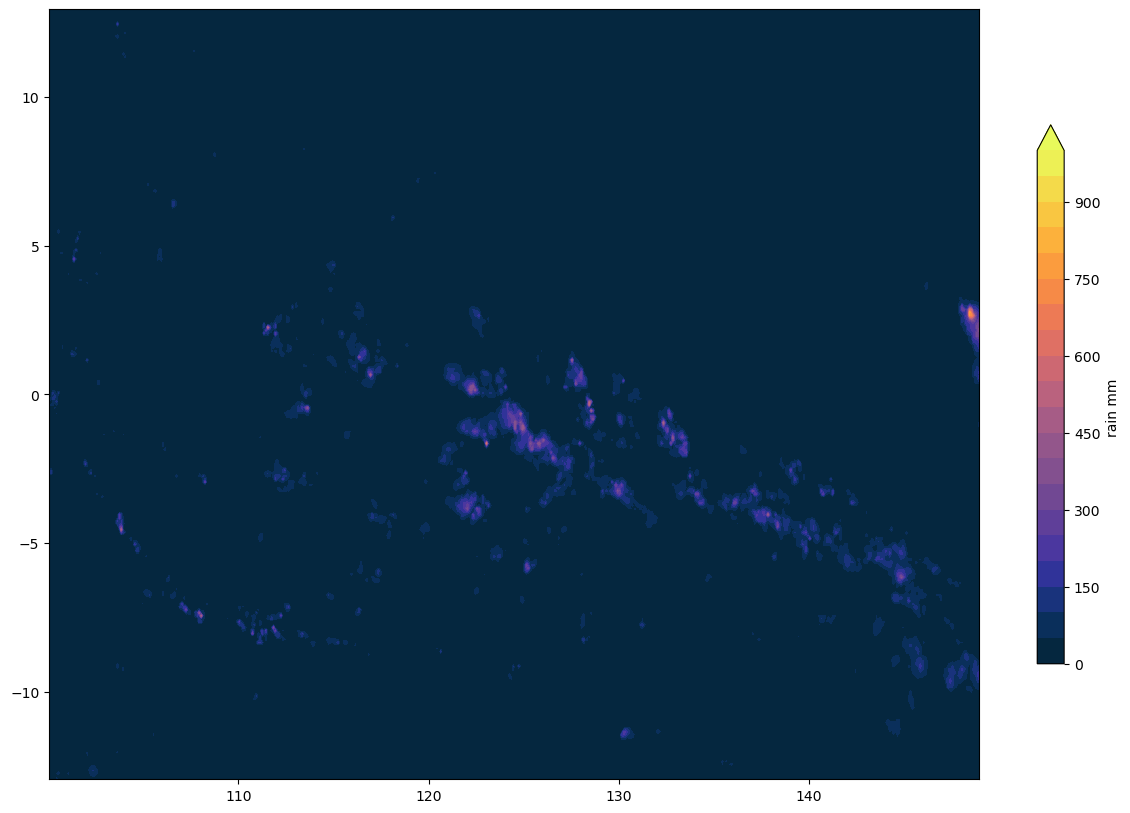

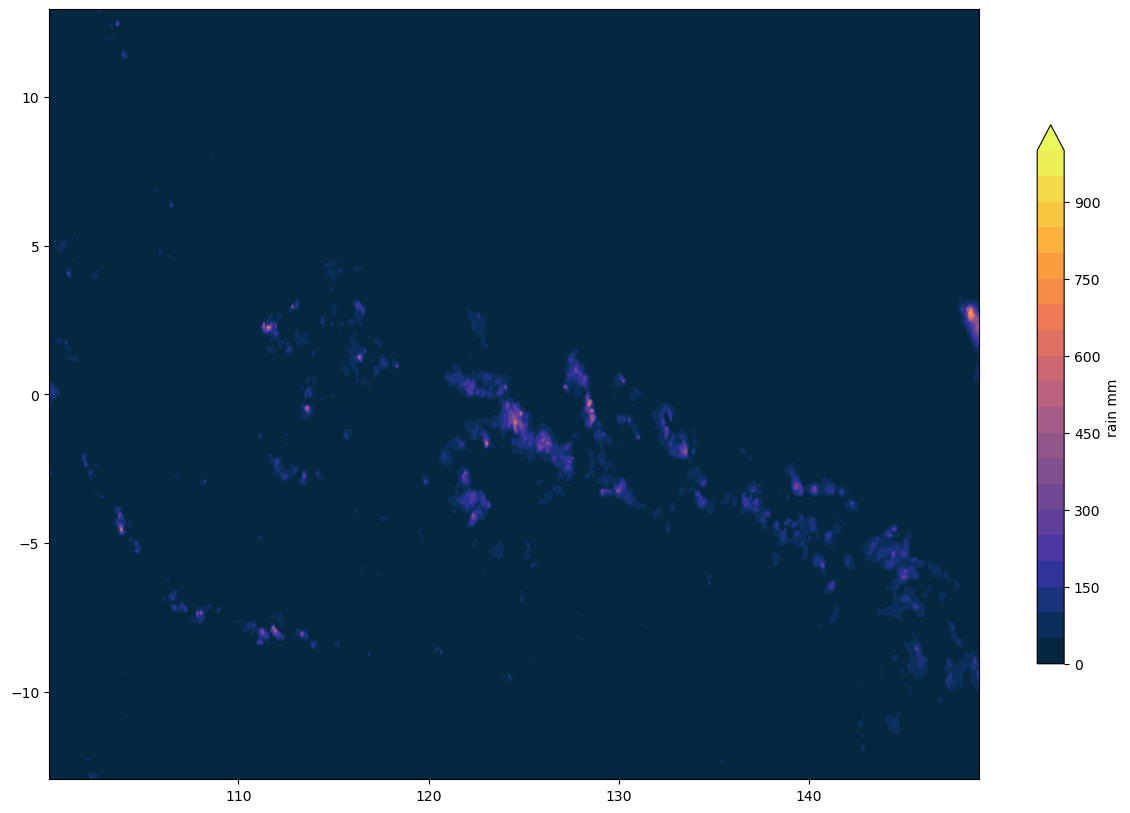

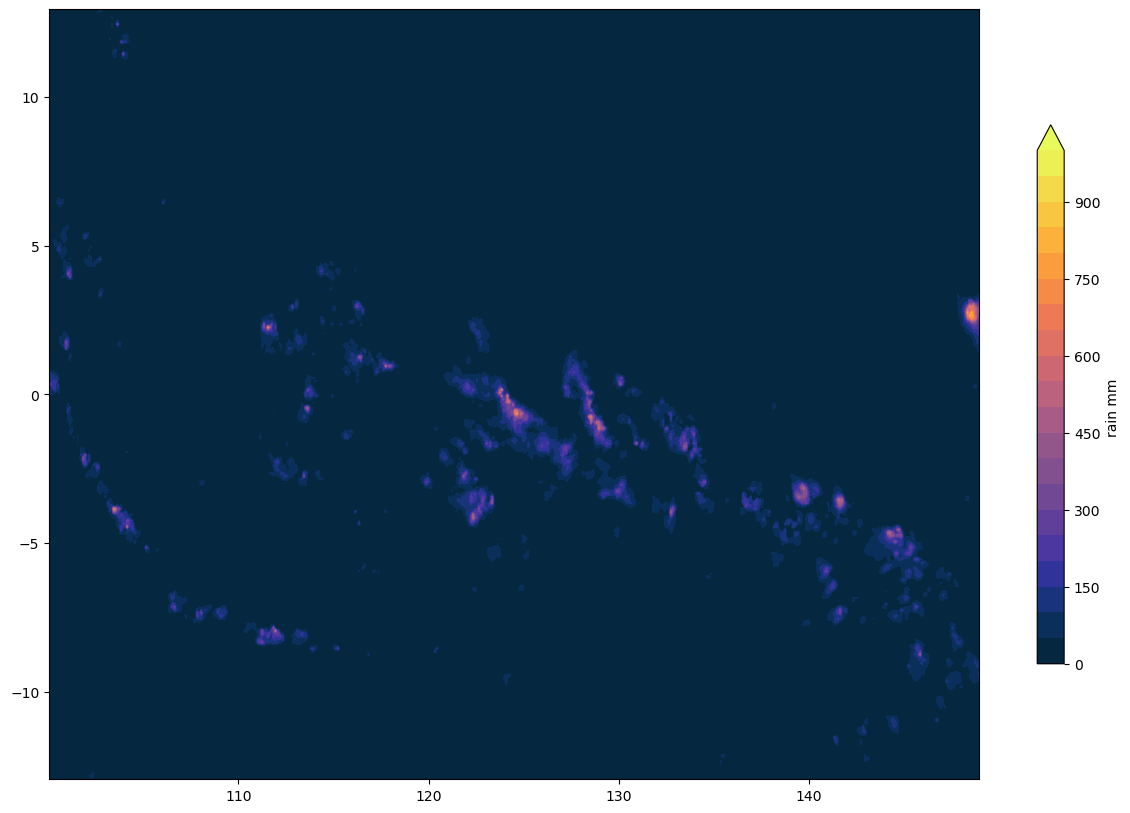

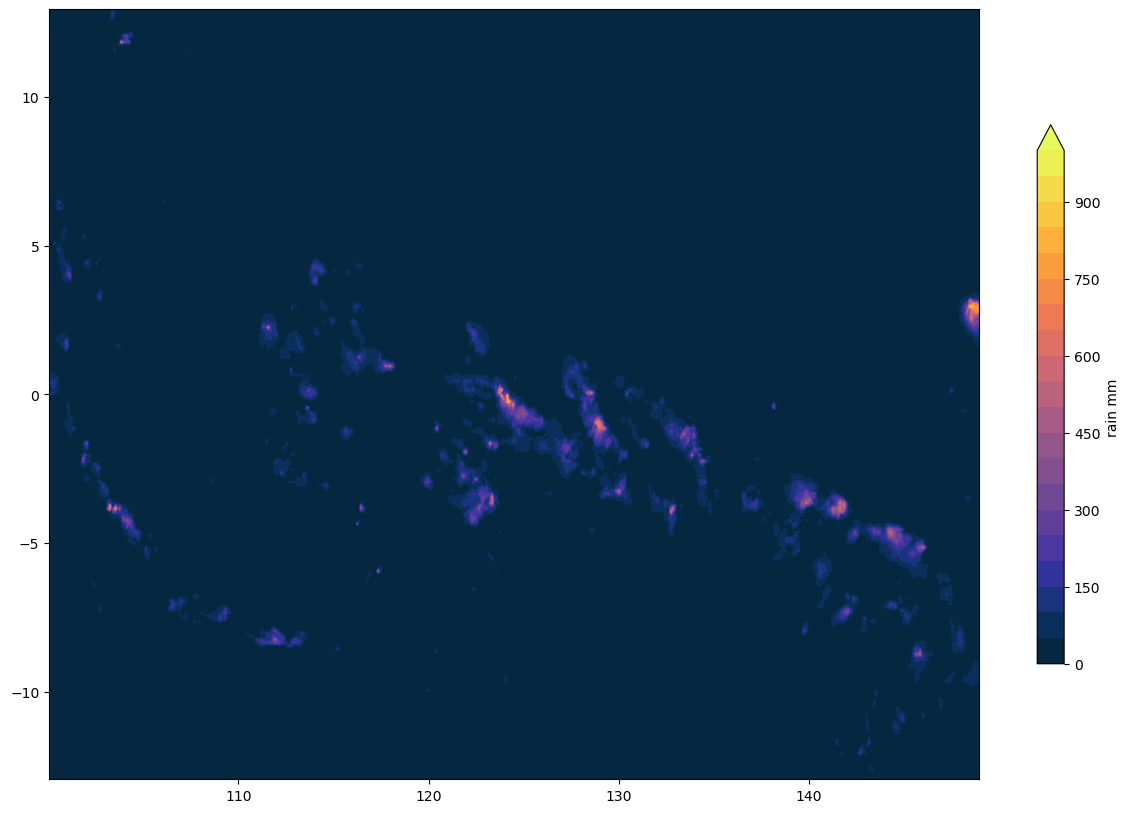

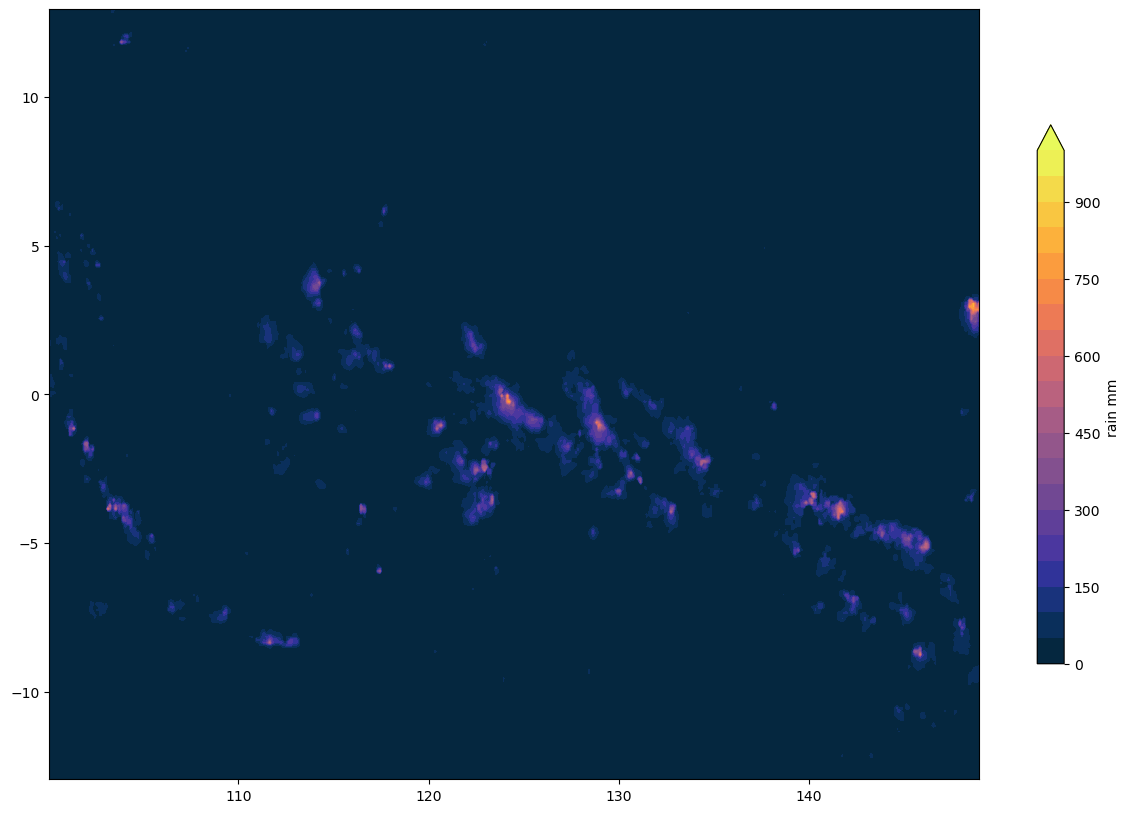

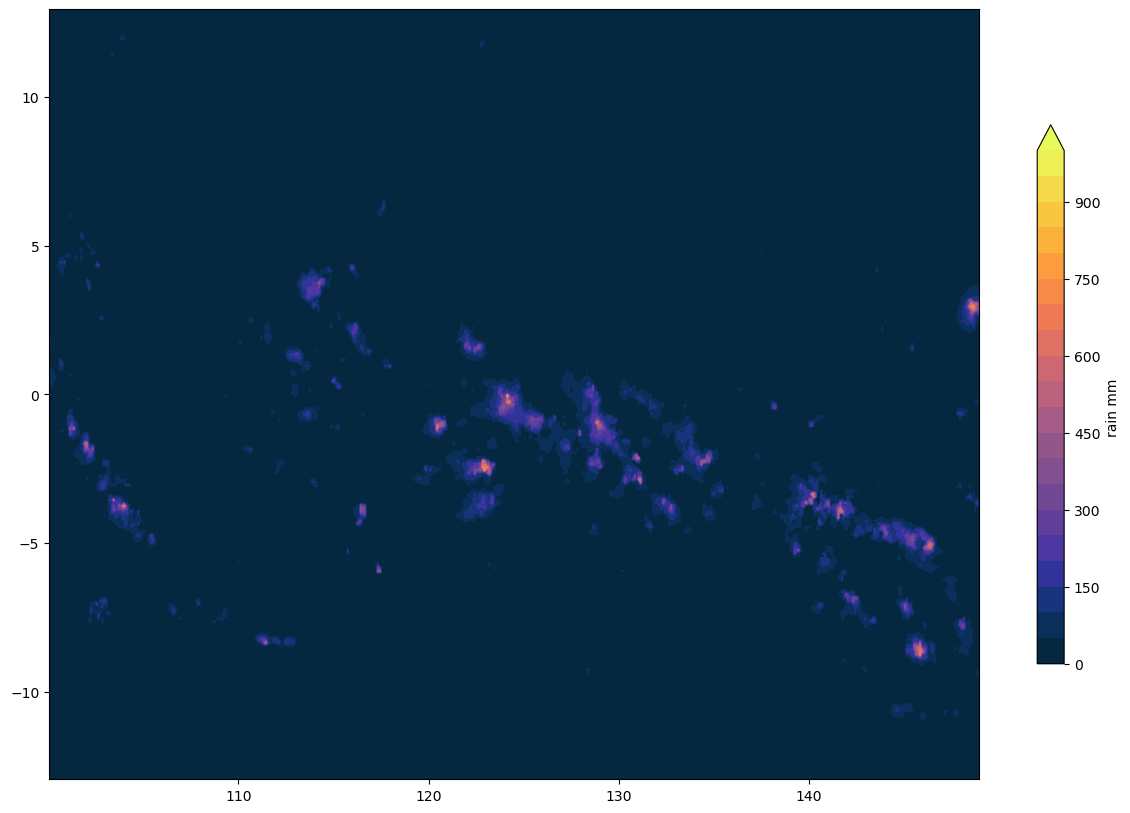

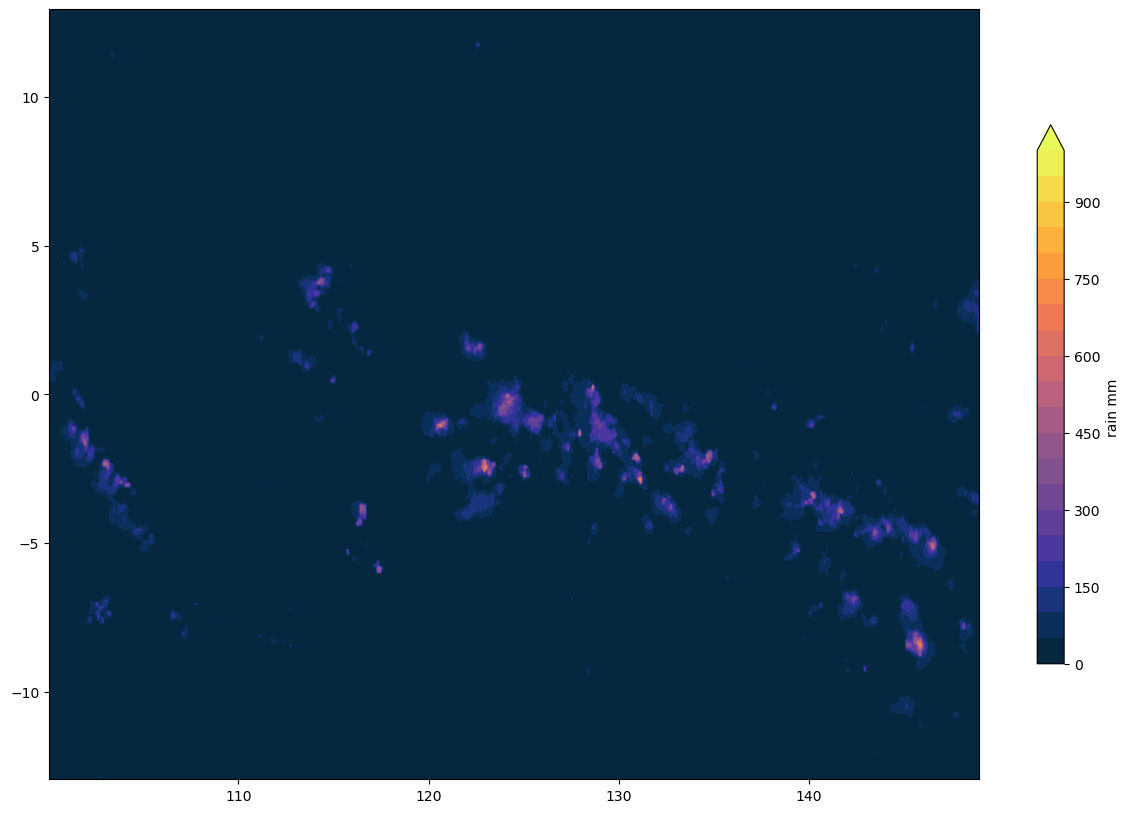

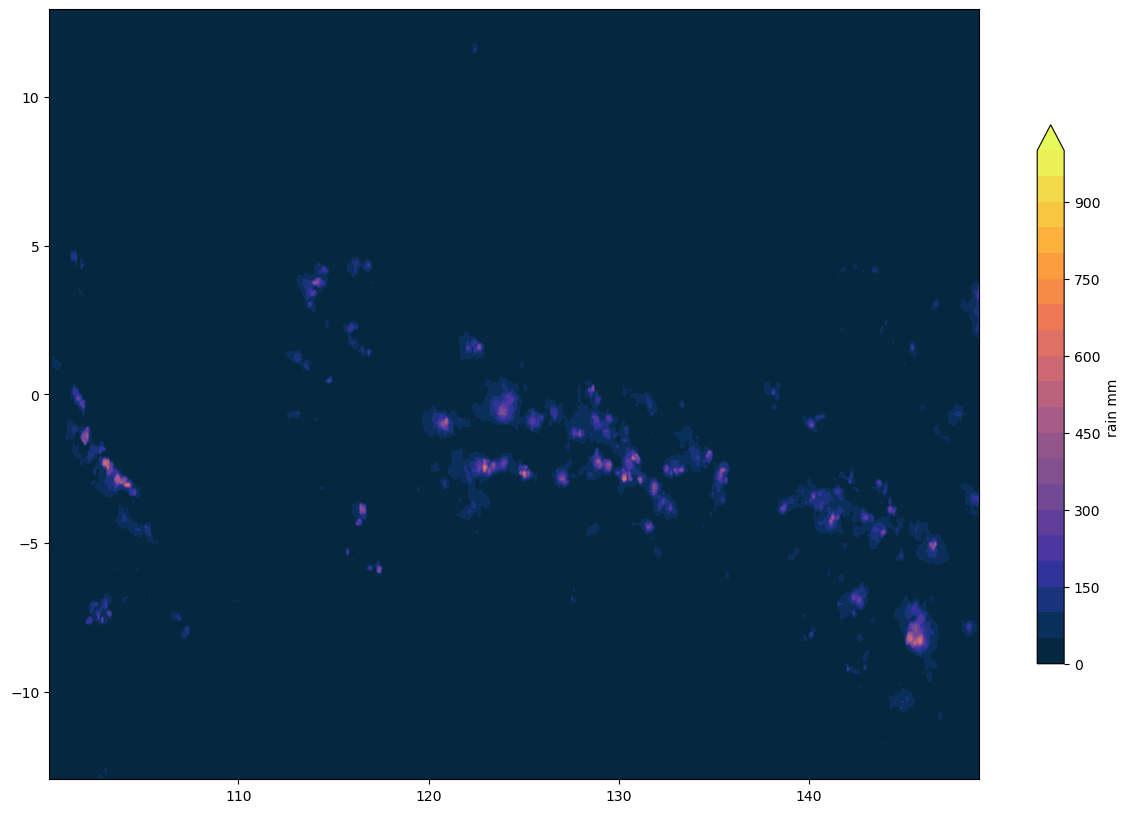

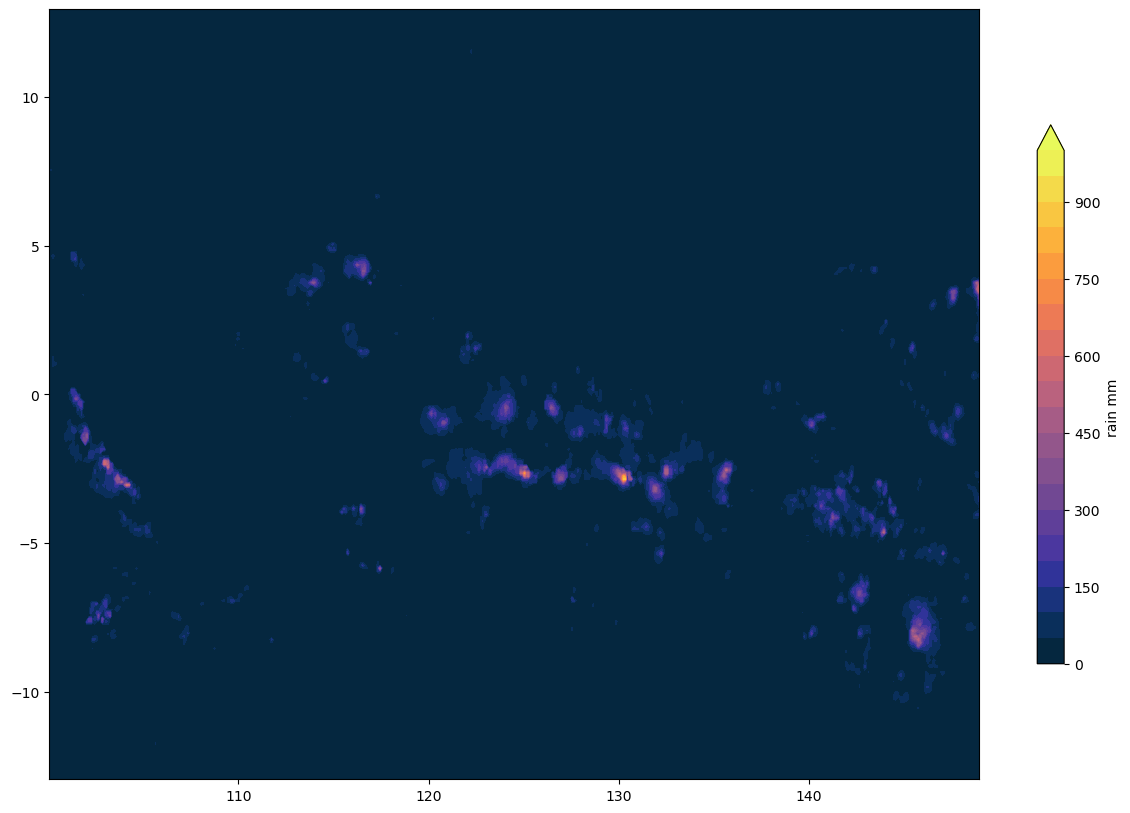

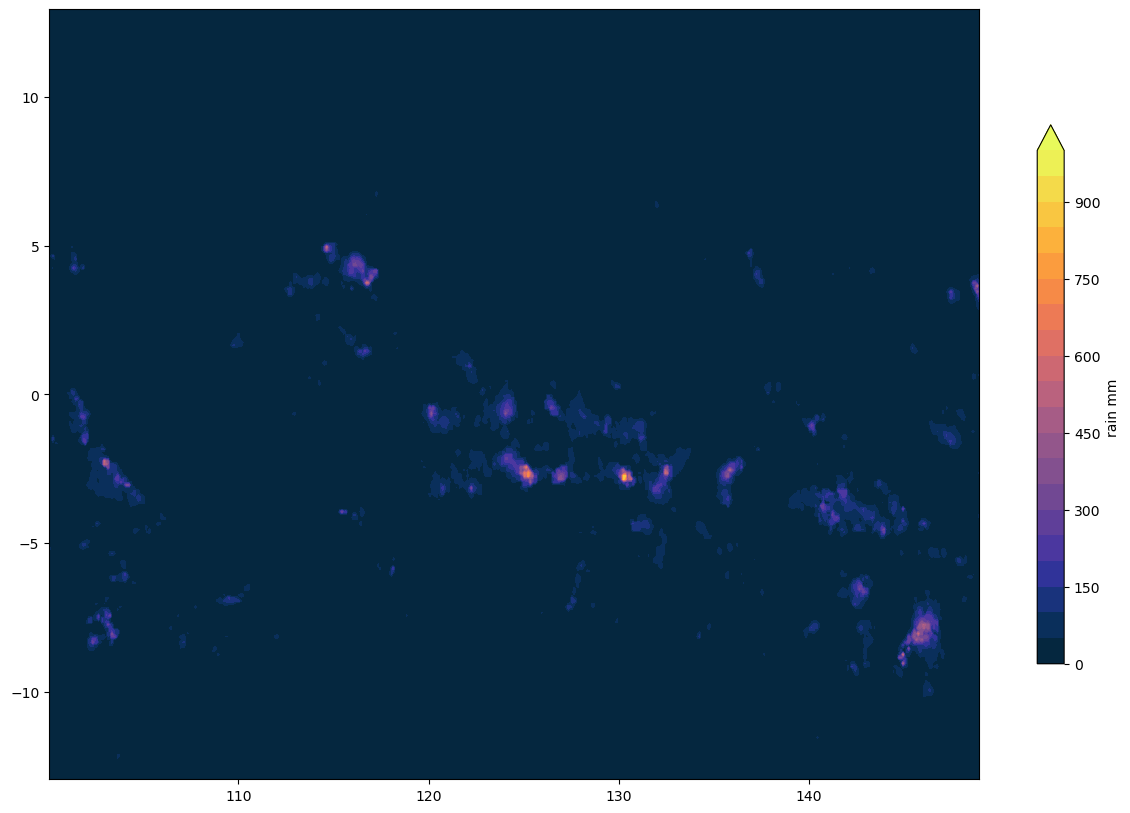

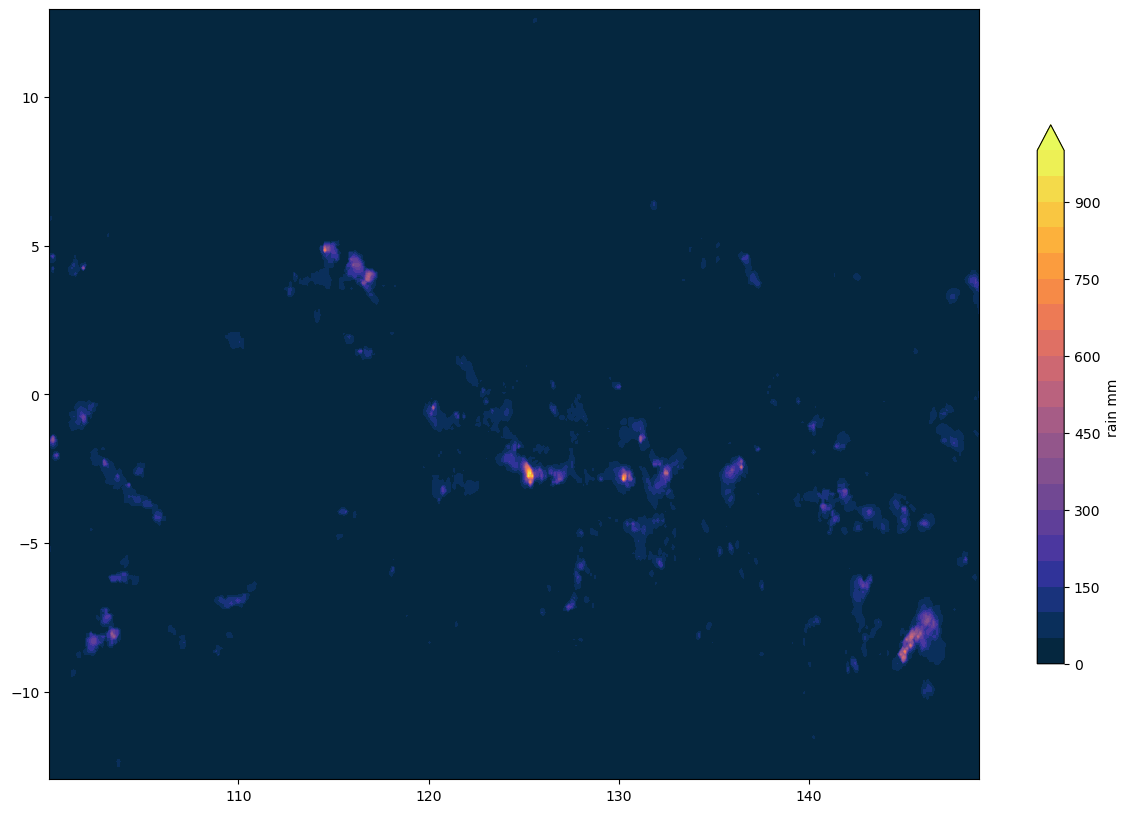

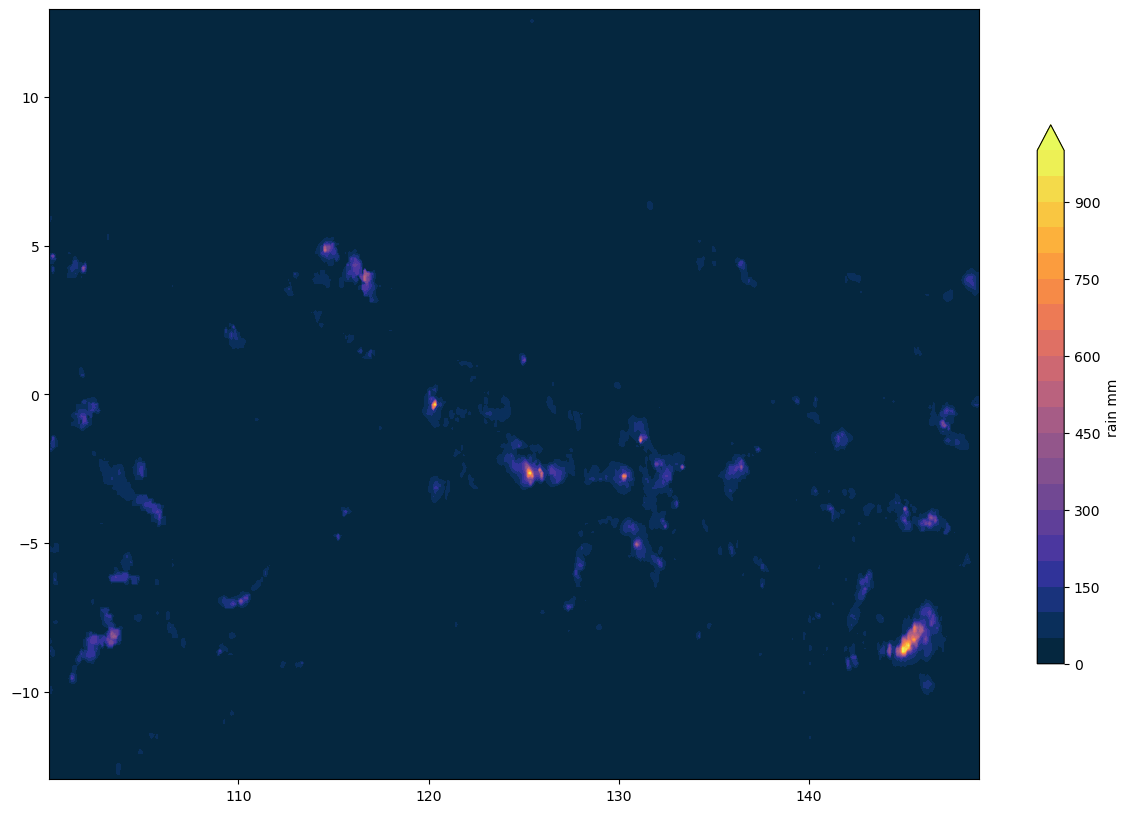

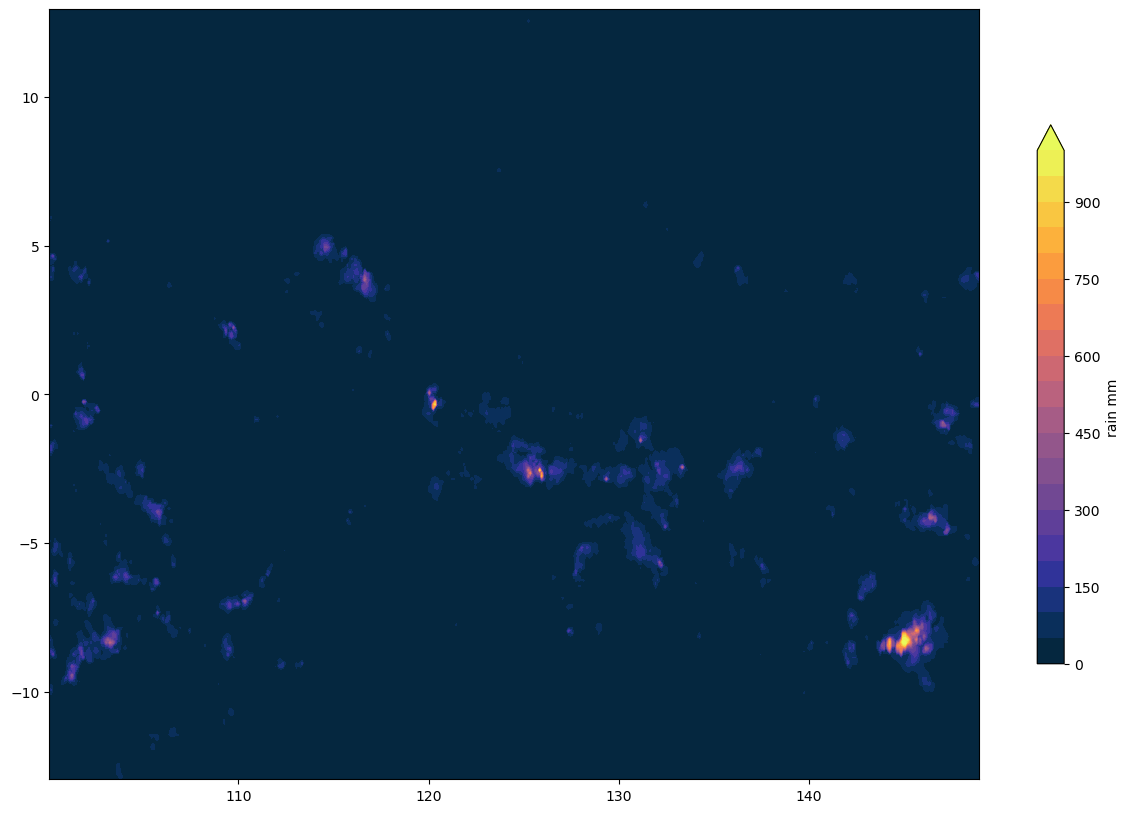

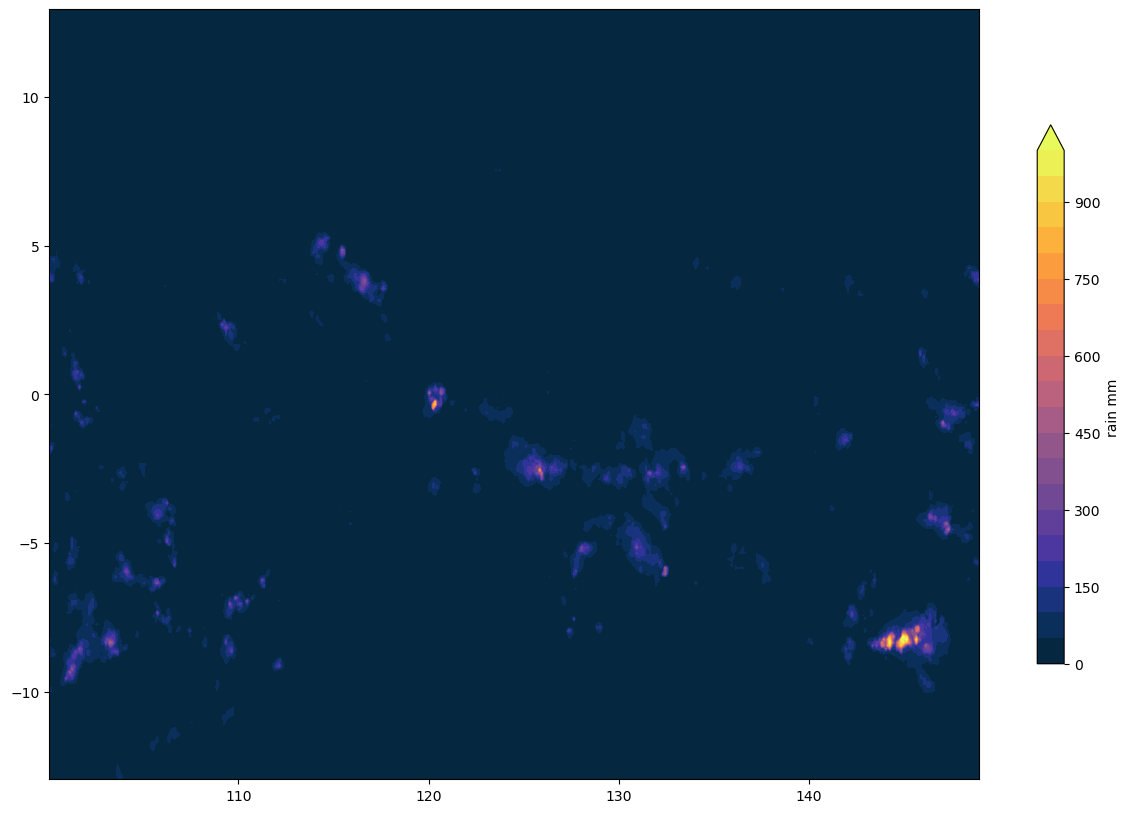

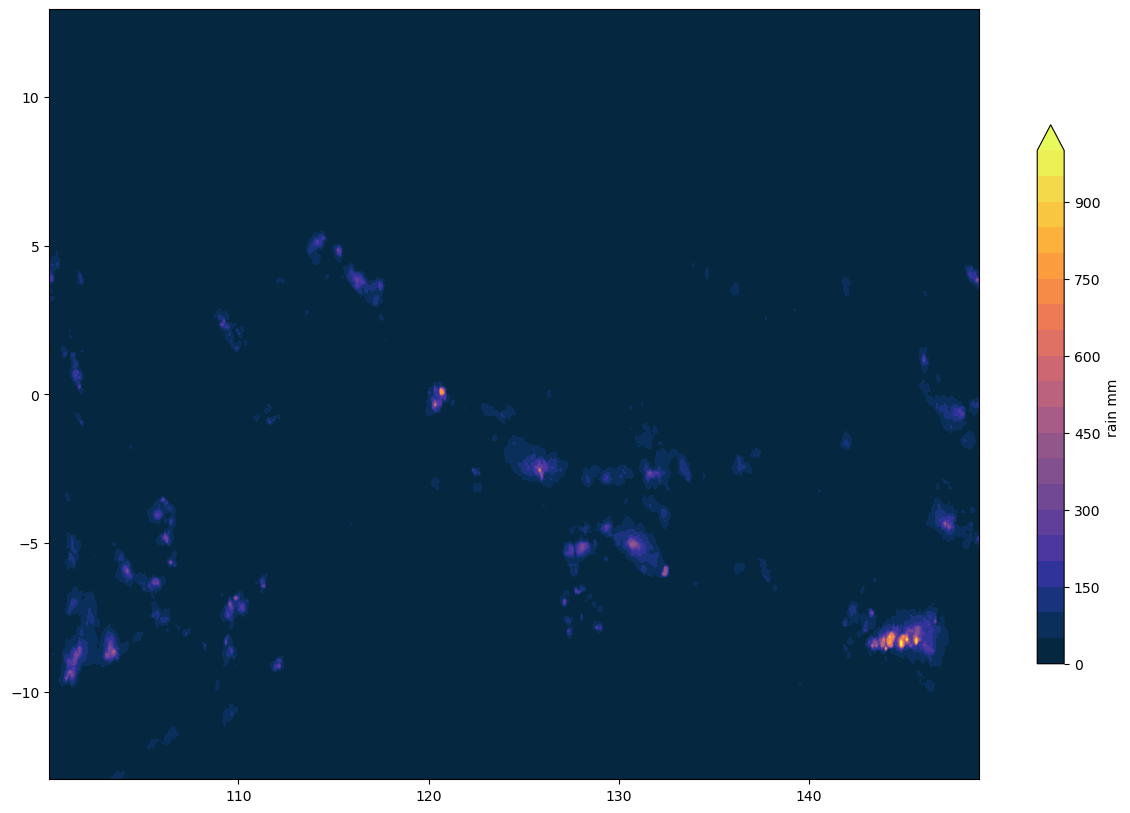

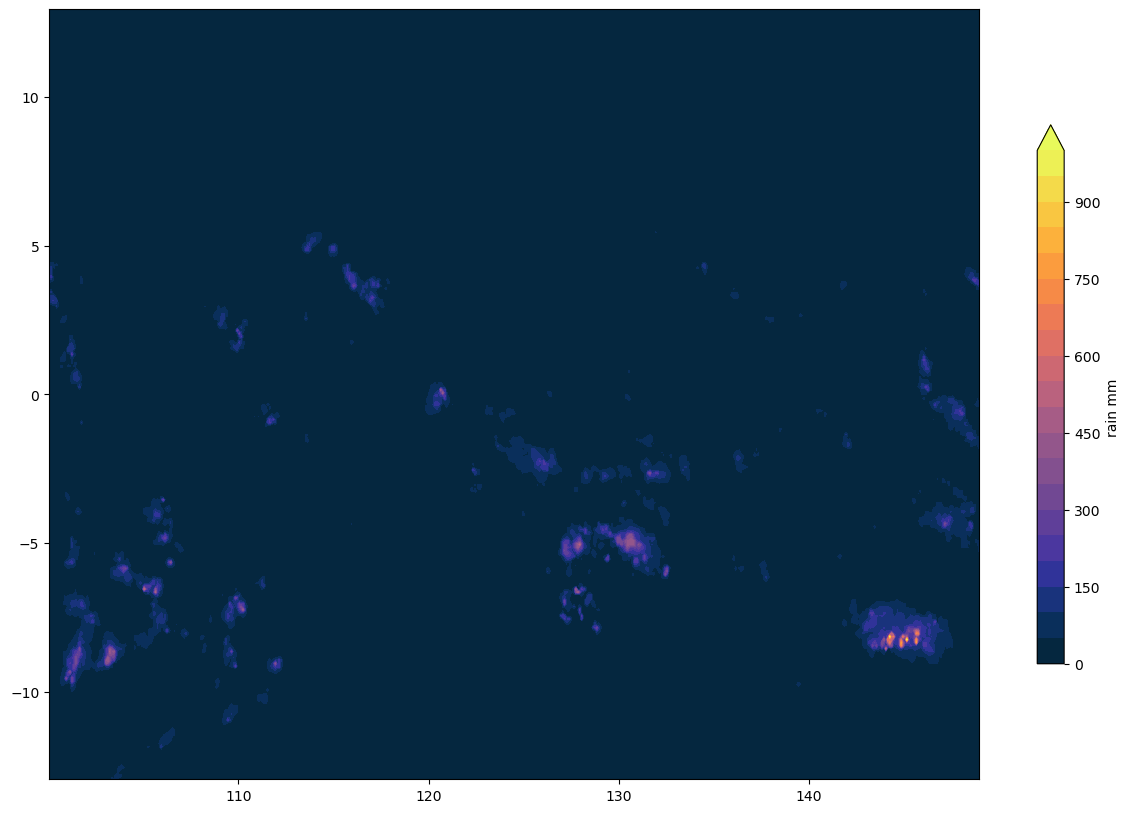

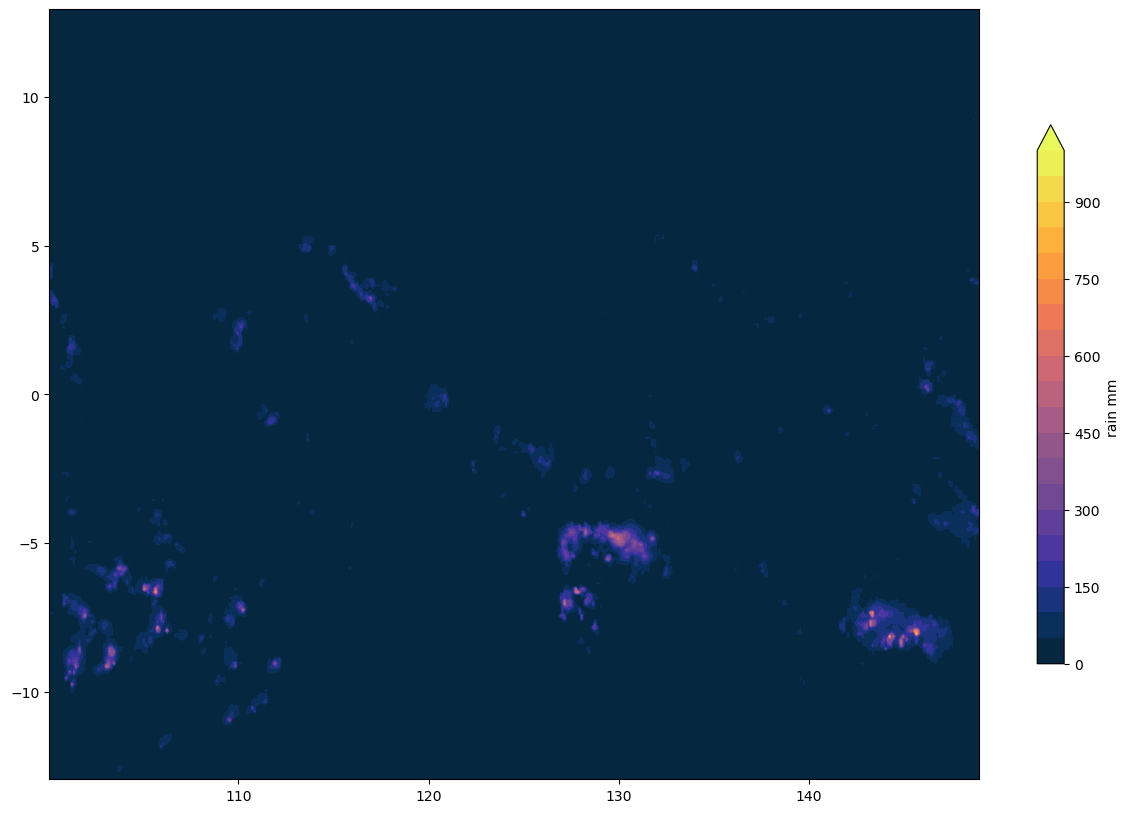

In [8]:
for ii in range(0,24):
    fig,ax=plt.subplots(1,1,figsize=(15,10))
# range
    vmn = 0
    vmx = 1000
    interval = 50   
    tcks = np.arange(vmn,vmx+interval,interval)
    lvl =  np.arange(vmn,vmx+interval,interval)
    colormap = cmo.thermal
    da_fin=ds['var']
    cp = ax.contourf(y,x,da_fin[ii,:,:],cmap=colormap,levels=lvl,vmin=vmn,vmax=vmx,extend='max')
#    cp = ax.contourf(y,x,da_fin[ii,:,:],cmap=colormap)
    cbar = fig.colorbar(cp, label= 'rain mm', location='right', shrink=0.7)
    plt.savefig('/home/563/cc6171/imerge_'+str(ii+1)+'.png',transparent=None,format='png',bbox_inches='tight',pad_inches=0.1)
    plt.show()

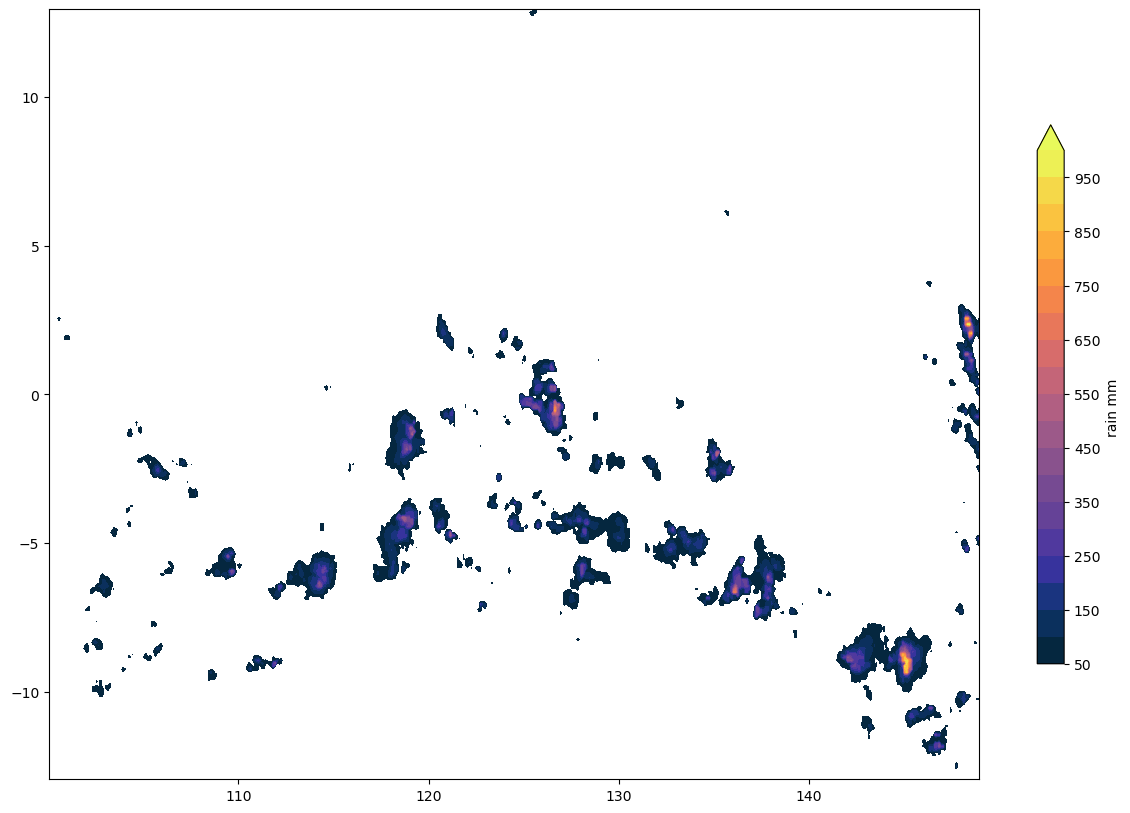

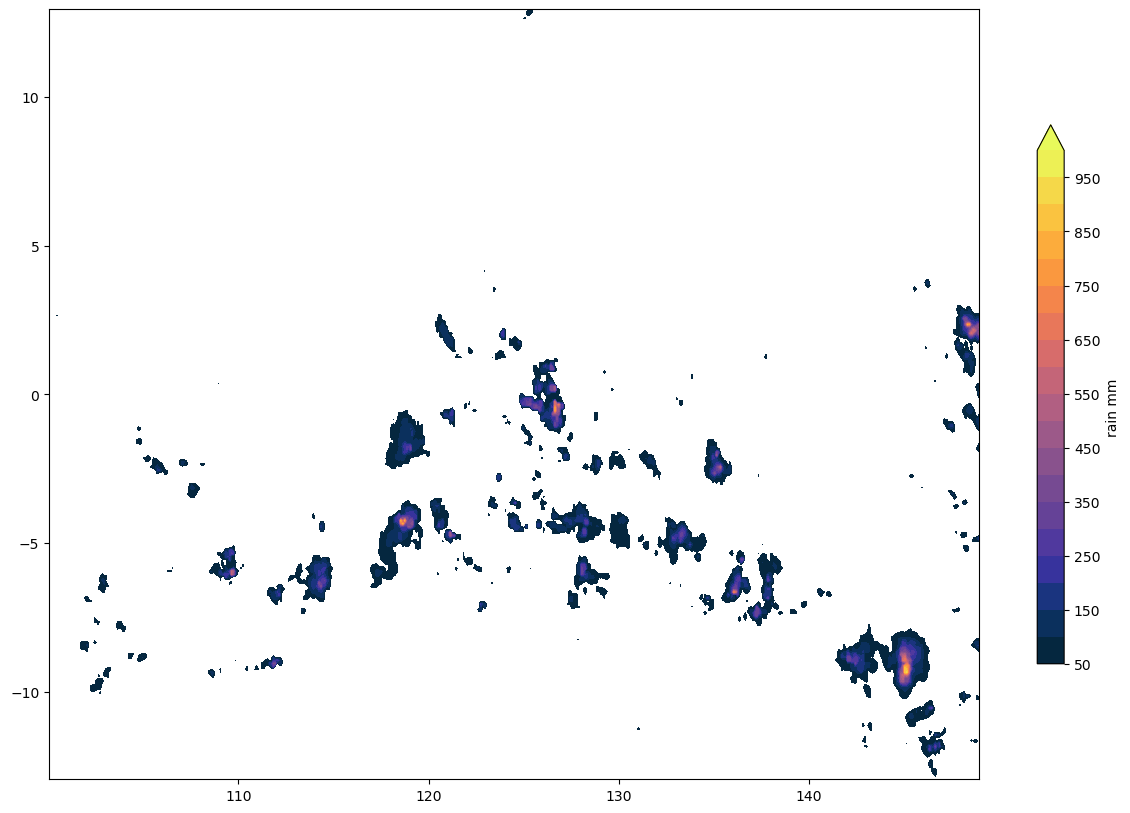

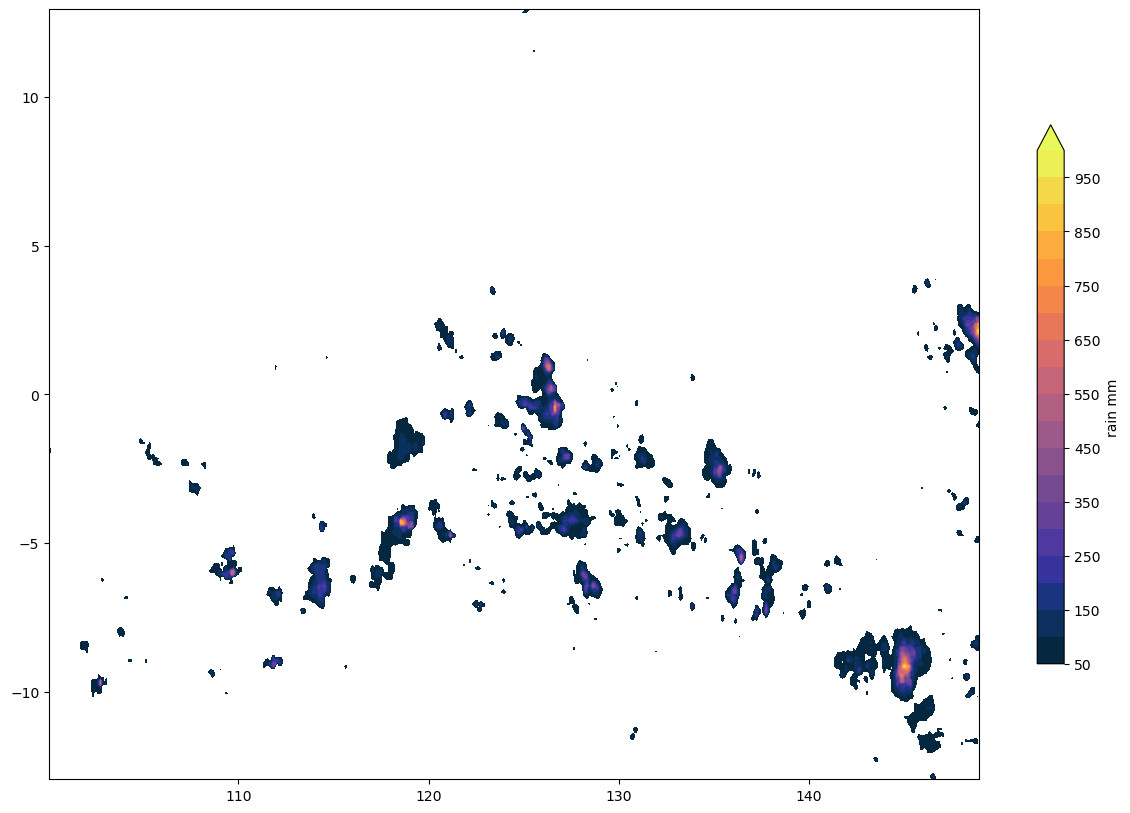

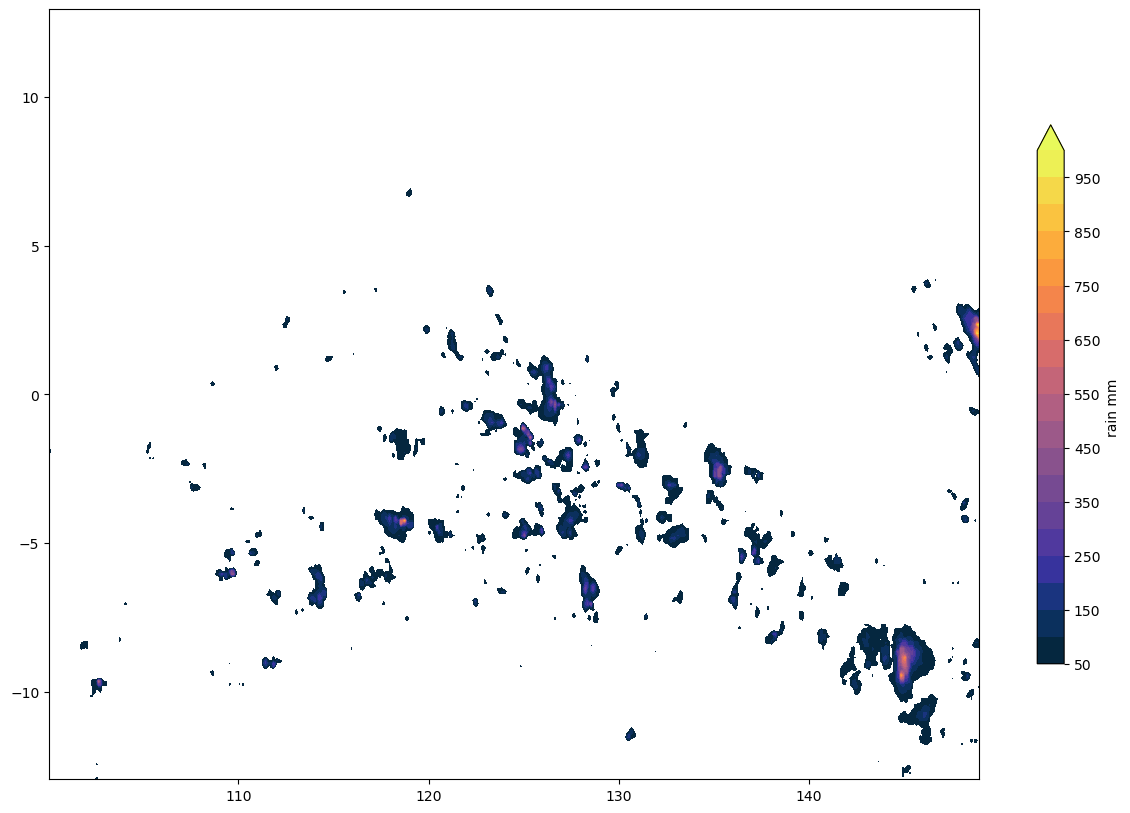

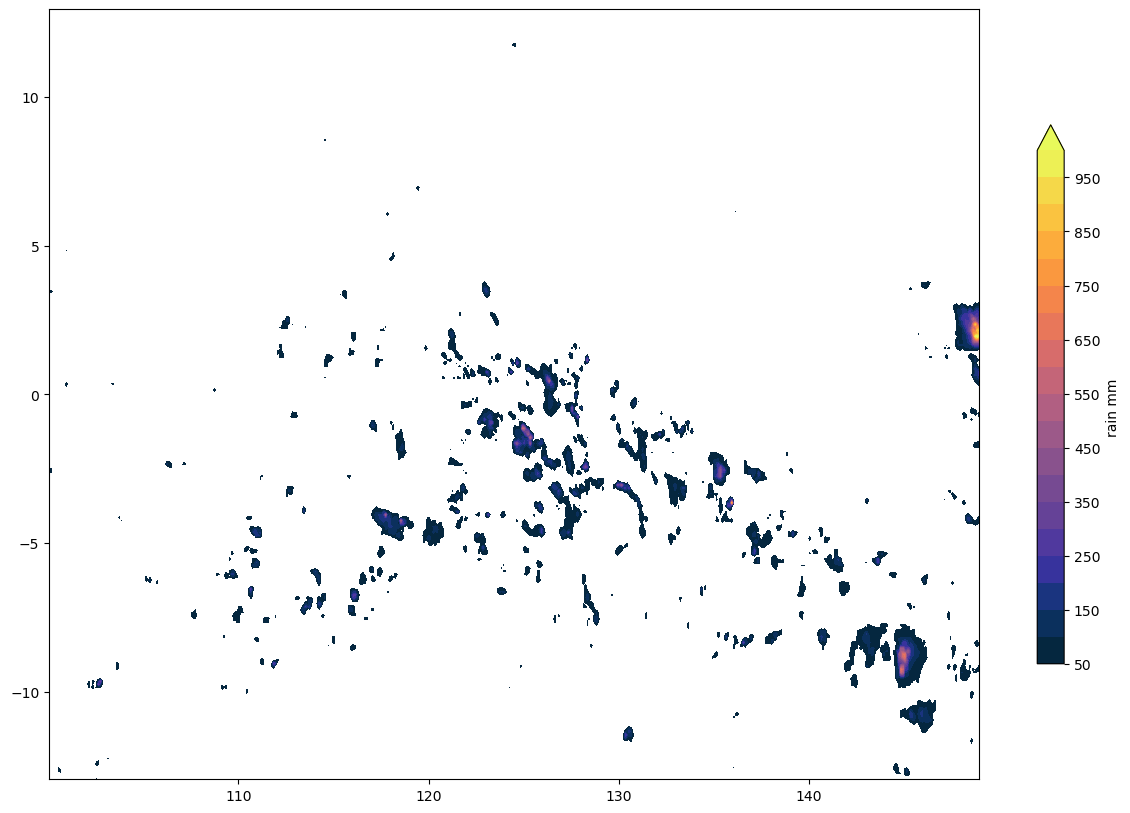

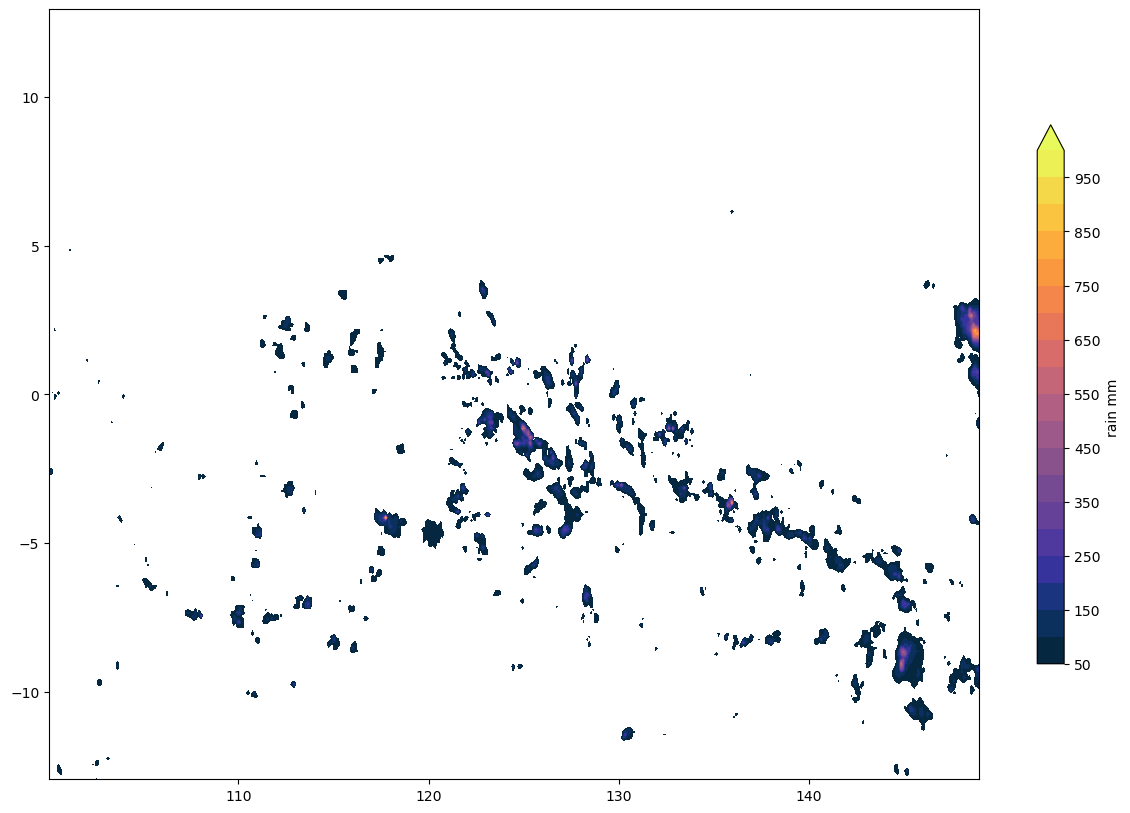

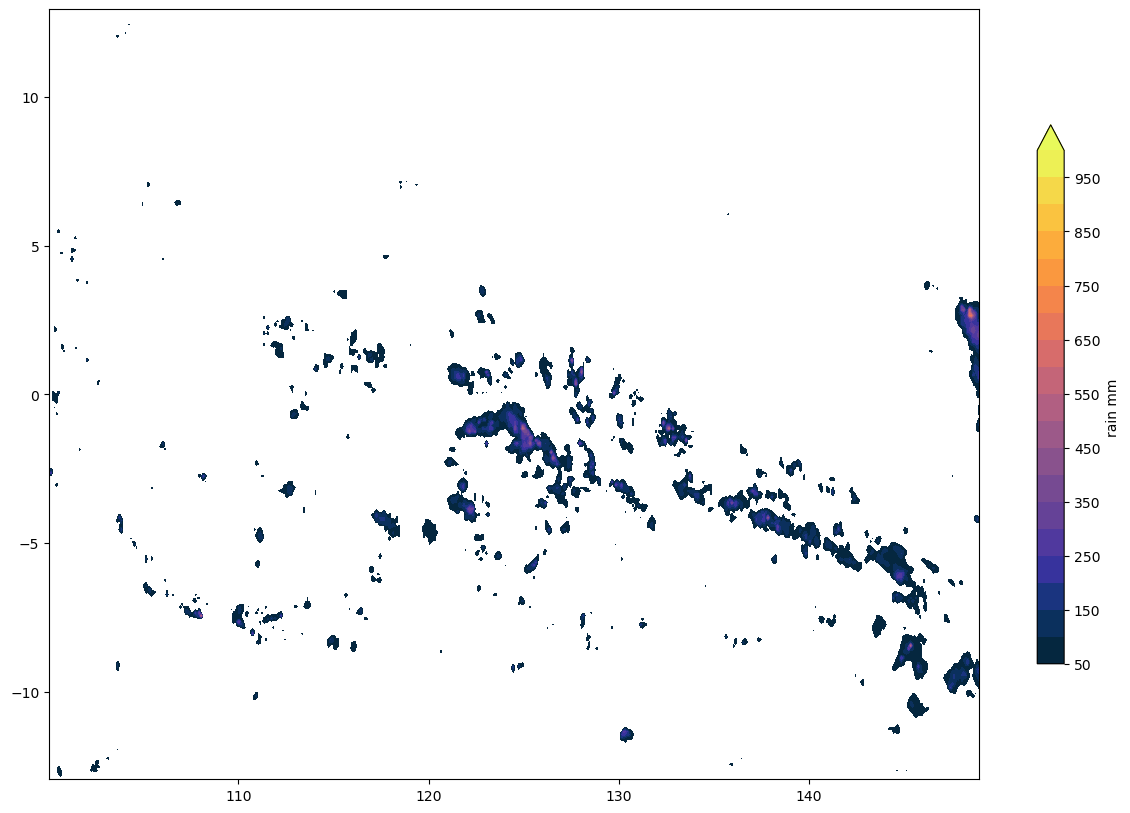

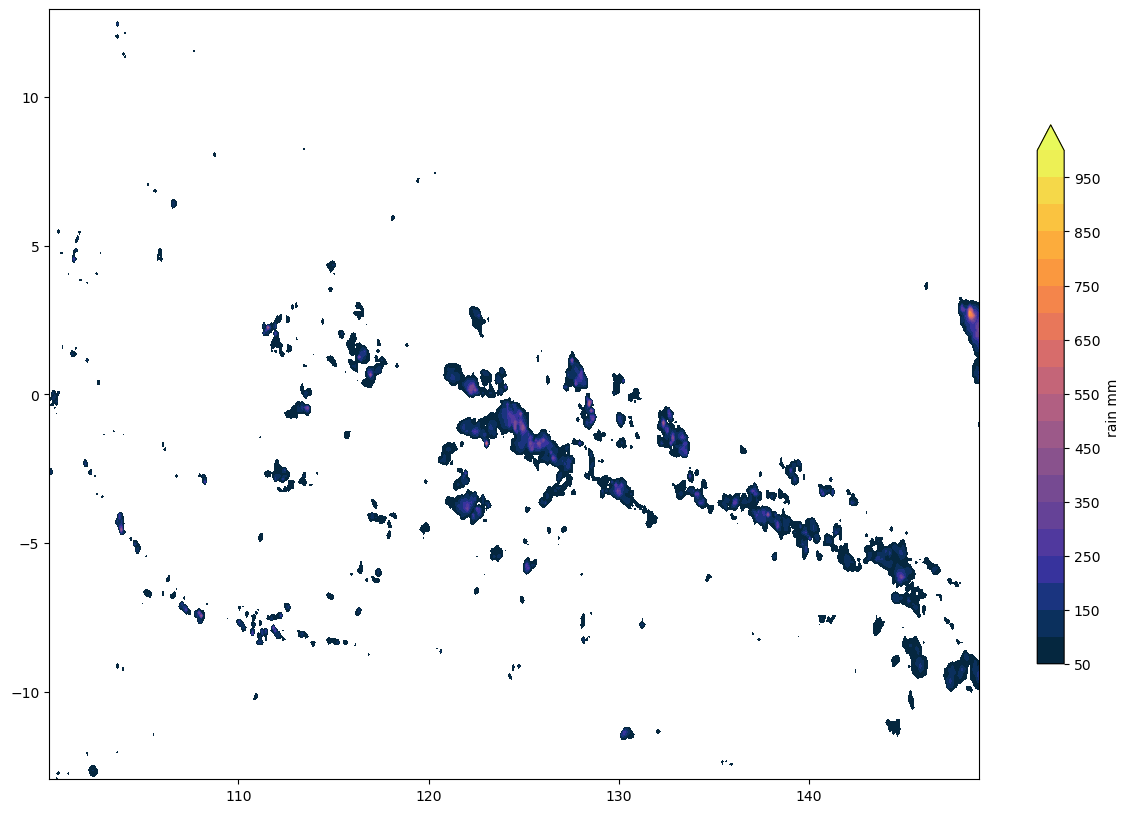

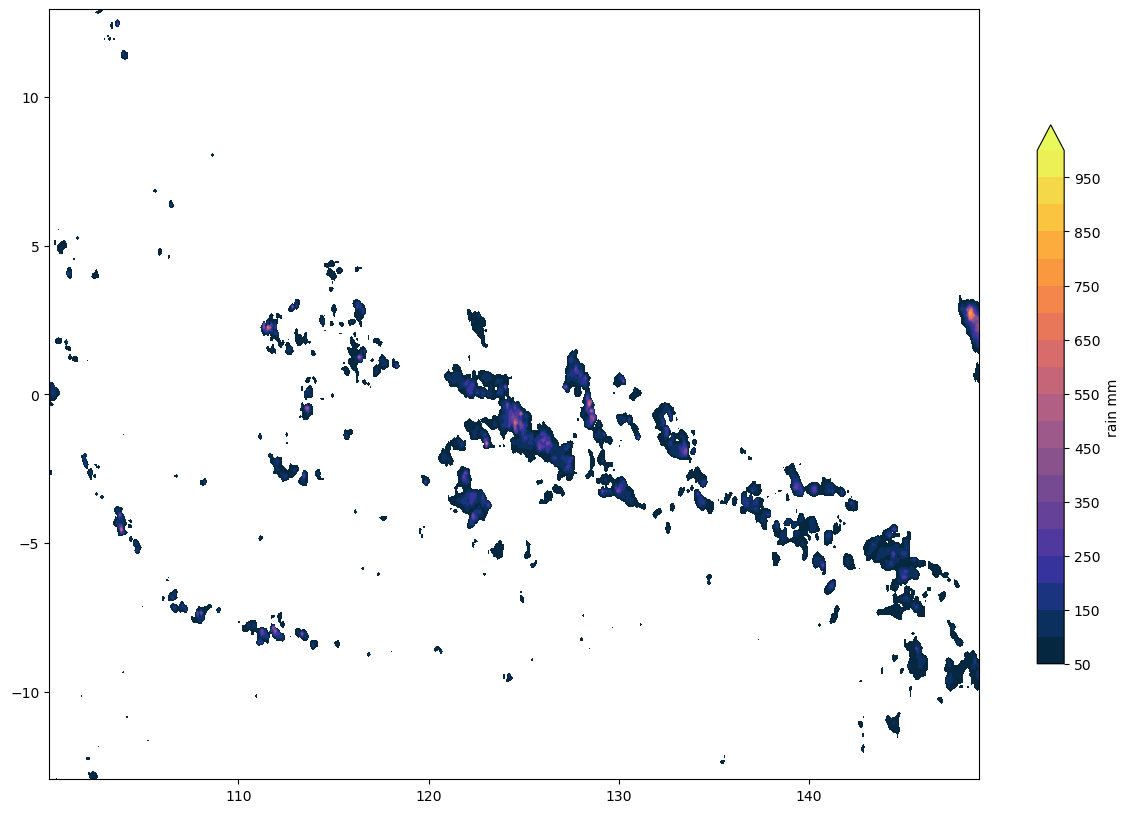

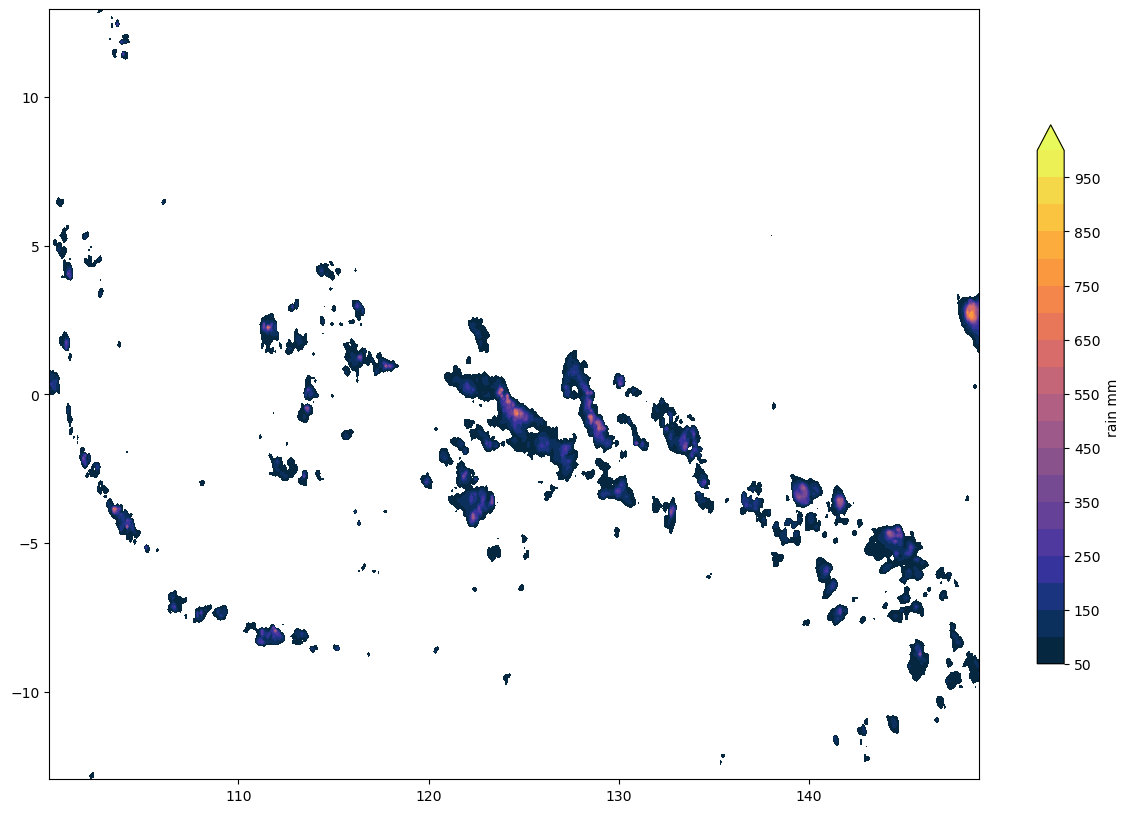

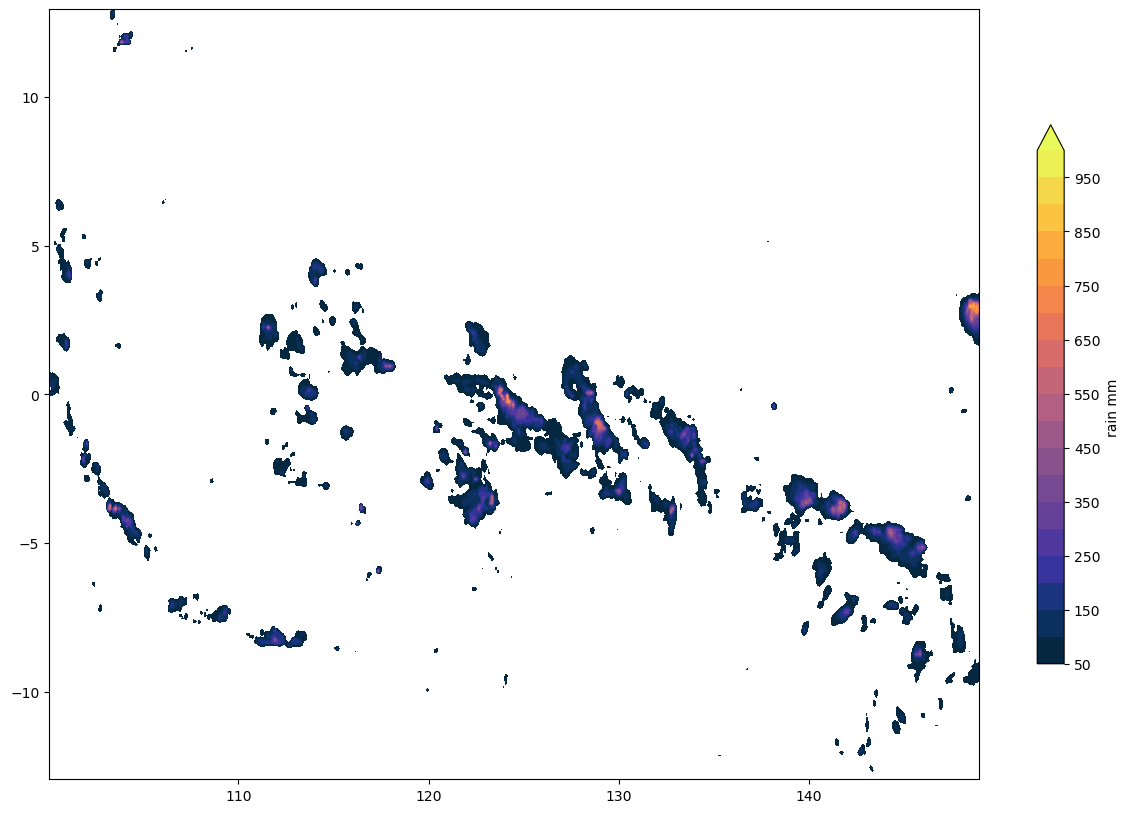

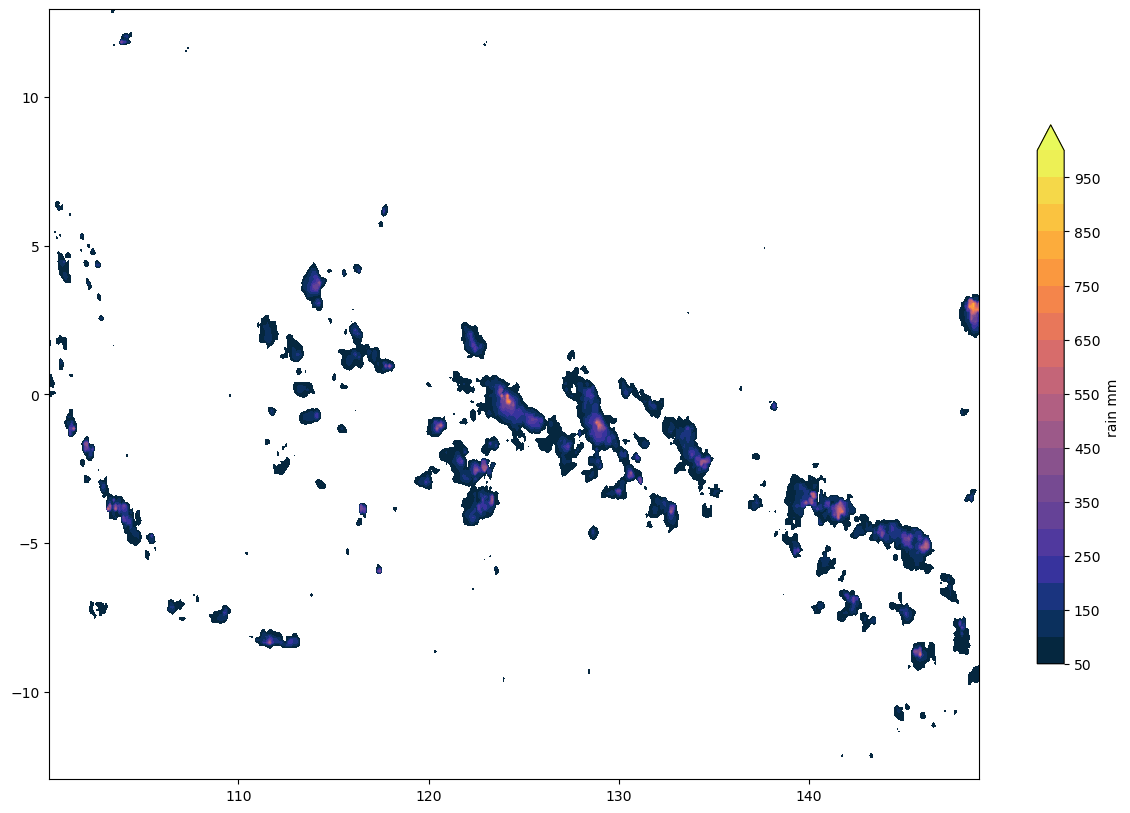

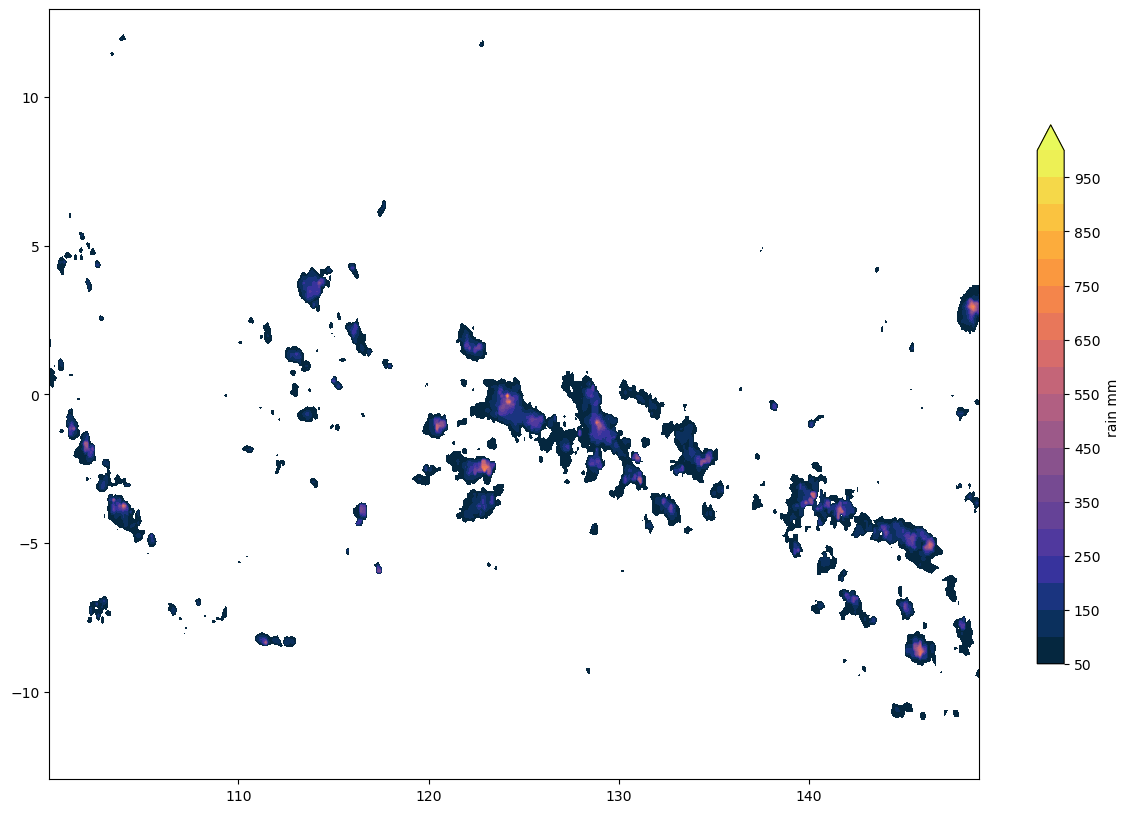

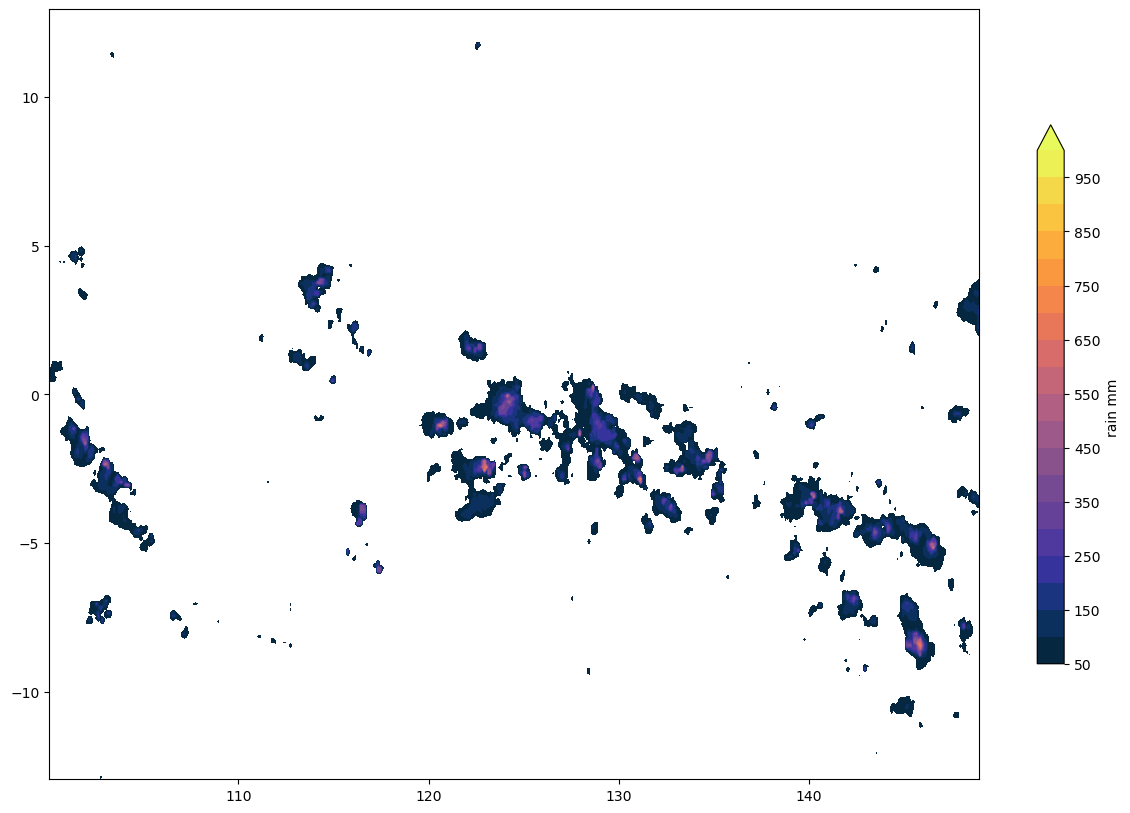

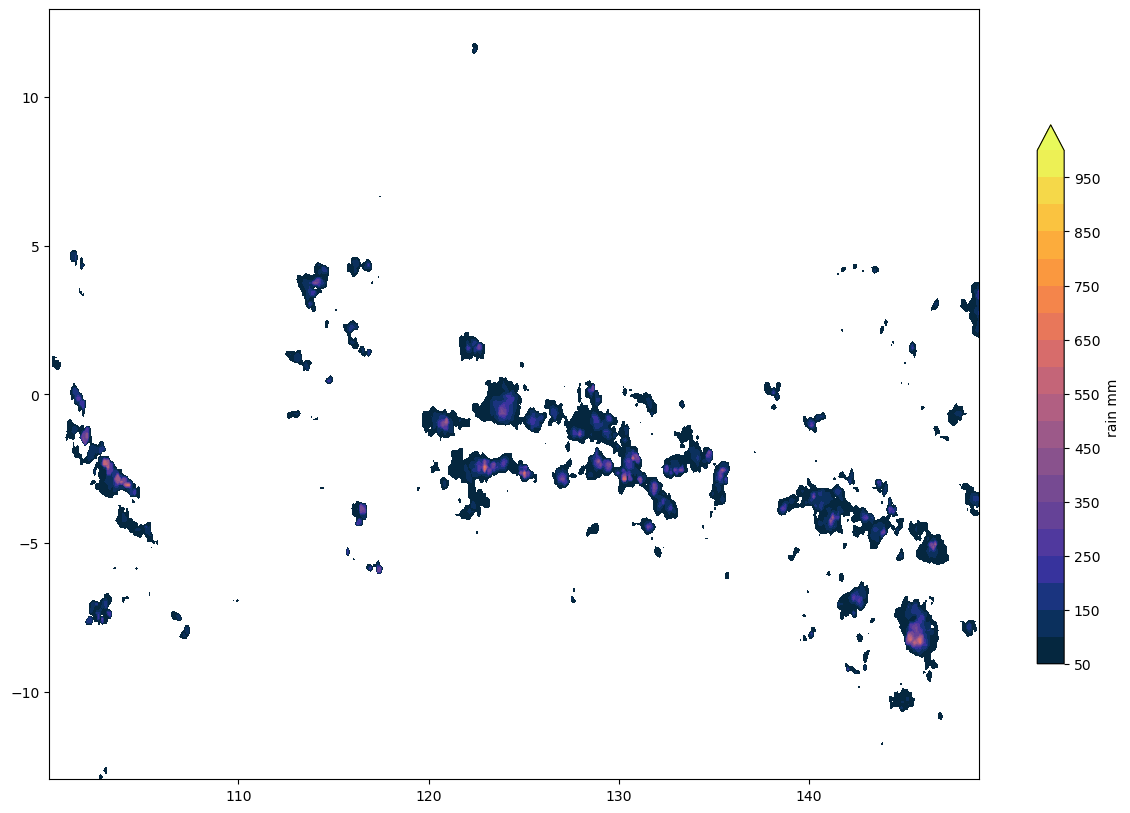

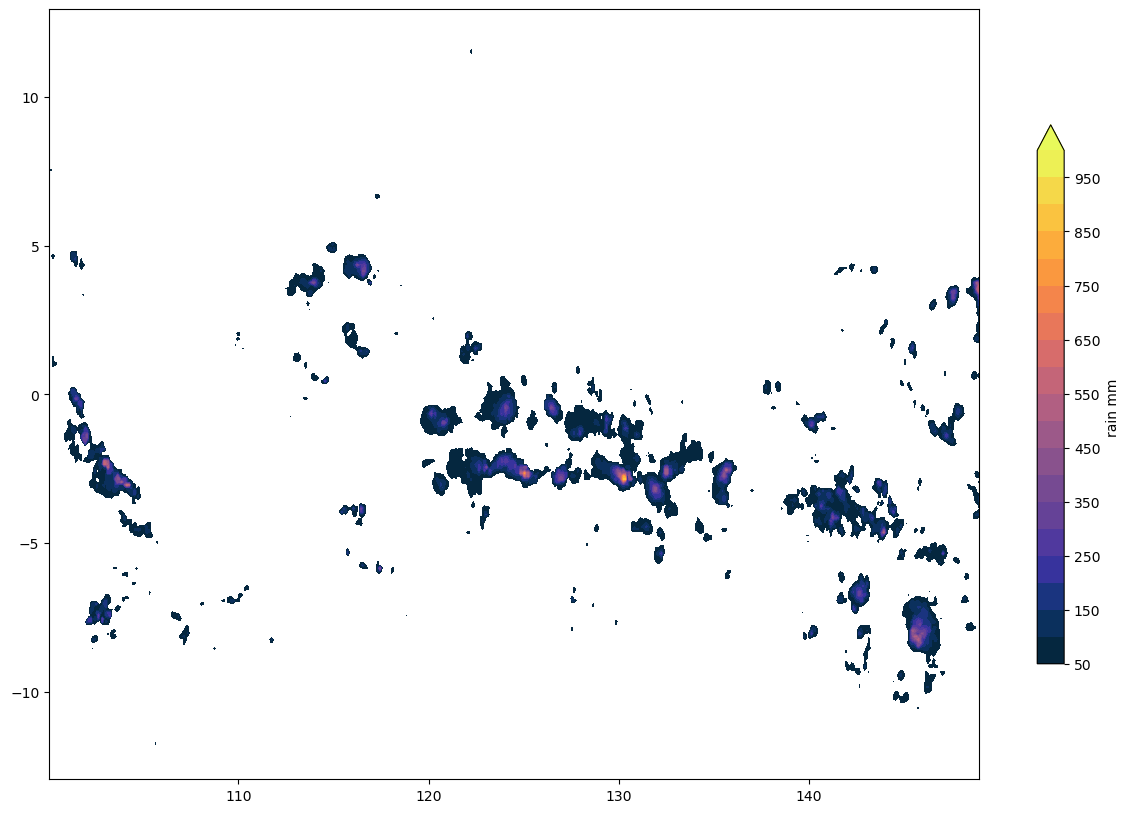

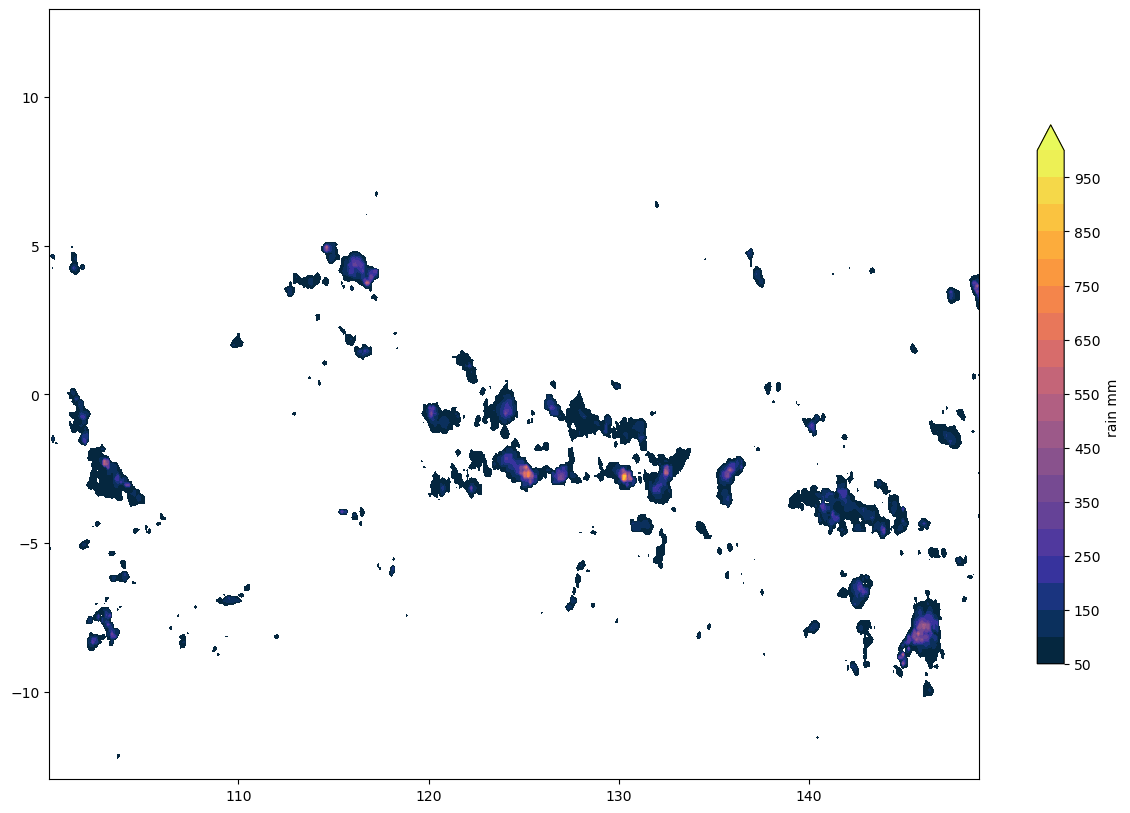

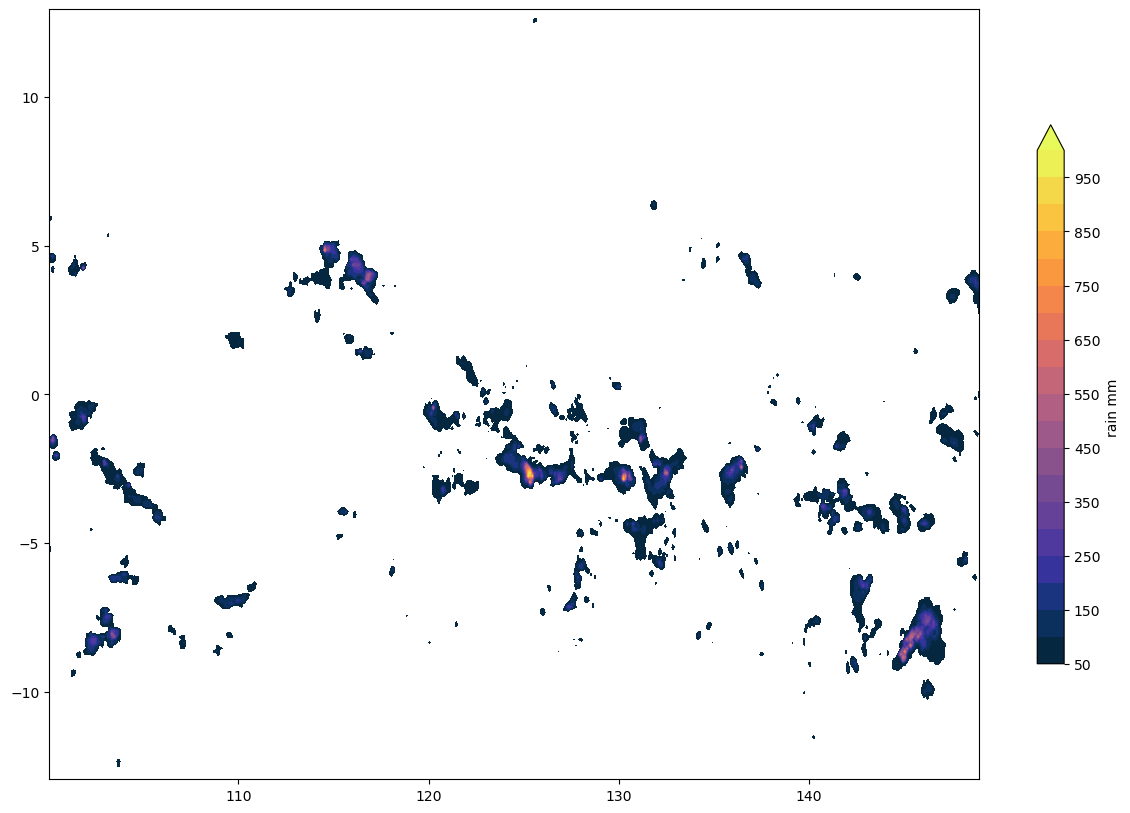

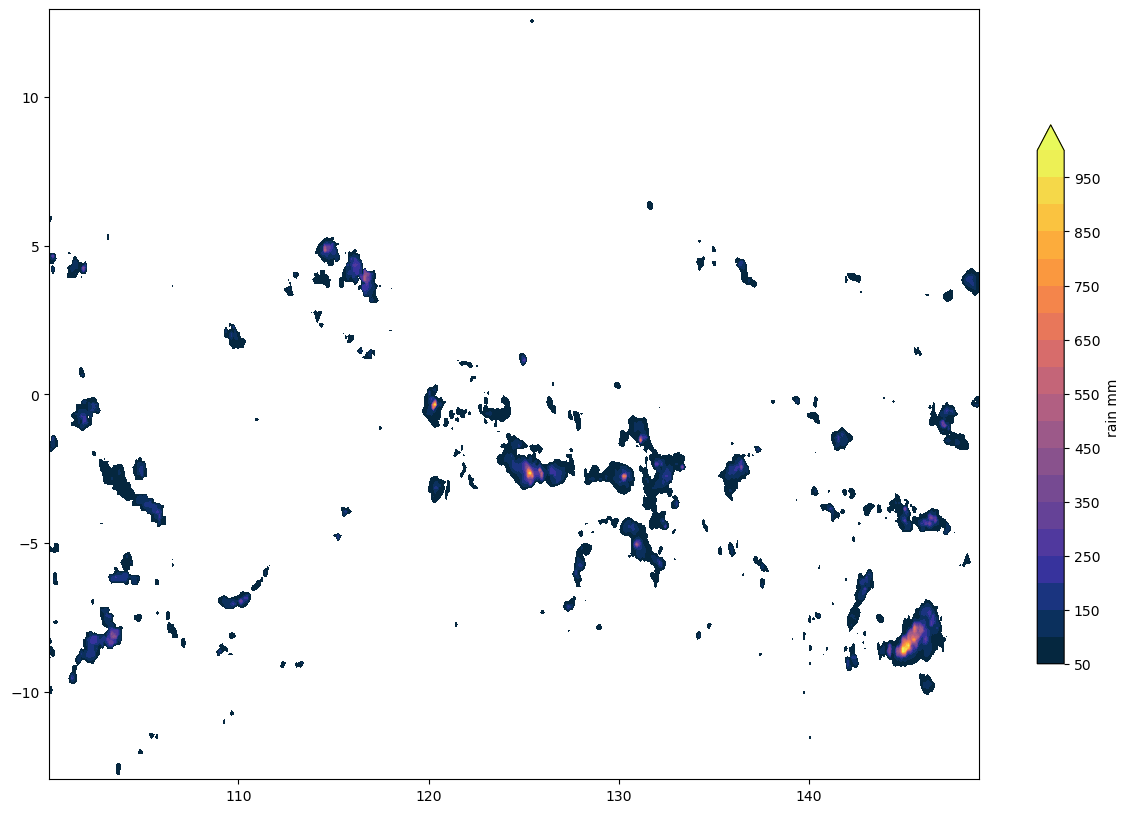

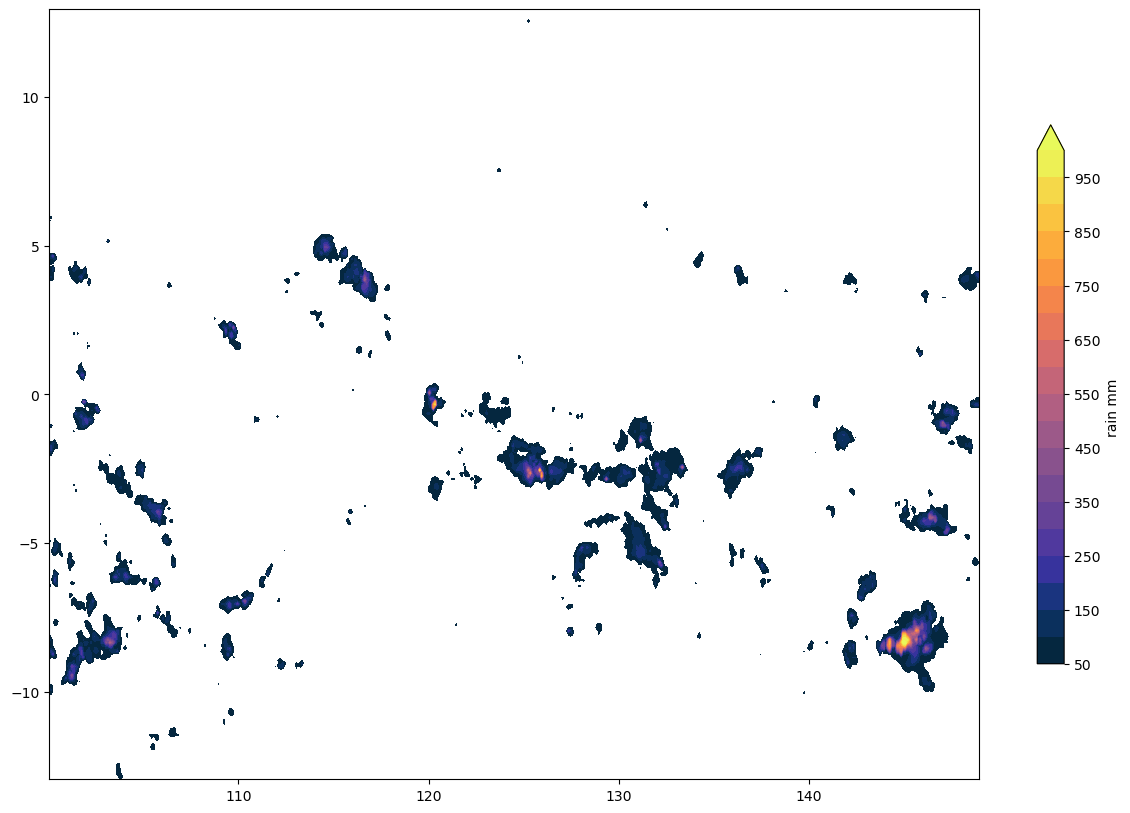

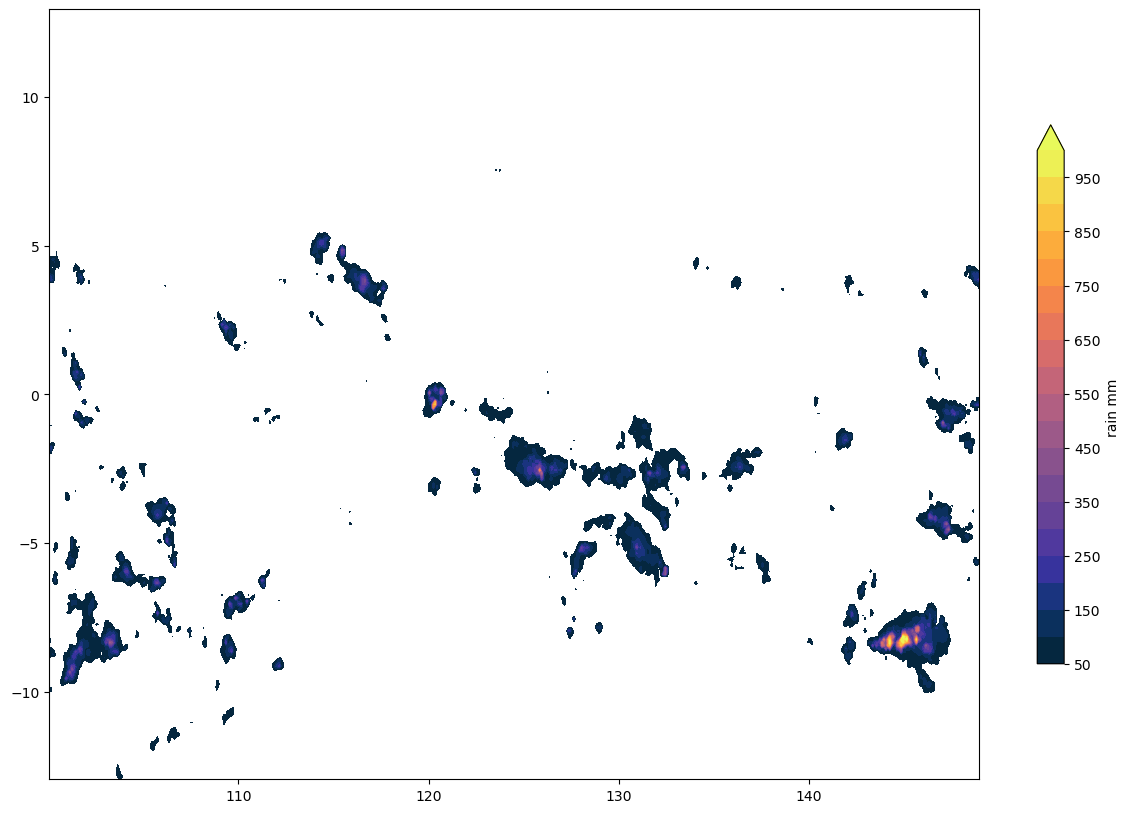

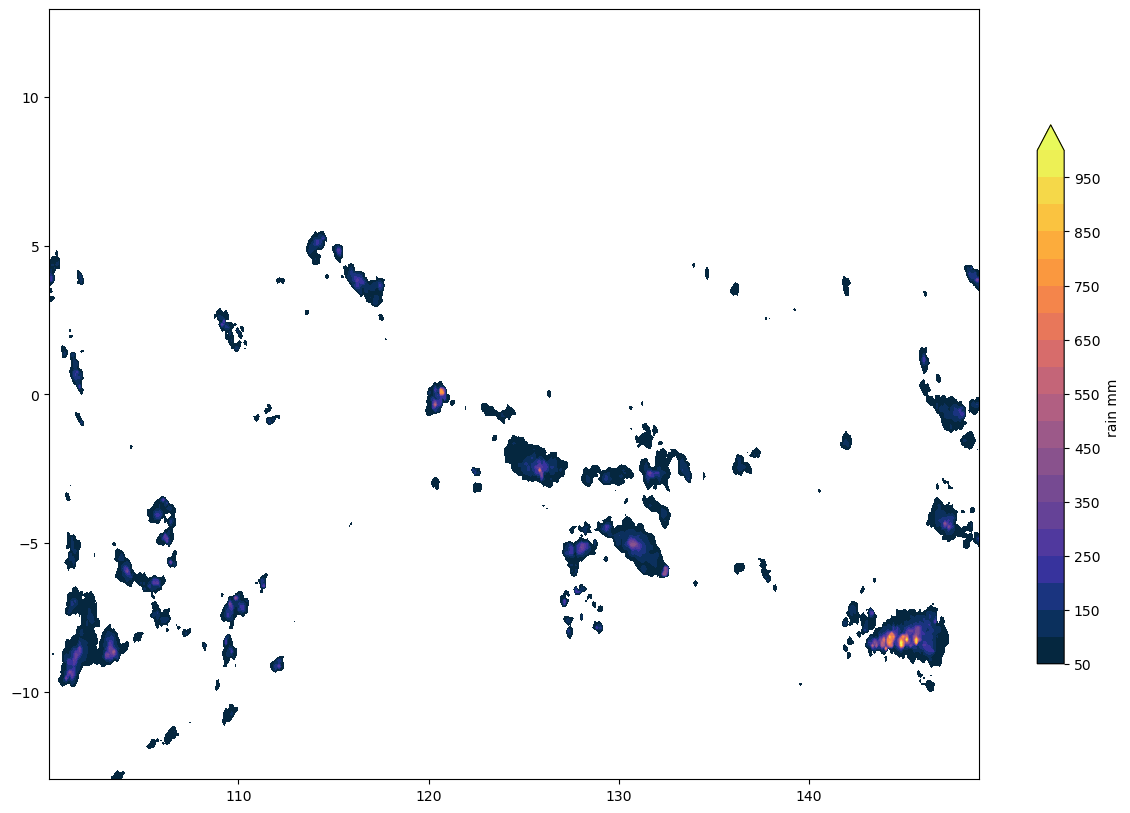

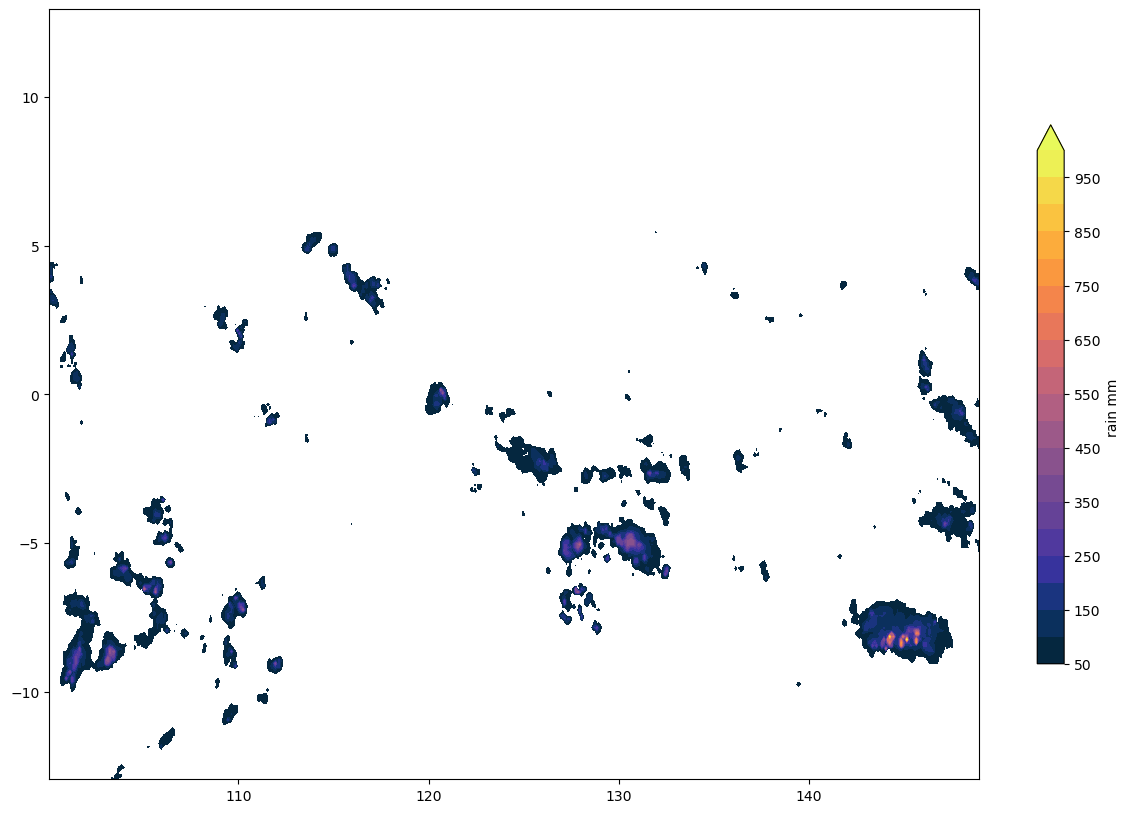

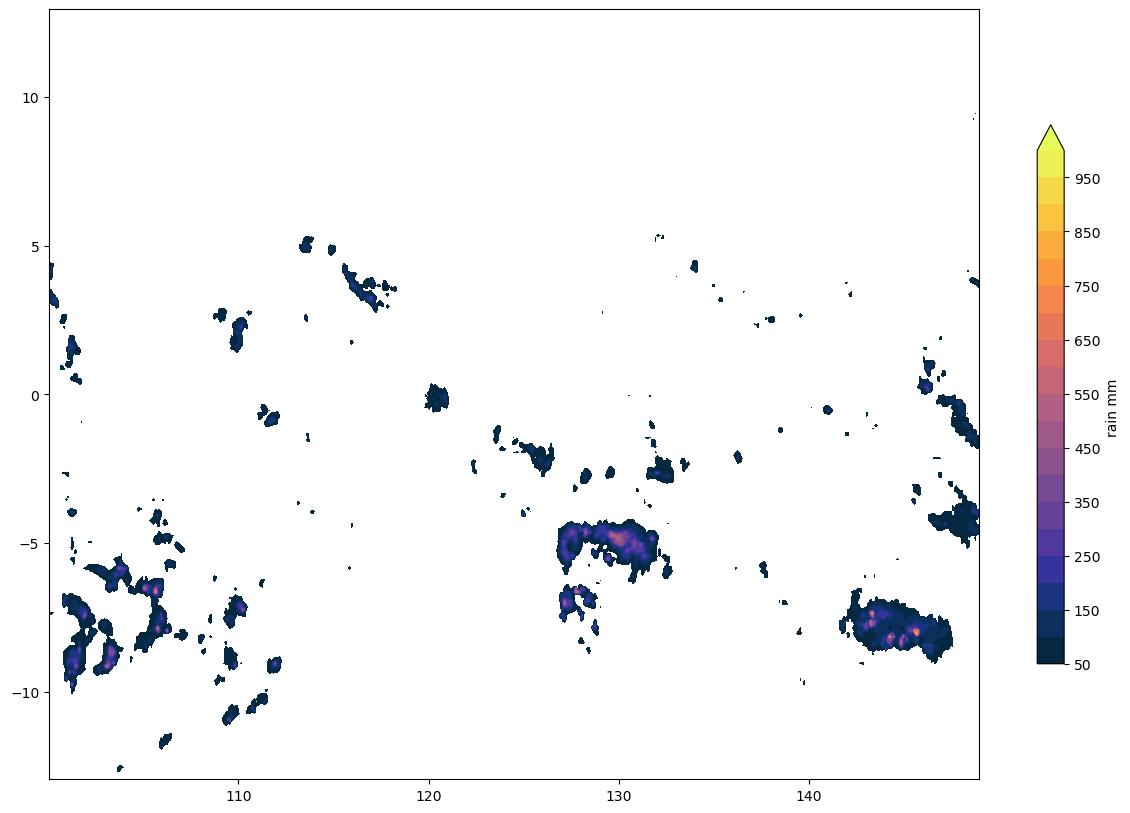

In [9]:

for ii in range(0,24):
    fig,ax=plt.subplots(1,1,figsize=(15,10))
# range
    vmn = 50
    vmx = 1000
    interval = 50   
    tcks = np.arange(vmn,vmx+interval,interval)
    lvl =  np.arange(vmn,vmx+interval,interval)
    colormap = cmo.thermal
    da_fin=ds['var']
    cp = ax.contourf(y,x,da_fin[ii,:,:],cmap=colormap,levels=lvl,vmin=vmn,vmax=vmx,extend='max')
#    cp = ax.contourf(y,x,da_fin[ii,:,:],cmap=colormap)
    cbar = fig.colorbar(cp, label= 'rain mm', location='right', shrink=0.7)
    plt.savefig('/home/563/cc6171/imerge_'+str(ii+1)+'.png',transparent=None,format='png',bbox_inches='tight',pad_inches=0.1)
    plt.show()


In [10]:
# Set values below the threshold to zero
threshold = 200  # example threshold
var_masked = da_fin.where(da_fin >= threshold, 0)

# Optional: Save to a new file
#ds['var'] = var_masked

# Set to 1 above 50 mm

threshold = 50  # example threshold
var_masked2 = var_masked.where(var_masked <= threshold, 1)

# Optional: Save to a new file
ds['var'] = var_masked2

ds.to_netcdf('masked_output.nc')

In [11]:
from matplotlib import colormaps
#list(colormaps)

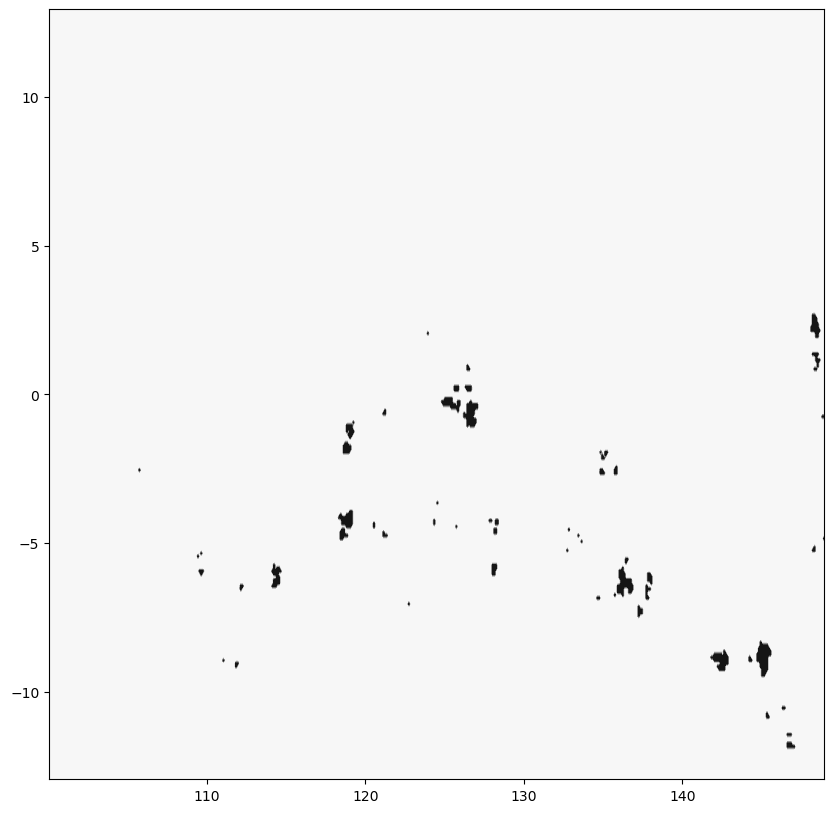

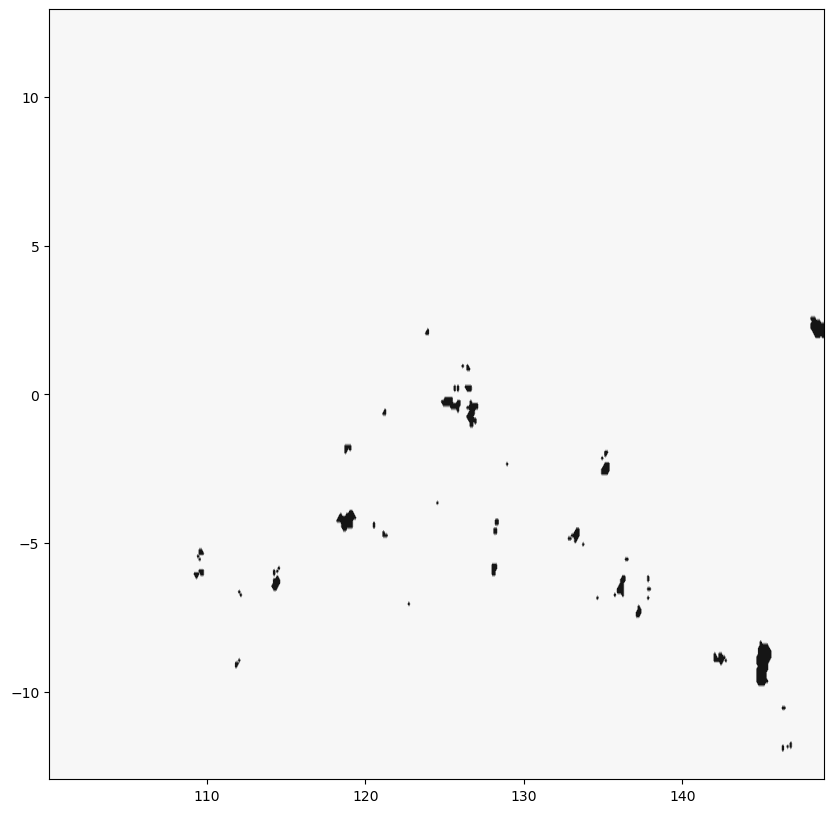

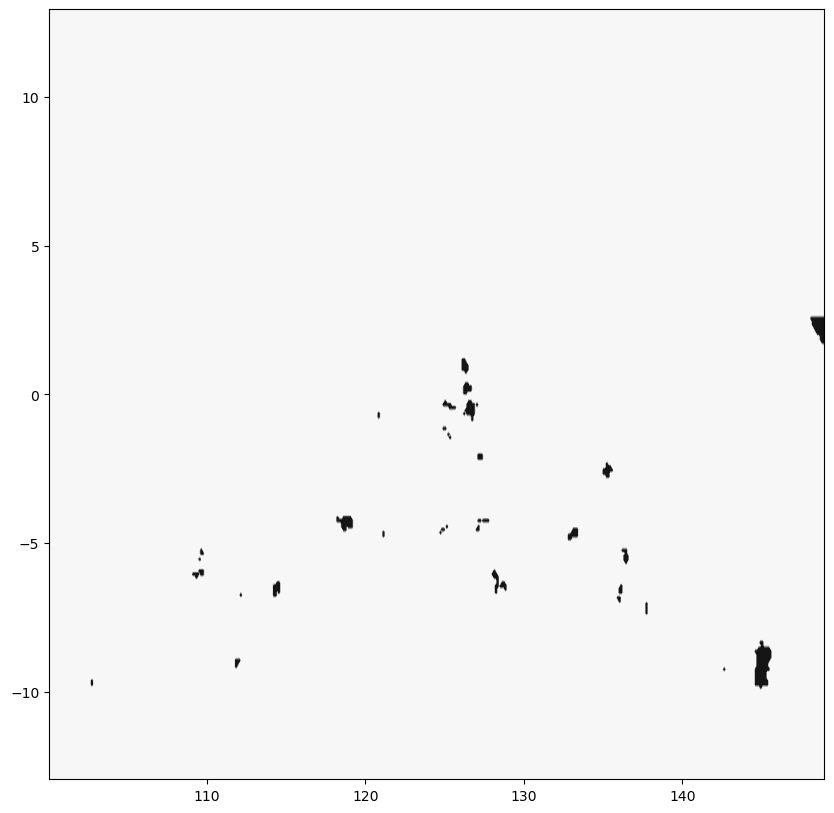

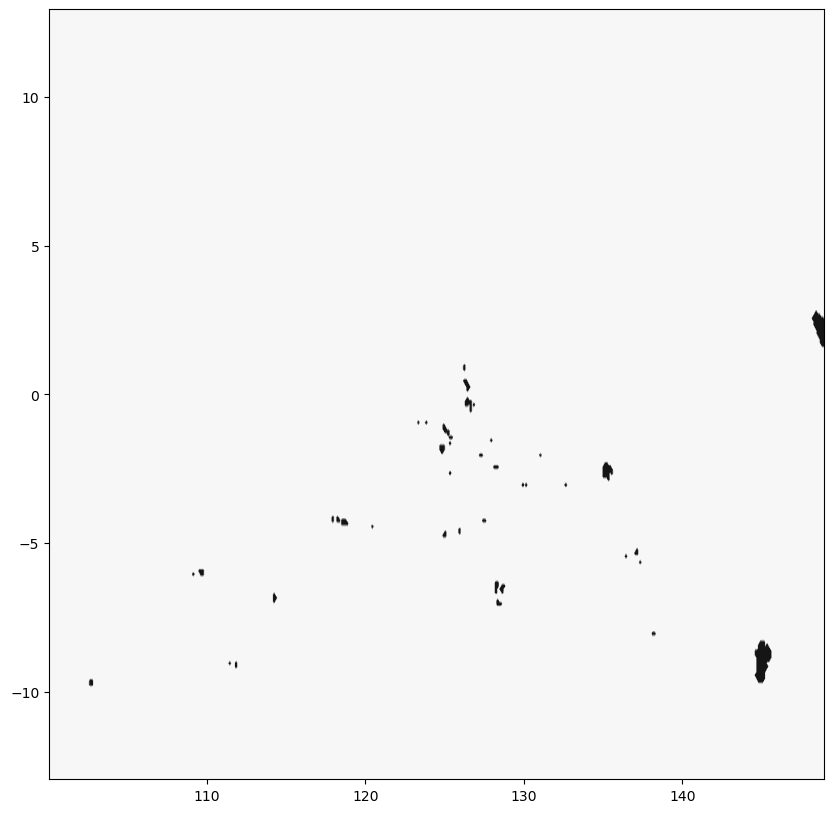

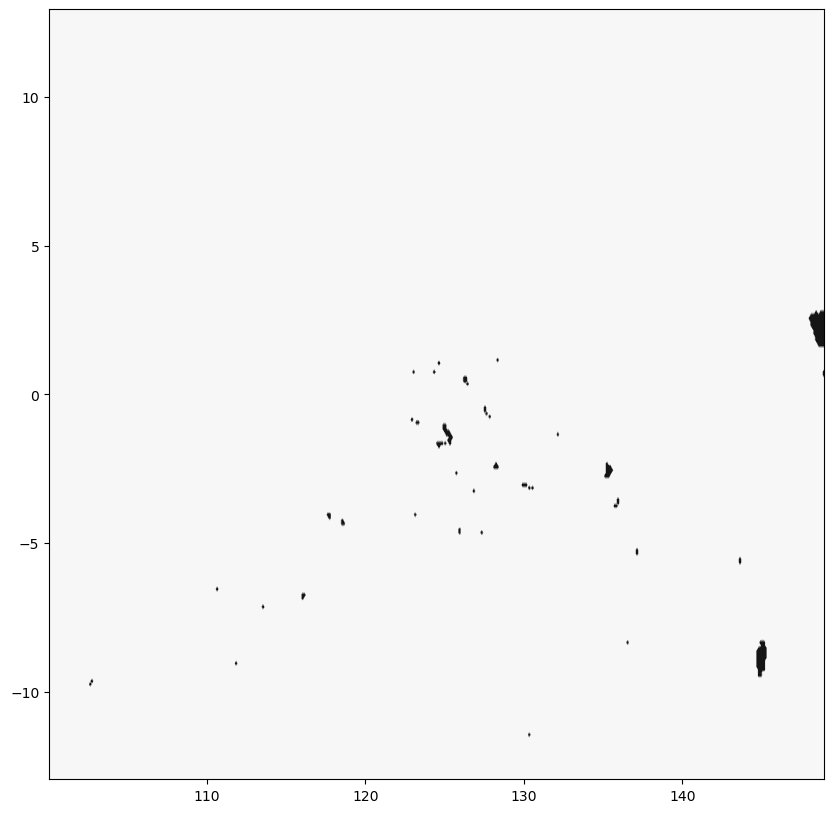

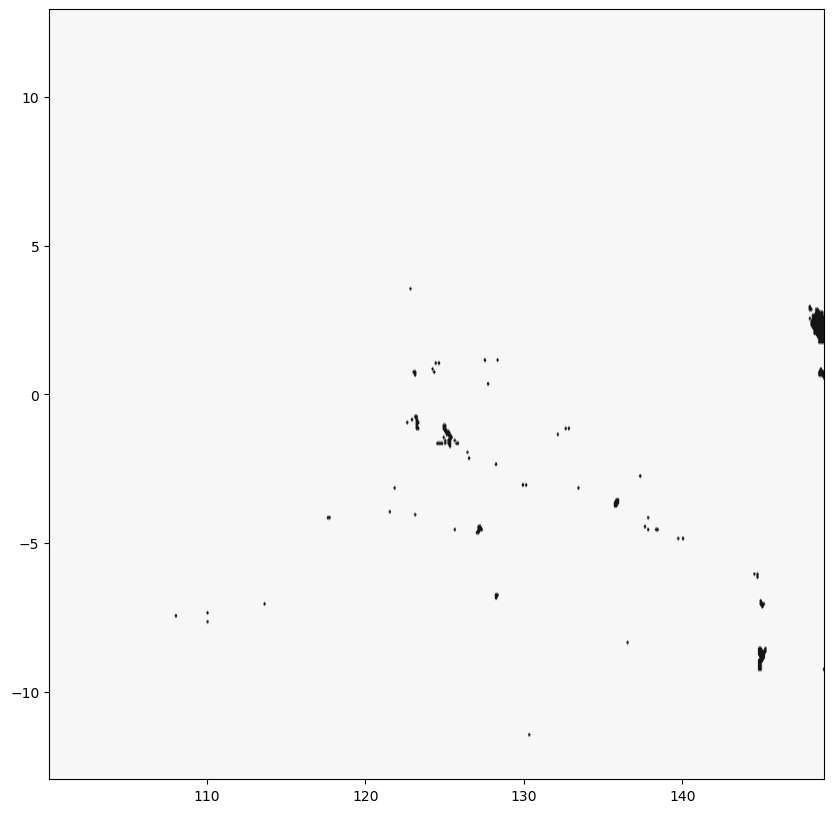

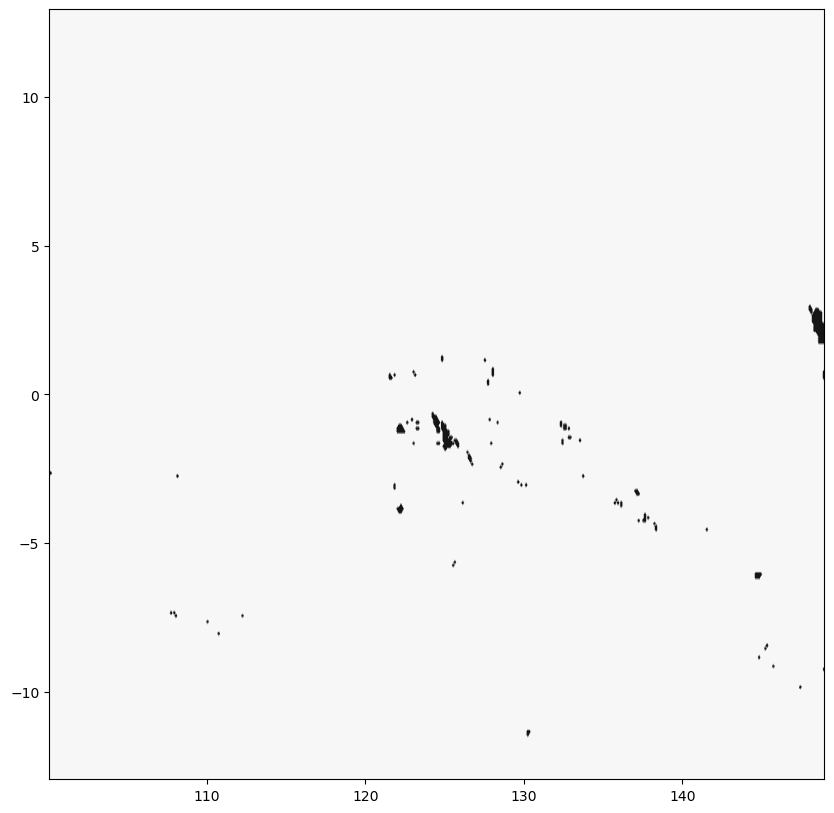

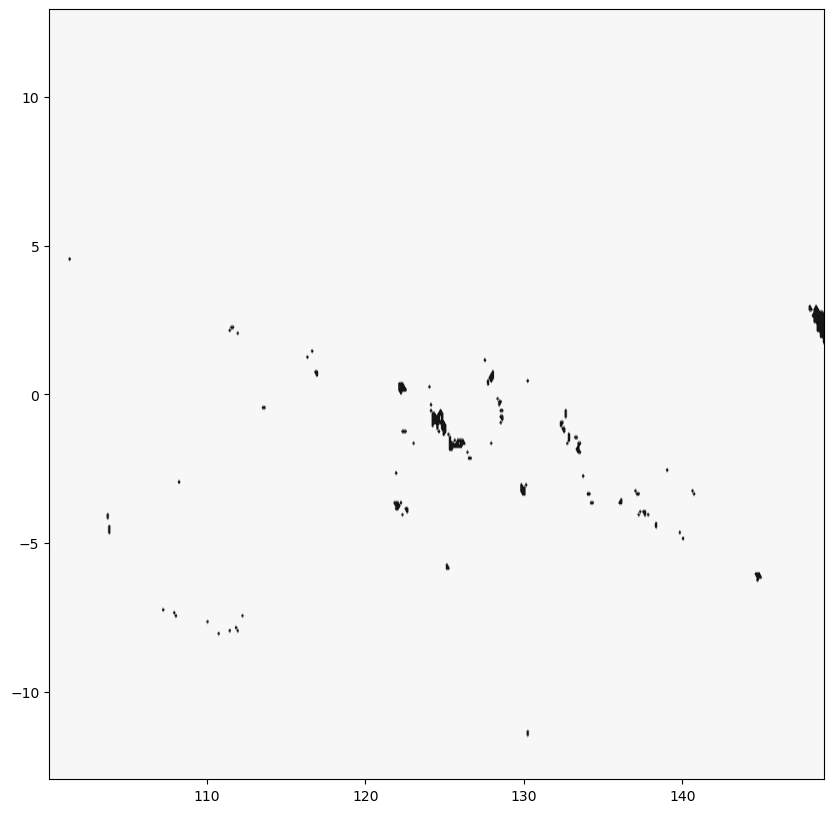

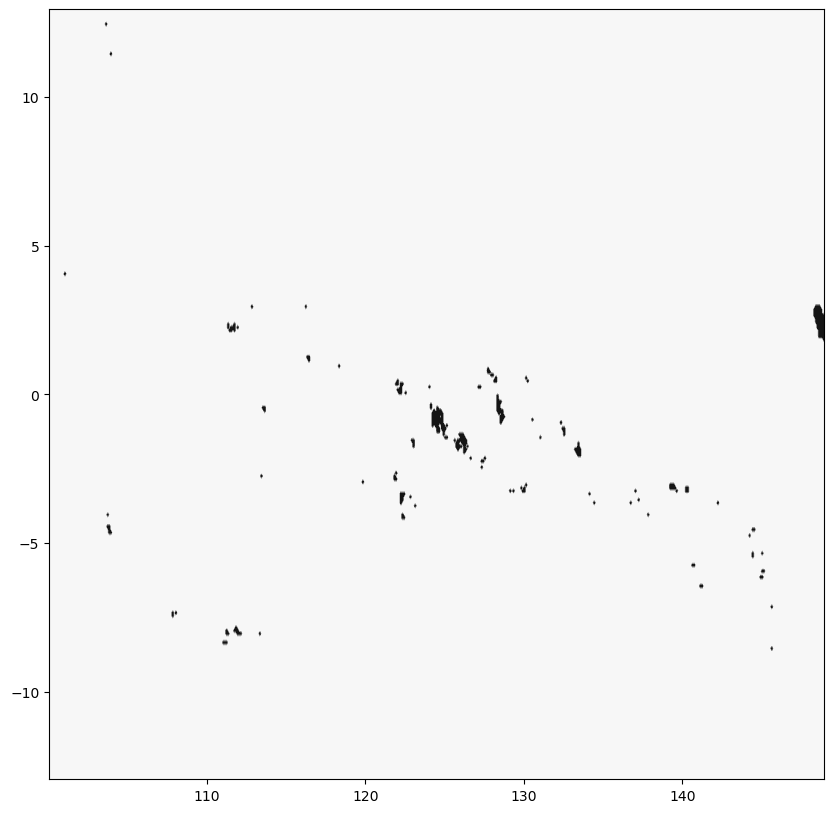

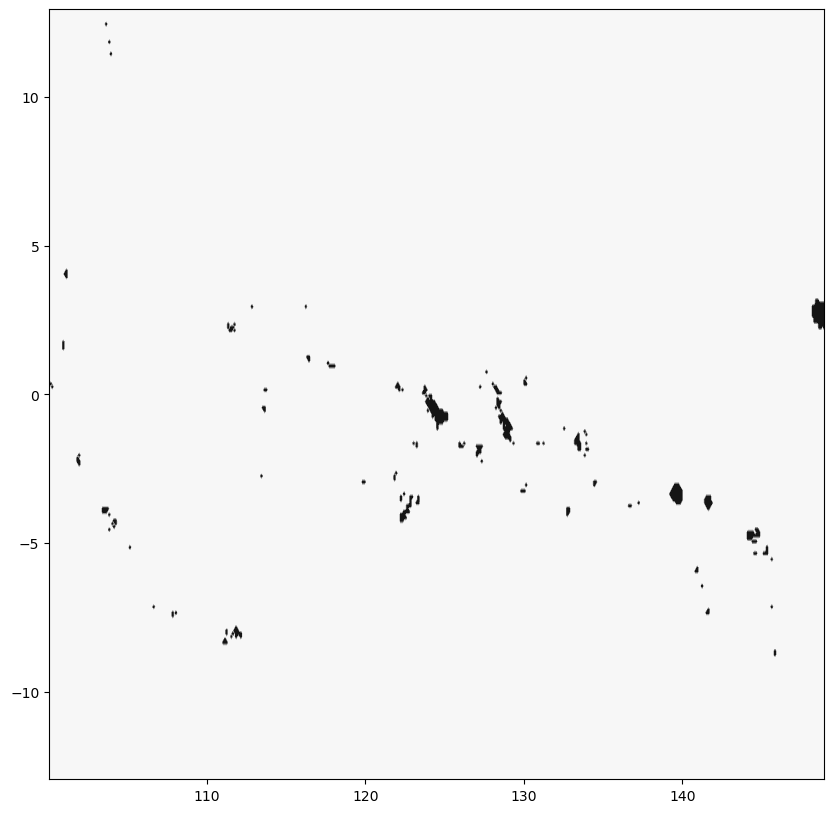

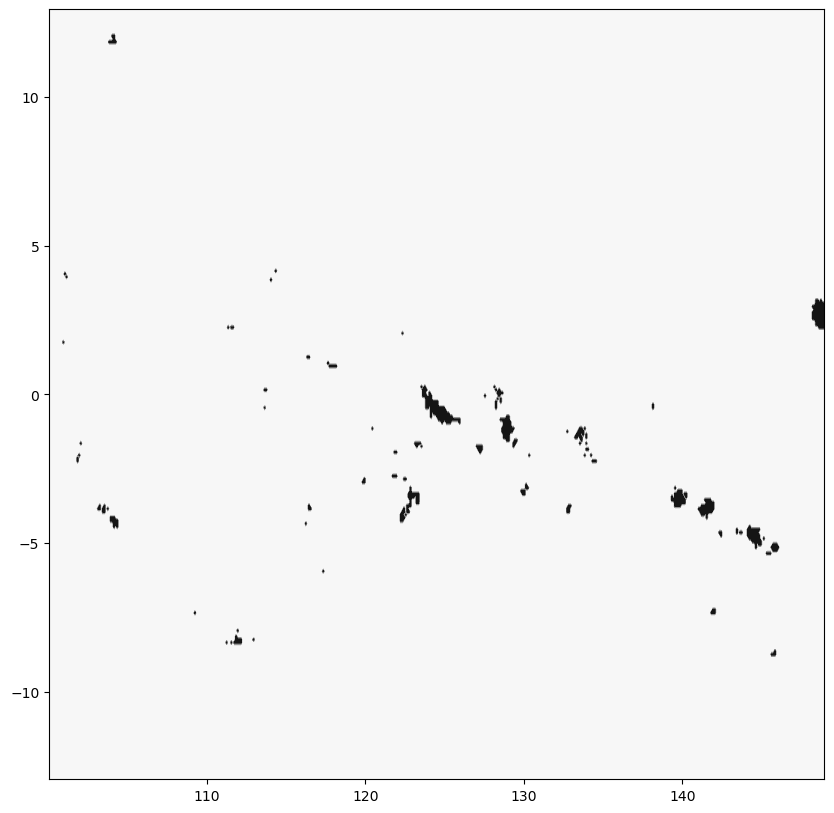

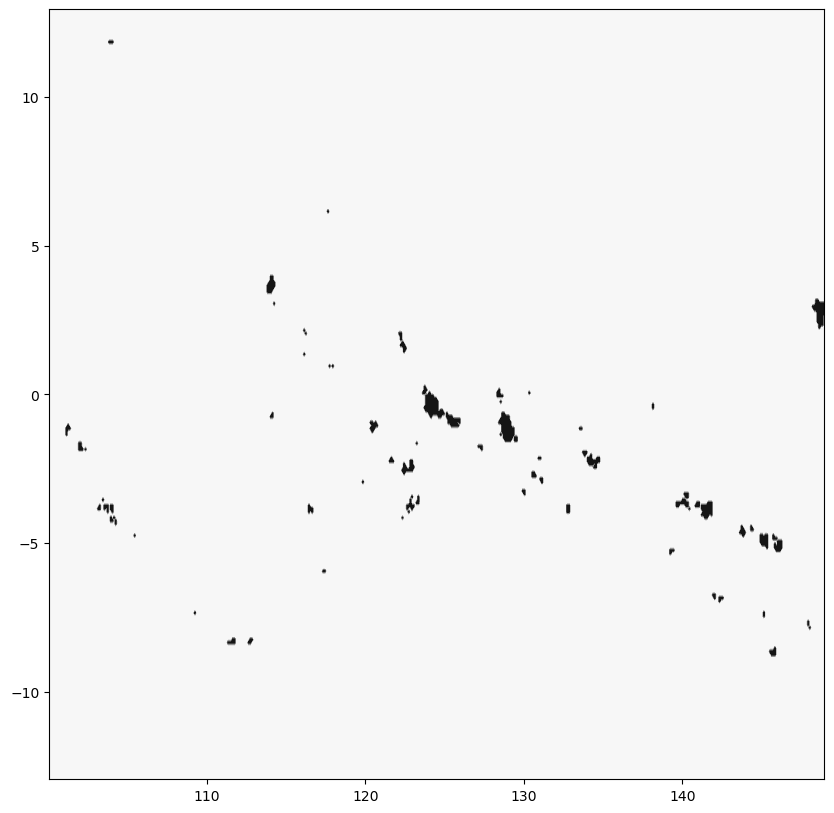

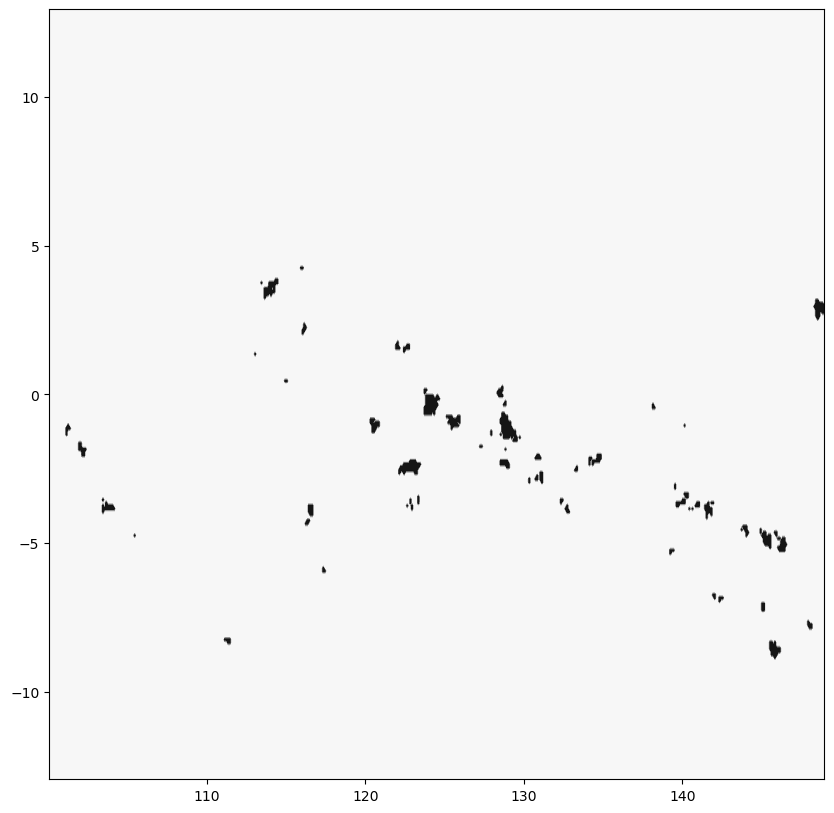

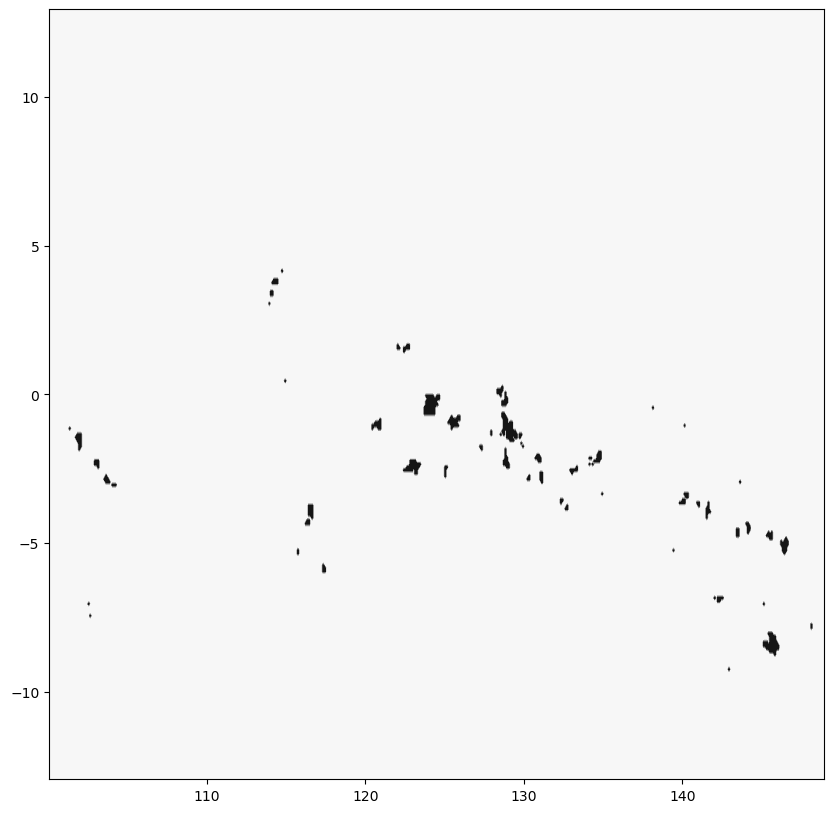

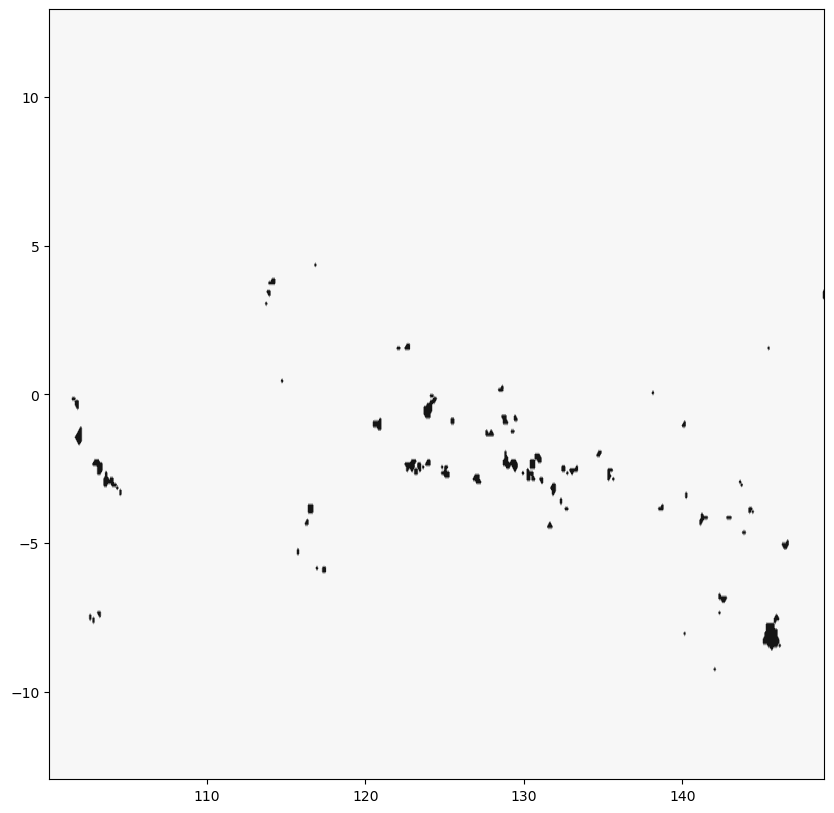

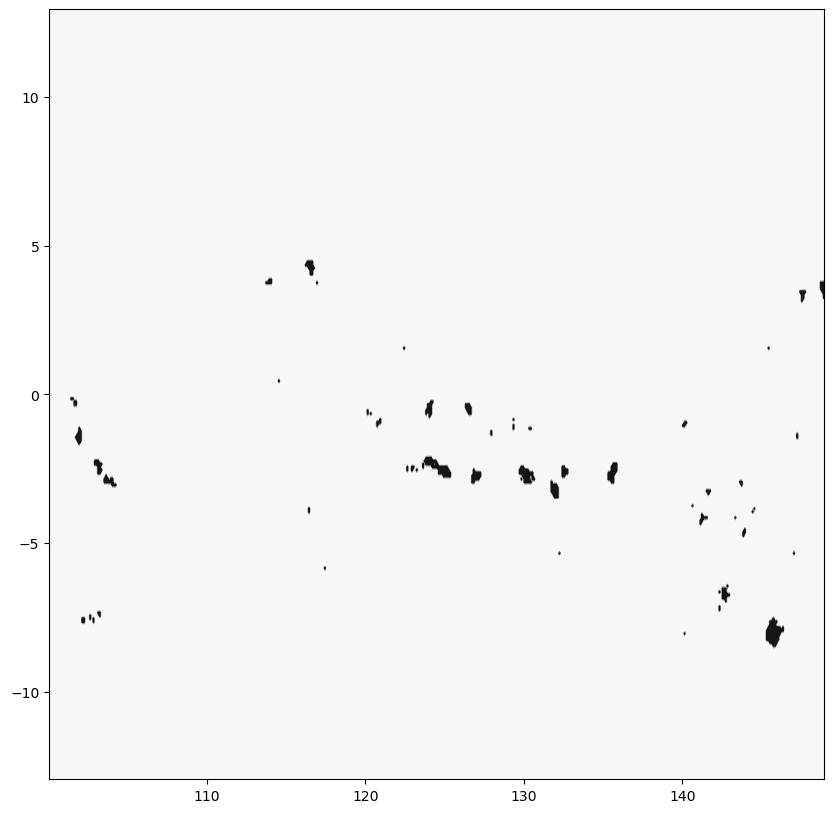

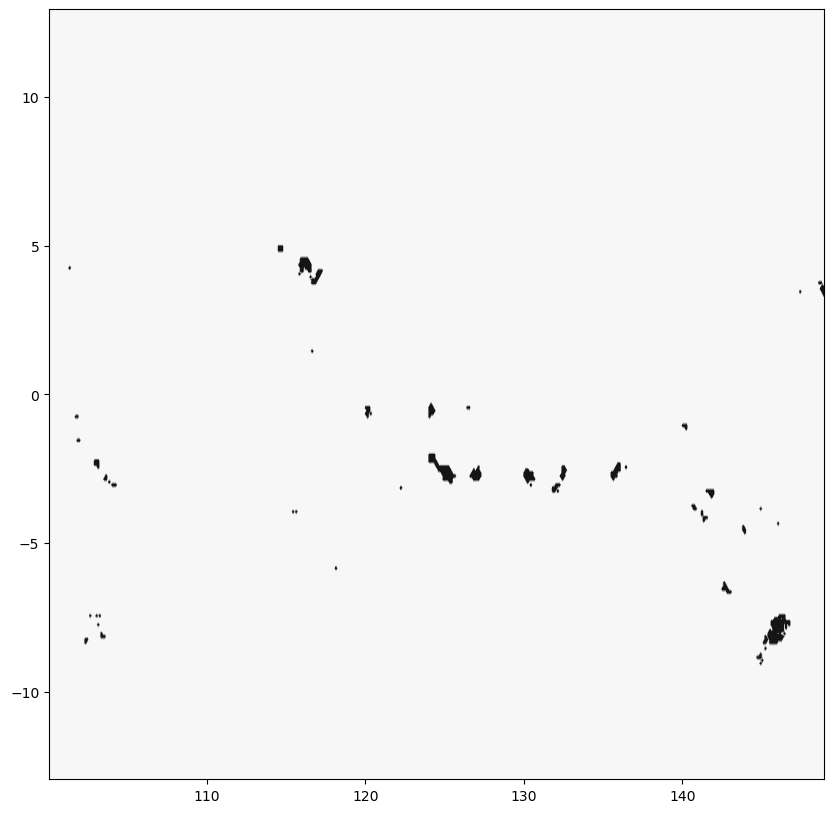

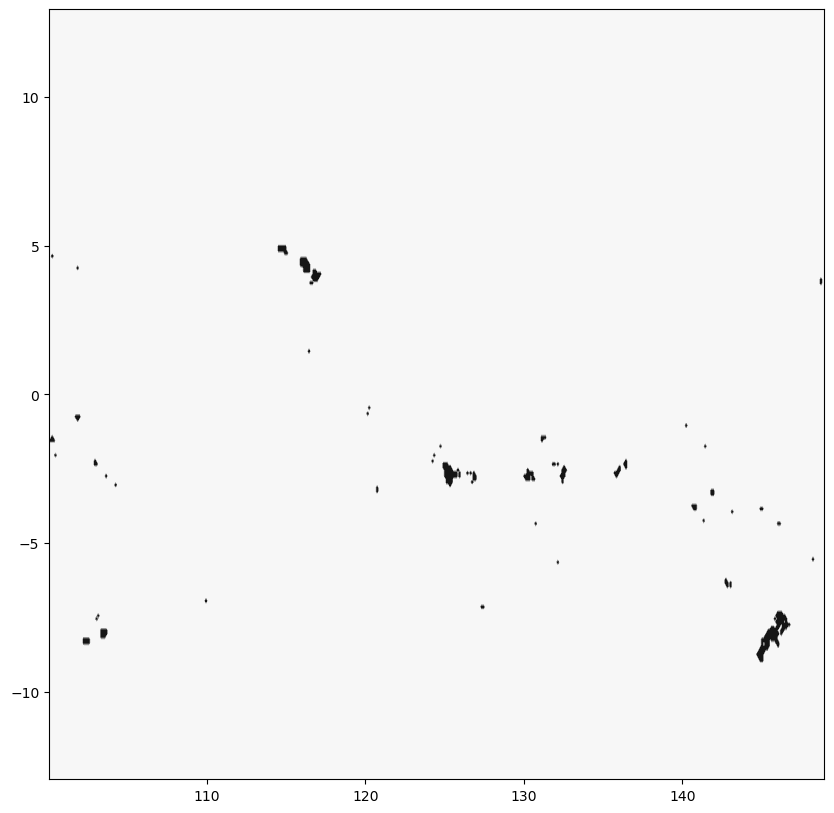

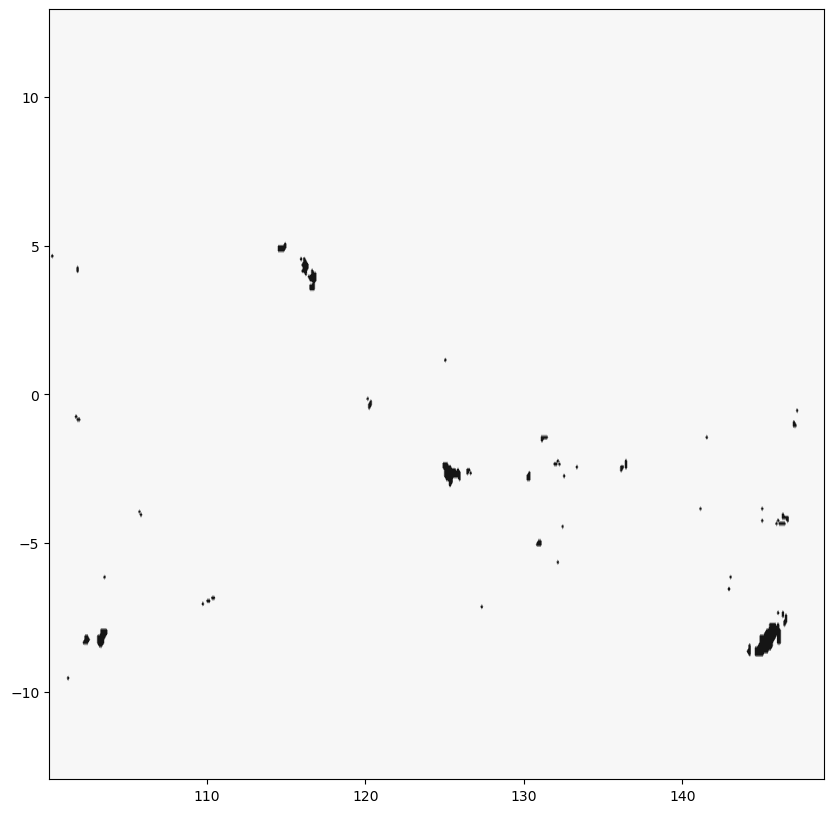

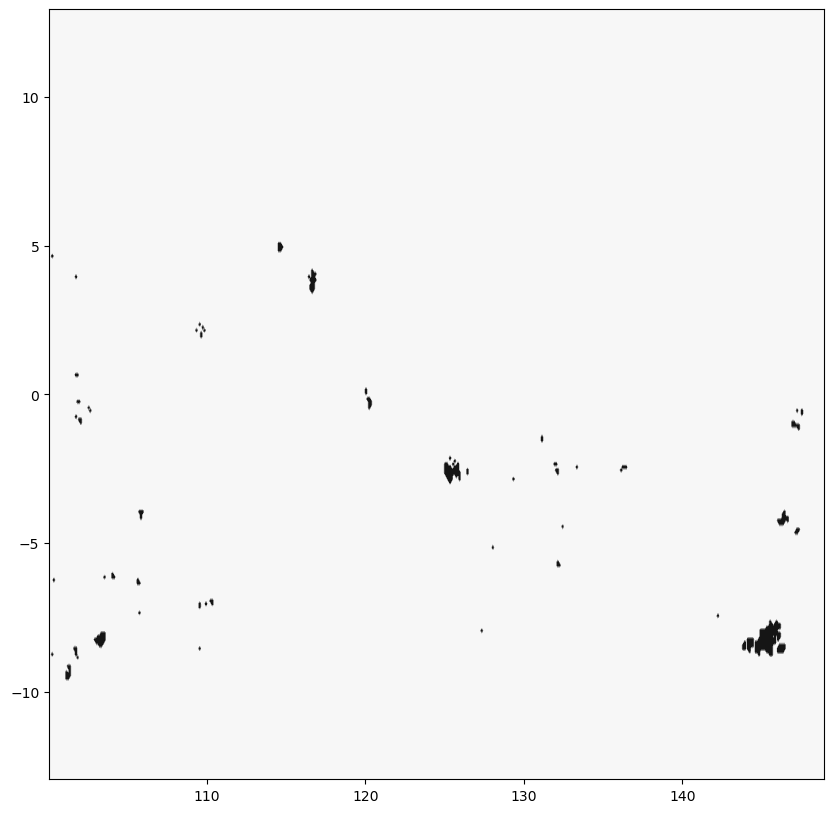

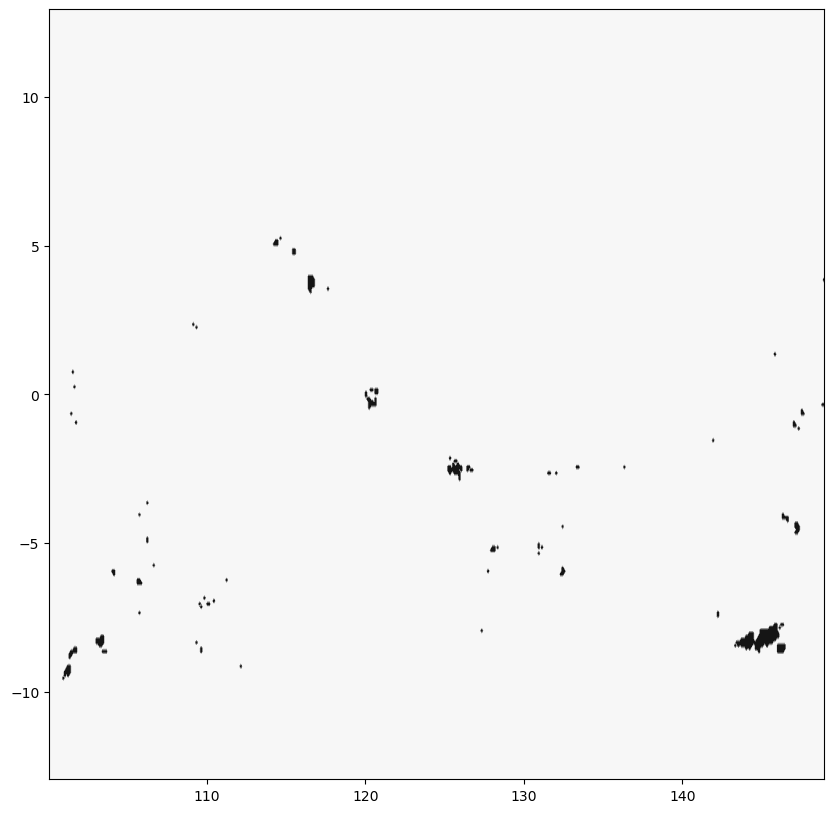

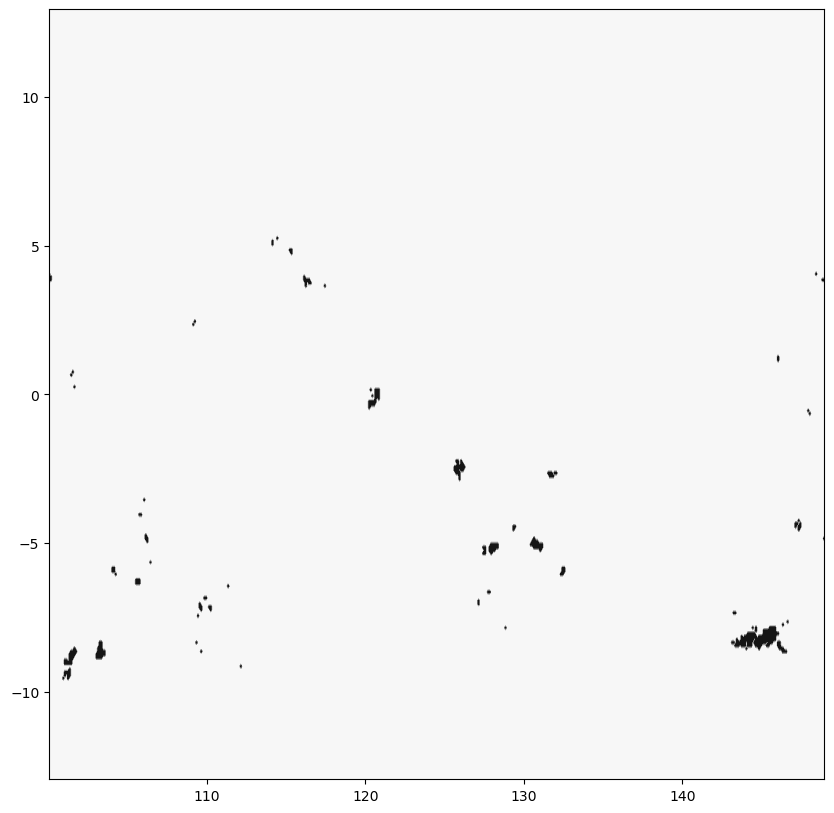

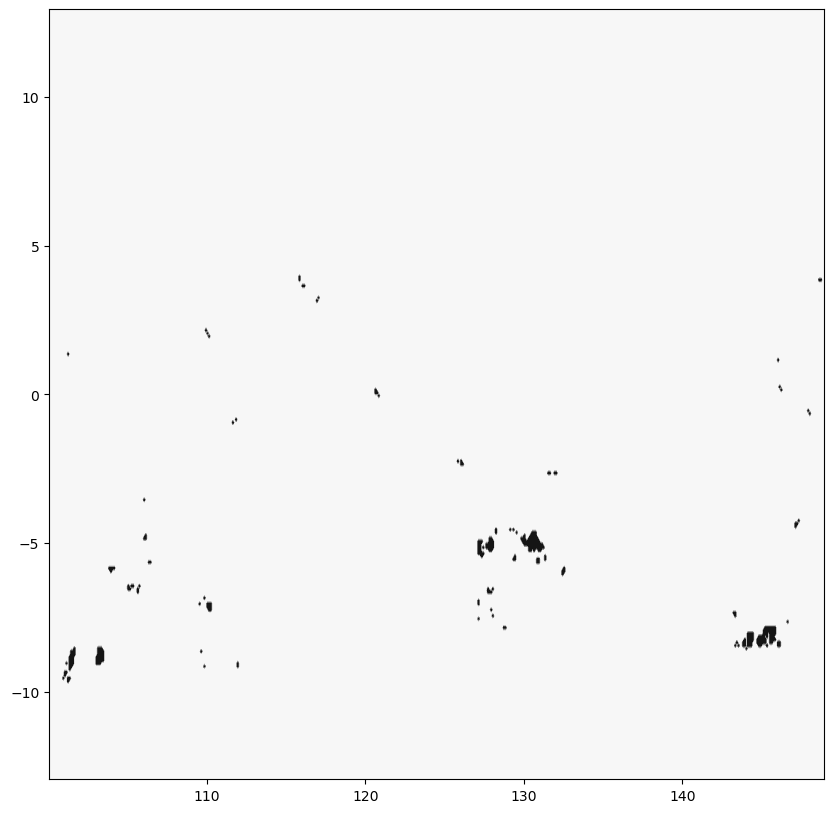

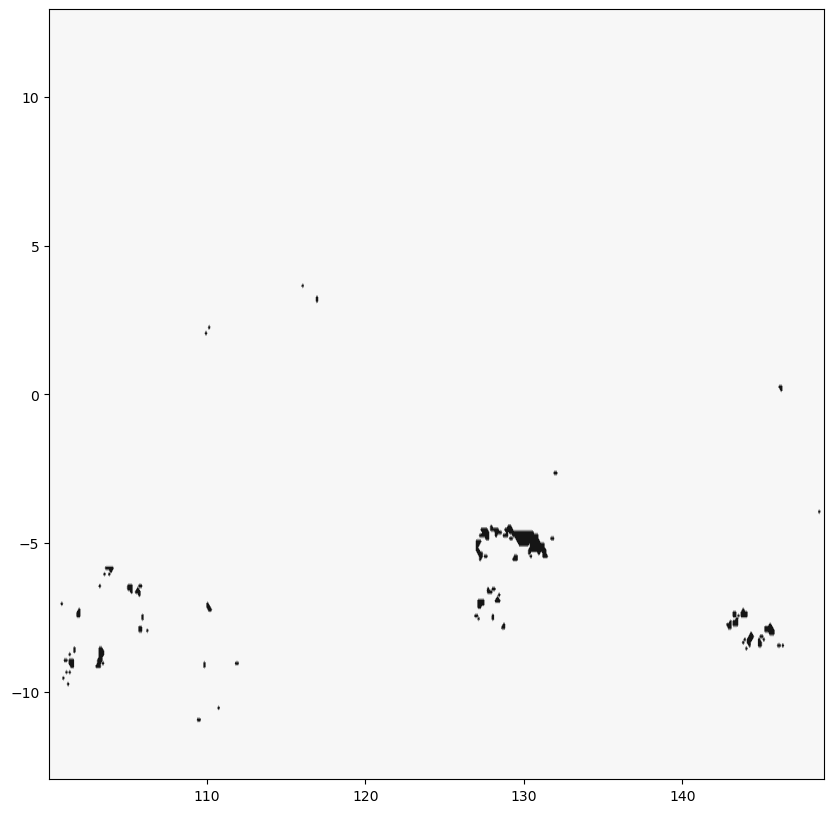

In [12]:
for ii in range(0,24):
# range
    vmn = 0.9
    vmx = 1
    interval = 1
    fig,ax=plt.subplots(1,1,figsize=(10,10))
    colormap = cm.Greys
    #da_fin=ds['var']
    cp = ax.contourf(y,x,var_masked2[ii,:,:],cmap=colormap)
    plt.savefig('/home/563/cc6171/imerge_'+str(ii+1)+'.png',transparent=None,format='png',bbox_inches='tight',pad_inches=0.1)
    plt.show()

In [ ]:
# Example NumPy array of rainfall data

# Define the threshold
threshold = 50

# Set values below the threshold to zero
da_fin[:,:,:][da_fin[:,:,:] < threshold] = 0

print(da_fin)

In [ ]:
#if da_fin(:,:,:) < 50:
#    da_fin(:,:,:) = 0
#return da_fin(:,:,:)

In [ ]:
# Make a new variable that is 0 where the rain is below 50 mm and 1 when above 50 mm
#if da_fin > 50 rain =1
#if da_fin < 50 rain =0

#def set_to_zero_if_below(variable, threshold):
#    if variable < threshold:
#        variable = 0
#    return variable

# Example usage
#out = set_to_zero_if_below(da_fin, 50)

threshold = 100 

# np.where(condition, value if true, value if false)
new_data = np.where(da_fin < threshold, 0, da_fin)

# Write your new data back to the NetCDF file
ds.da_fin['var'] = new_data
#ds.close()




In [ ]:
new_data

In [ ]:
import skimage.measure as skm
# -- convective objects --
conv_regions = (da_timestep > threshold) * 1
labels_np = skm.label(conv_regions, background = 0, connectivity =2)
# labels_np = cB.connect_boundary(labels_np)
labels = np.unique(labels_np)[1:]
labels_xr = xr.DataArray(
    data = labels_np,
    dims=["lat", "lon"],
    coords={"lat": da.lat, "lon": da.lon},
    )

Get area of region (con

Looping through objects

/scratch/nf33/Healpix_data    is location of data